# Importing neceessary modules 
We will import all the neccessary Python Libraries for data analysis, Visualization , and  Machine Learning.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score, f1_score,precision_score,mean_absolute_error,mean_squared_error,r2_score,recall_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb
import missingno as ms
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn .feature_selection import  VarianceThreshold


# Loading Data
Loads the house rental dataset from a .CSV File into a pandas DataFrame
and prints its shape 

In [2]:

df=pd.read_csv(r'C:\Users\amare\Downloads\House Rental.csv')



C:\Users\amare\AppData\Local\Temp\ipykernel_7536\3363190776.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'C:\Users\amare\Downloads\House Rental.csv')


In [3]:
df.drop('description',axis=1,inplace=True)

# Exploratory Data Analysis
`1.Getting in Through the Data`

In [4]:
print("Shape of the dataset : ",df.shape)
print("\nColumns present in the dataset : ",df.columns.tolist())
print("\nThe Data Types Present in the Dataset : \n",df.dtypes)
print("\nThe First 5 Rows of the Dataset : \n",df.head(5))
print("\nThe Last 5 Rows of the Dataset : \n",df.tail(5))

print("\nThe Summary Of the Dataset is : \n",df.describe())


Shape of the dataset :  (99492, 21)

Columns present in the dataset :  ['listing_id', 'listing_category', 'headline', 'included_features', 'bath_count', 'bed_count', 'payment_currency', 'service_fee_applicable', 'image_available', 'pet_policy', 'monthly_rent', 'formatted_rent_text', 'payment_schedule', 'area_in_sqft', 'street_address', 'city', 'region_code', 'geo_lat', 'geo_lon', 'data_provider', 'listing_timestamp']

The Data Types Present in the Dataset : 
 listing_id                  int64
listing_category           object
headline                   object
included_features          object
bath_count                float64
bed_count                 float64
payment_currency           object
service_fee_applicable     object
image_available            object
pet_policy                 object
monthly_rent              float64
formatted_rent_text        object
payment_schedule           object
area_in_sqft                int64
street_address             object
city                      

`2. Missing Values`

In [5]:

print("\nThe Number of Missing Values in Each Column : \n",df.isnull().sum())



The Number of Missing Values in Each Column : 
 listing_id                    0
listing_category              0
headline                      0
included_features         16044
bath_count                   63
bed_count                   124
payment_currency              0
service_fee_applicable        0
image_available               0
pet_policy                60424
monthly_rent                  1
formatted_rent_text           1
payment_schedule              0
area_in_sqft                  0
street_address            91549
city                        302
region_code                 302
geo_lat                      25
geo_lon                      25
data_provider                 0
listing_timestamp             0
dtype: int64


` 3.Univariate Analysis`

` 3.1 Numerical Columns`

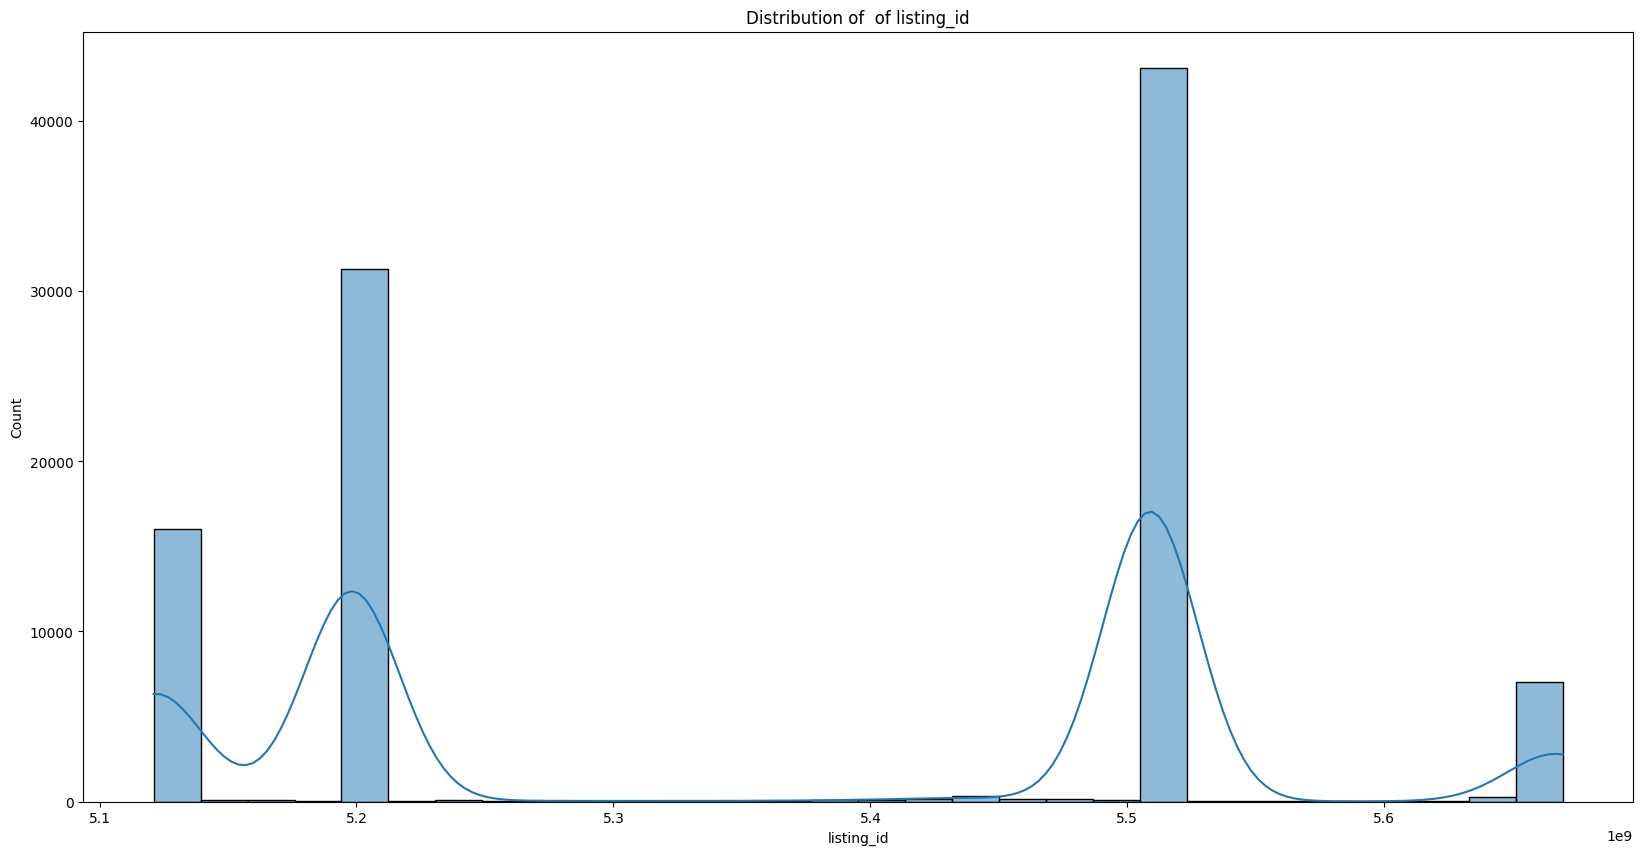

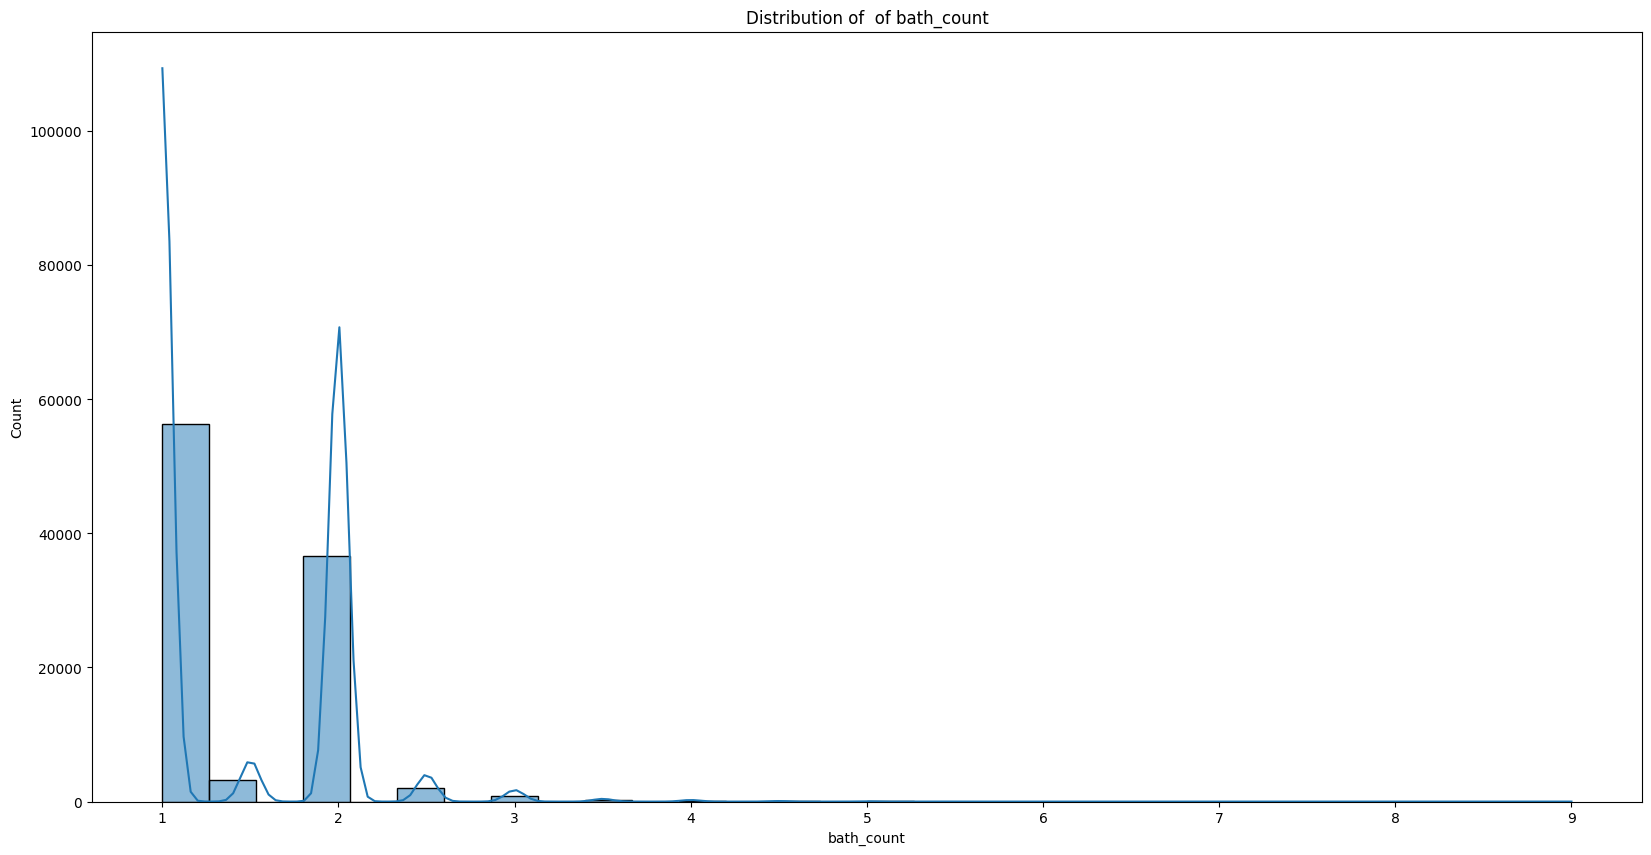

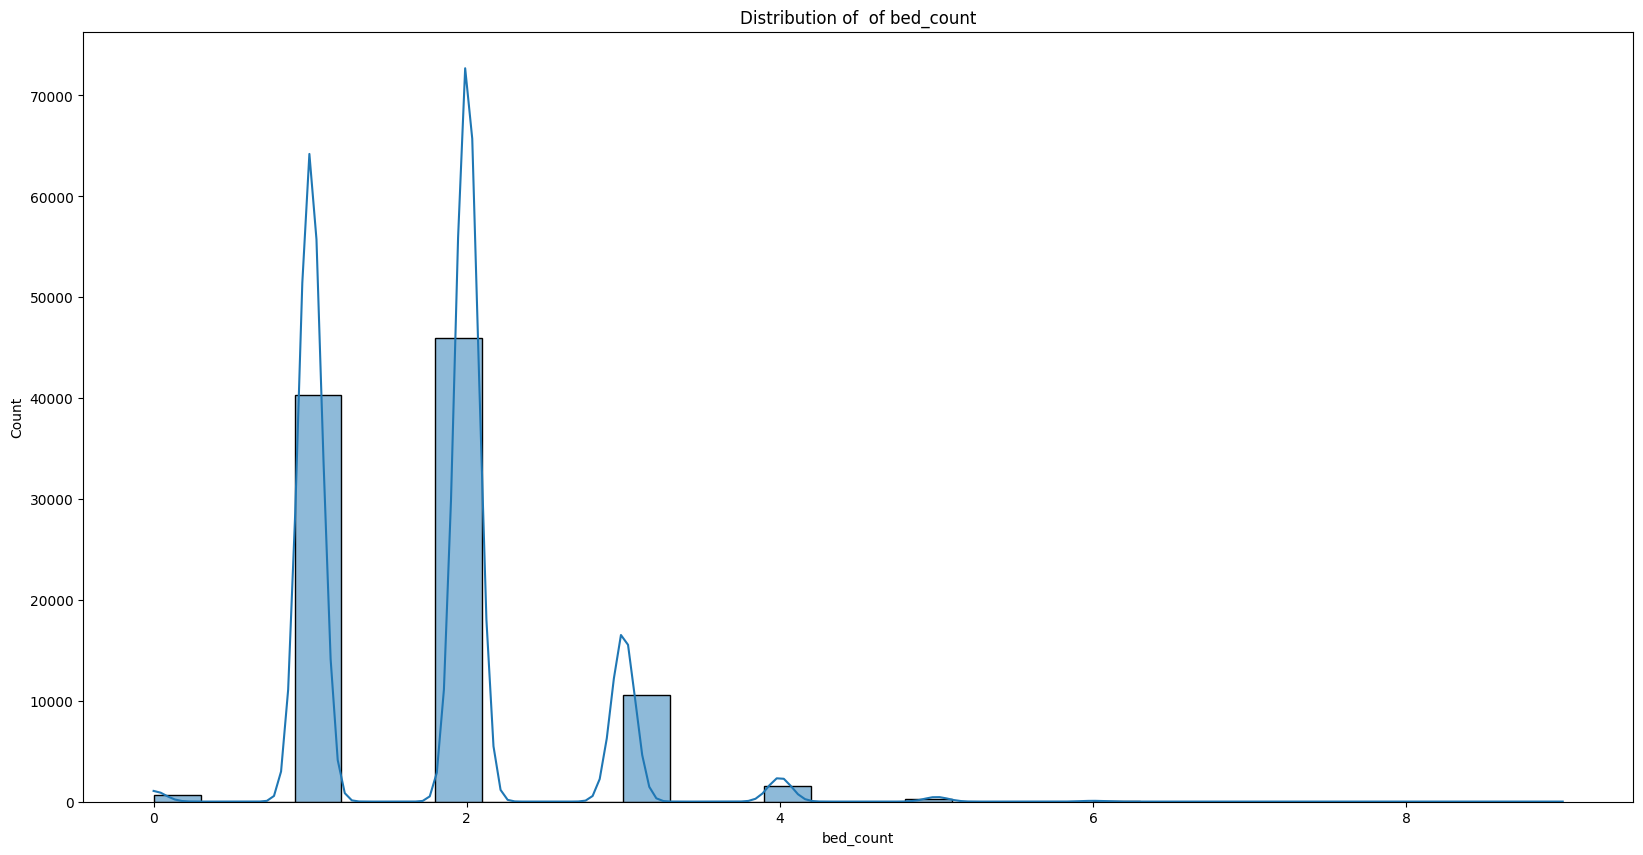

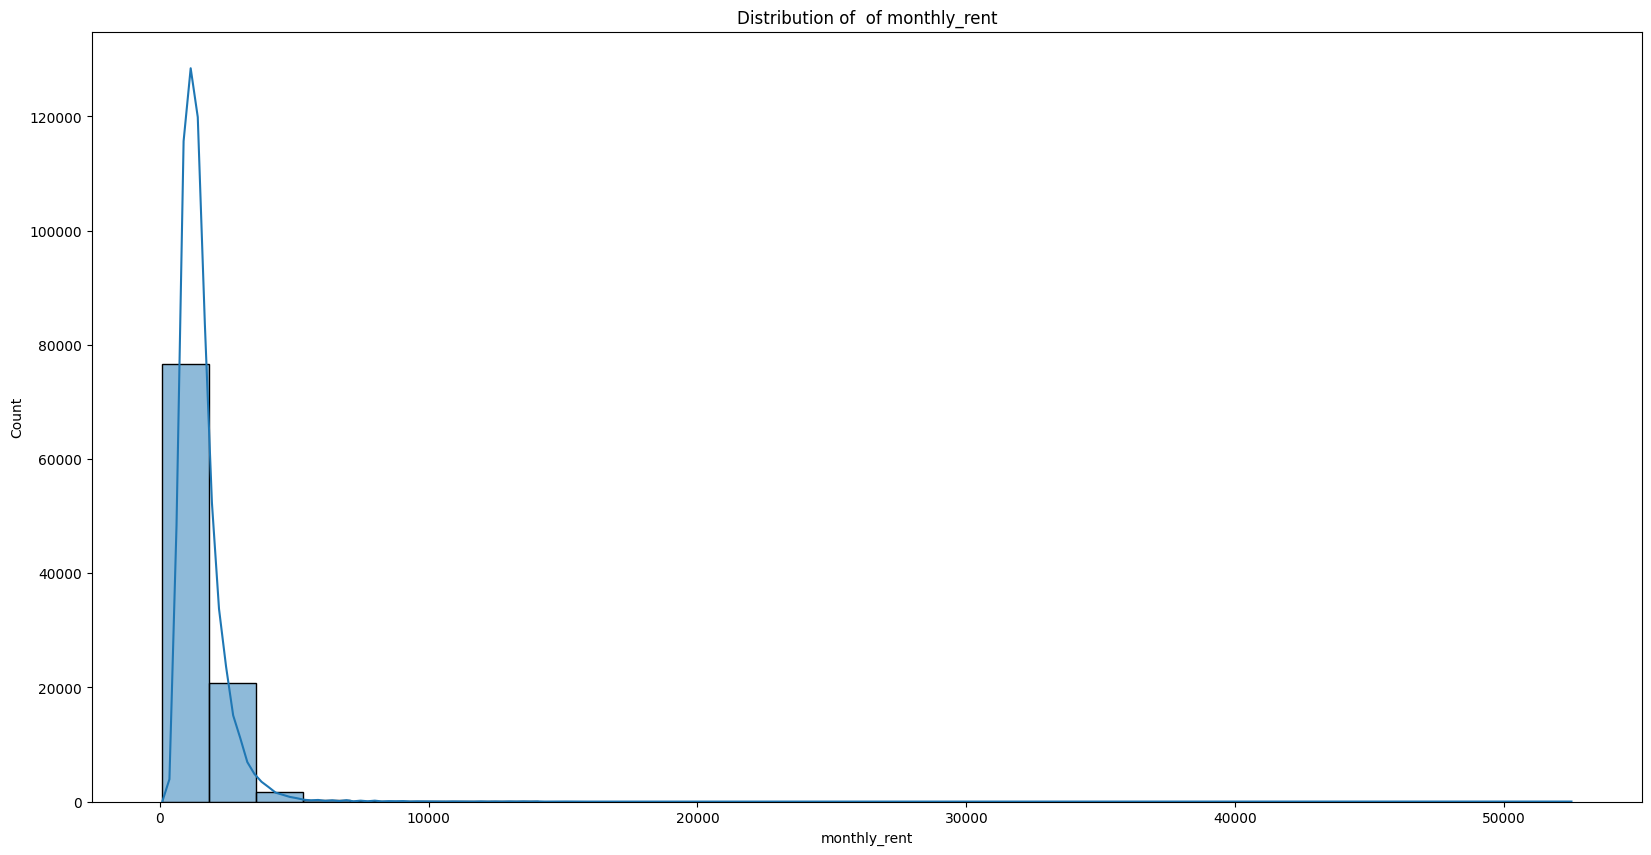

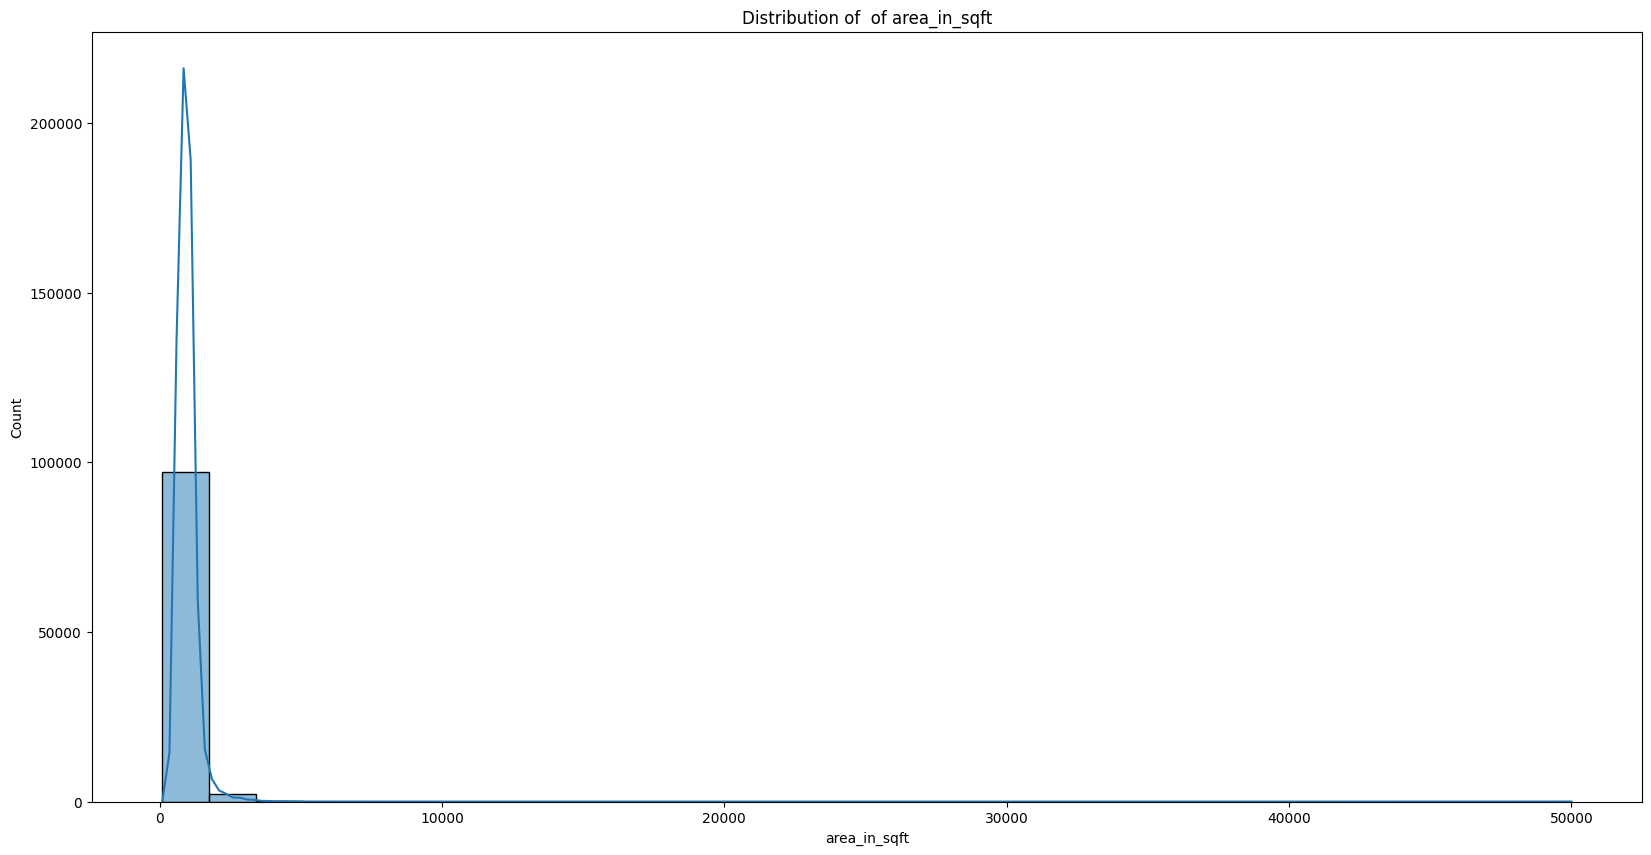

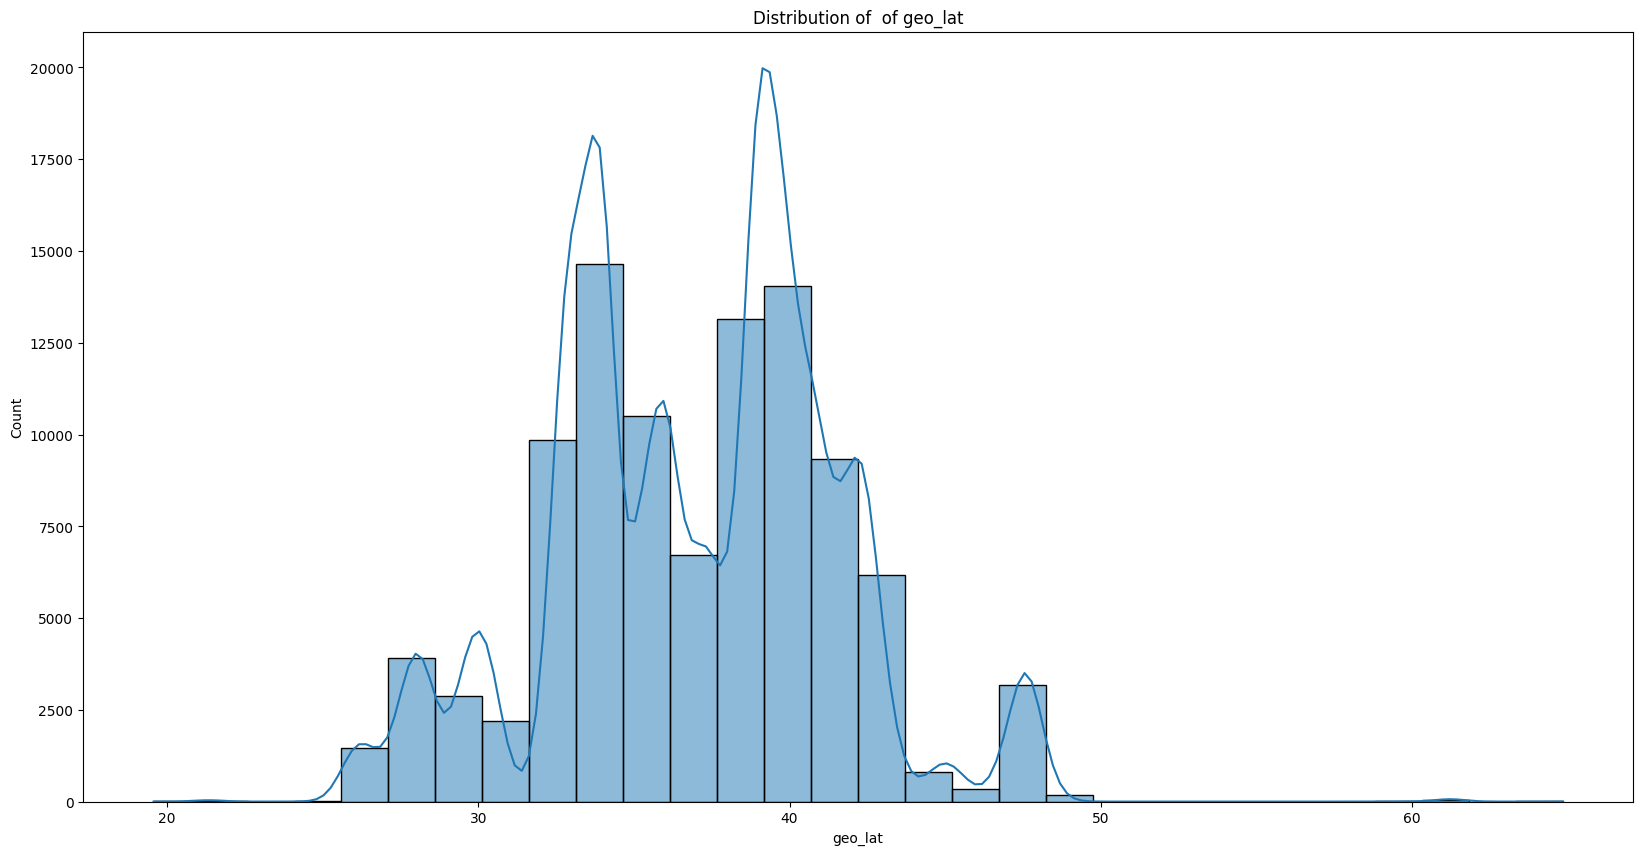

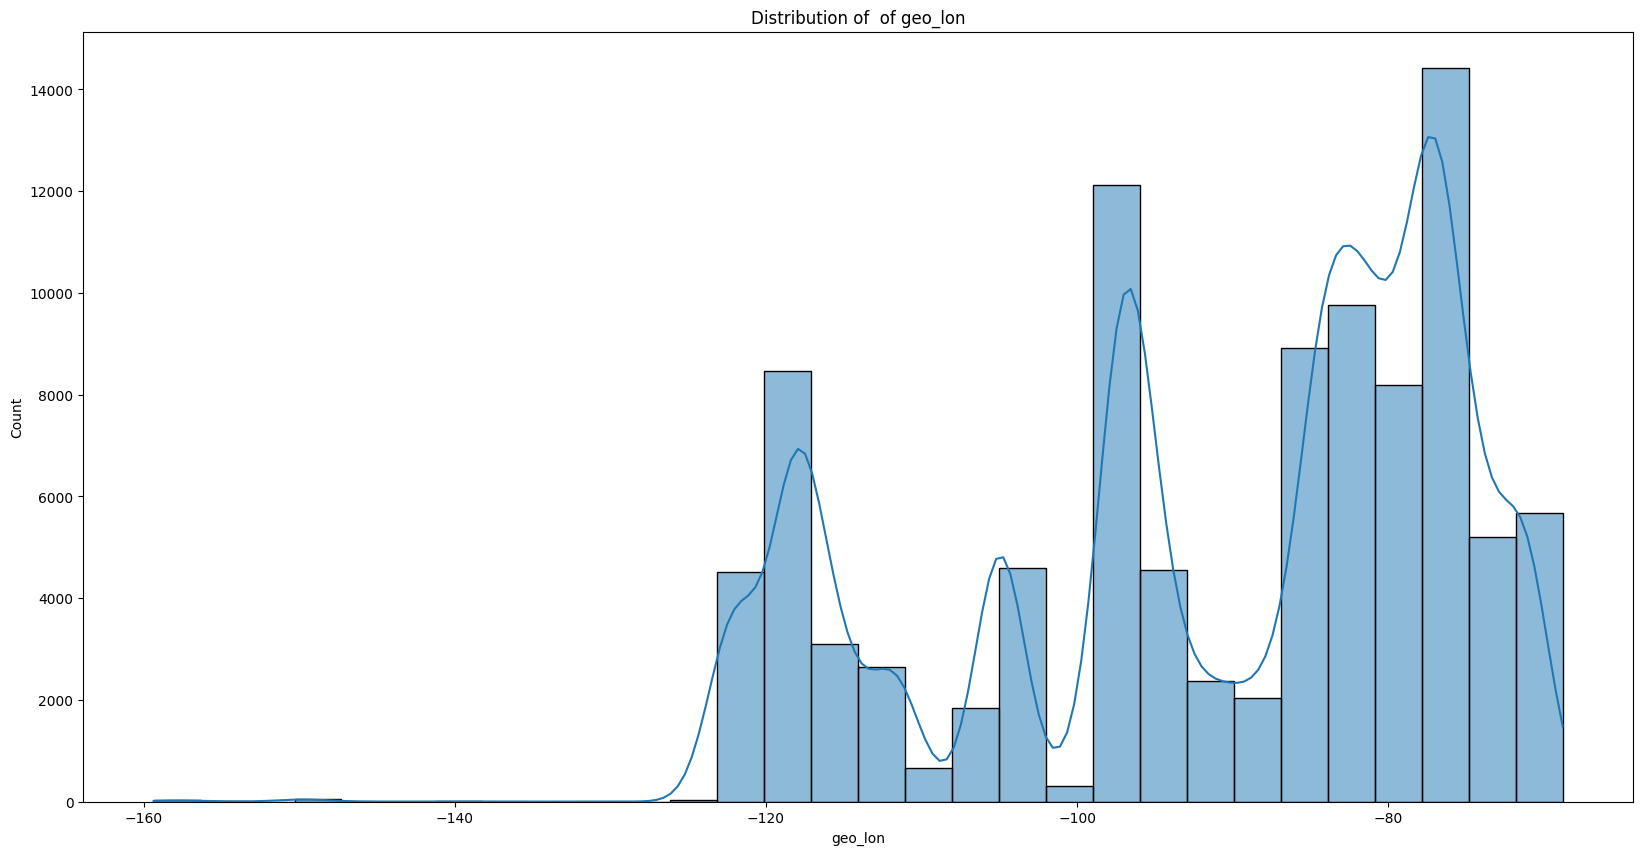

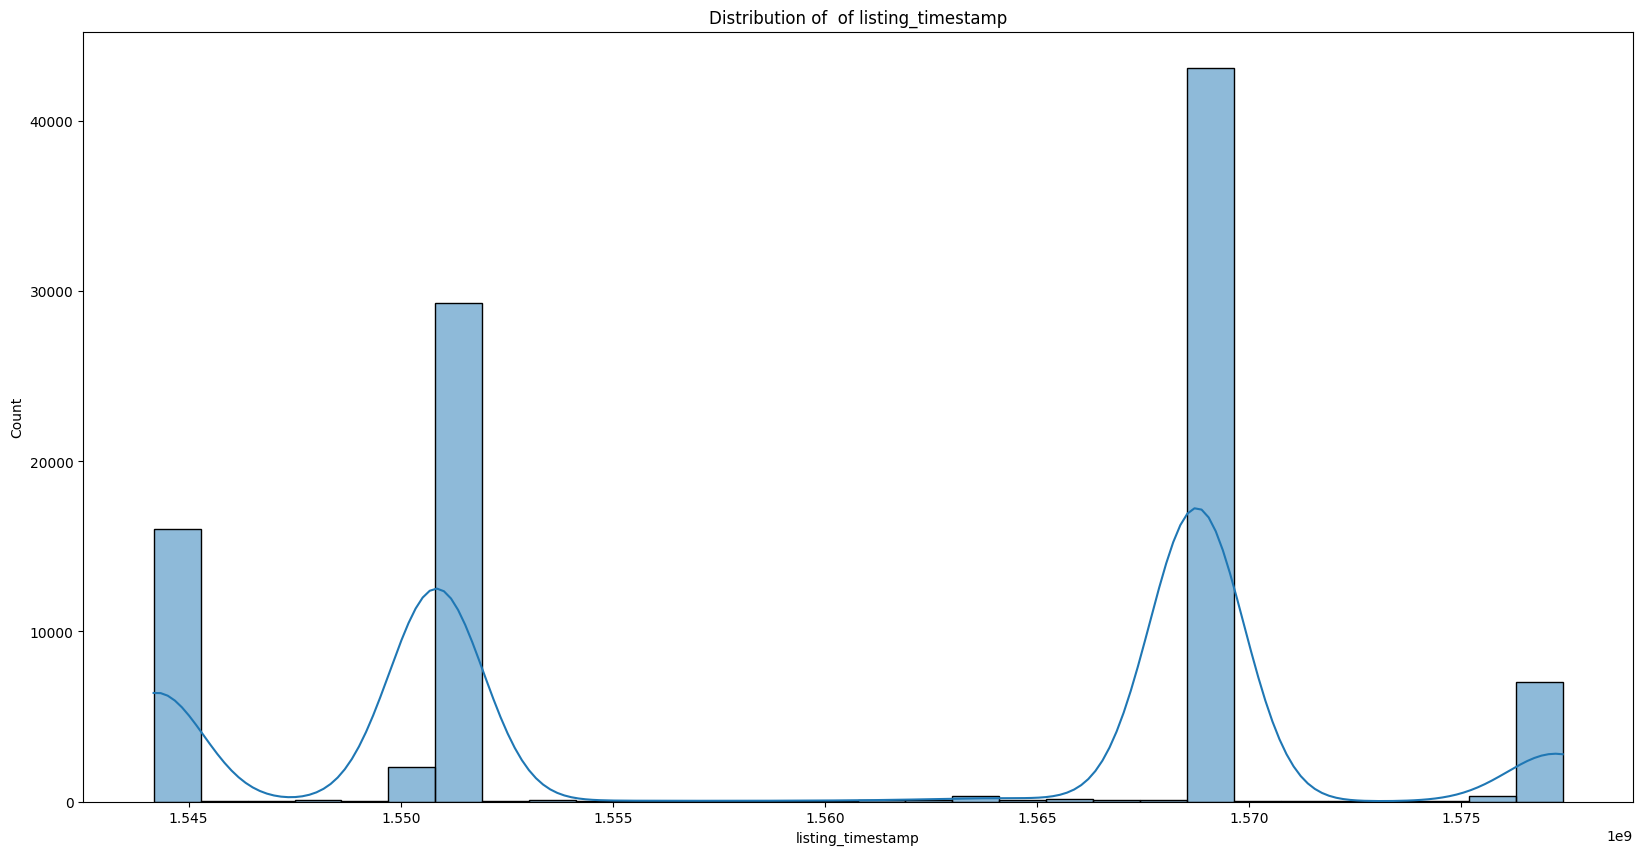

In [6]:
#Numerical Columns or Features
num_col= df.select_dtypes(include=['number']).columns
for c in num_col:
    plt.figure(figsize=(20,10))
    sns.histplot(df[c],kde=True,bins=30)
    plt.title(f'Distribution of  of {c}')
    plt.show()


`3.2 Categorical Columns`

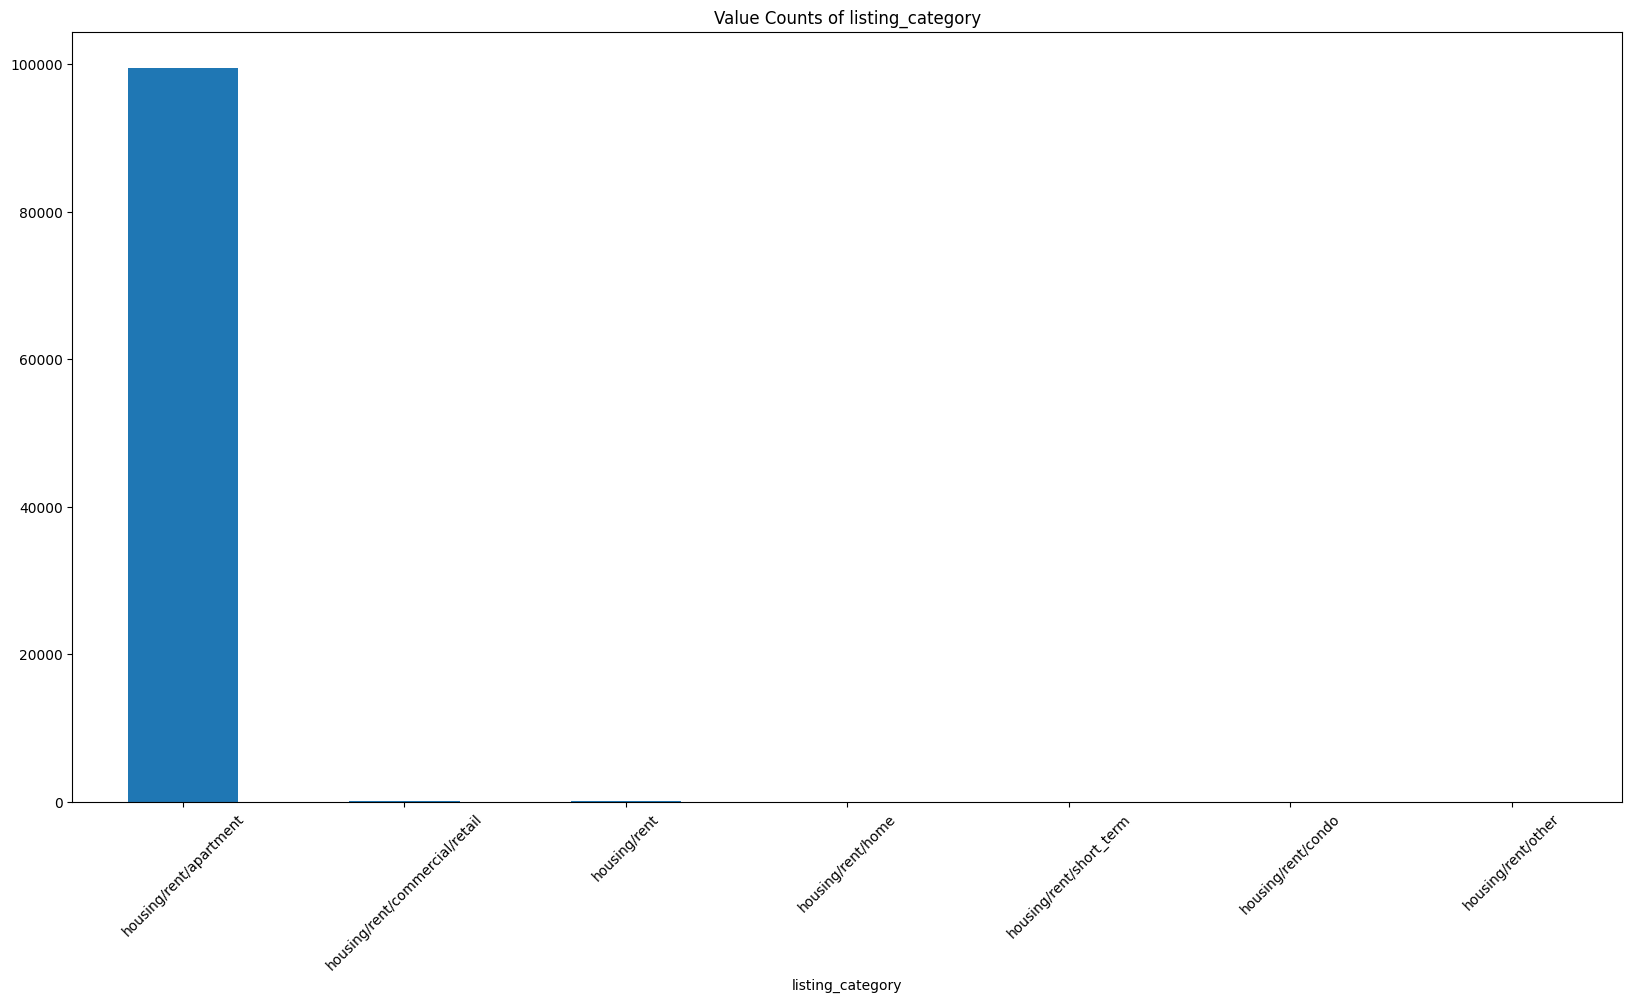

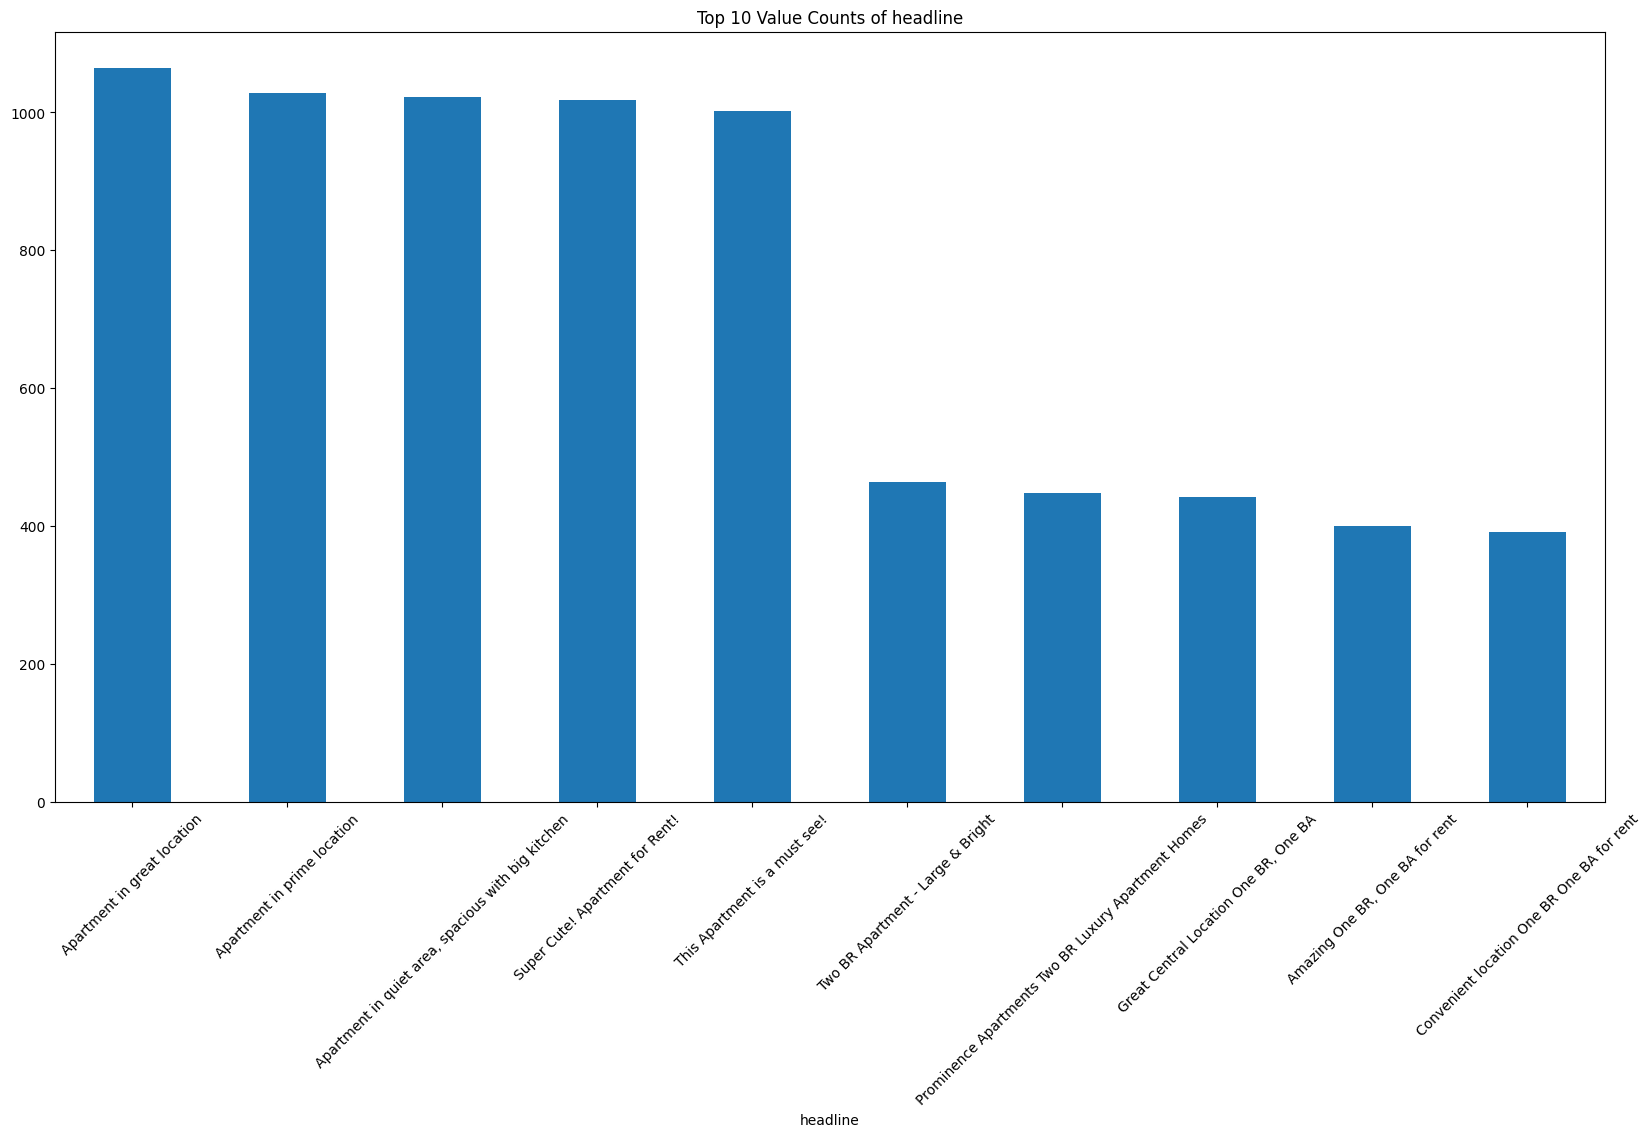

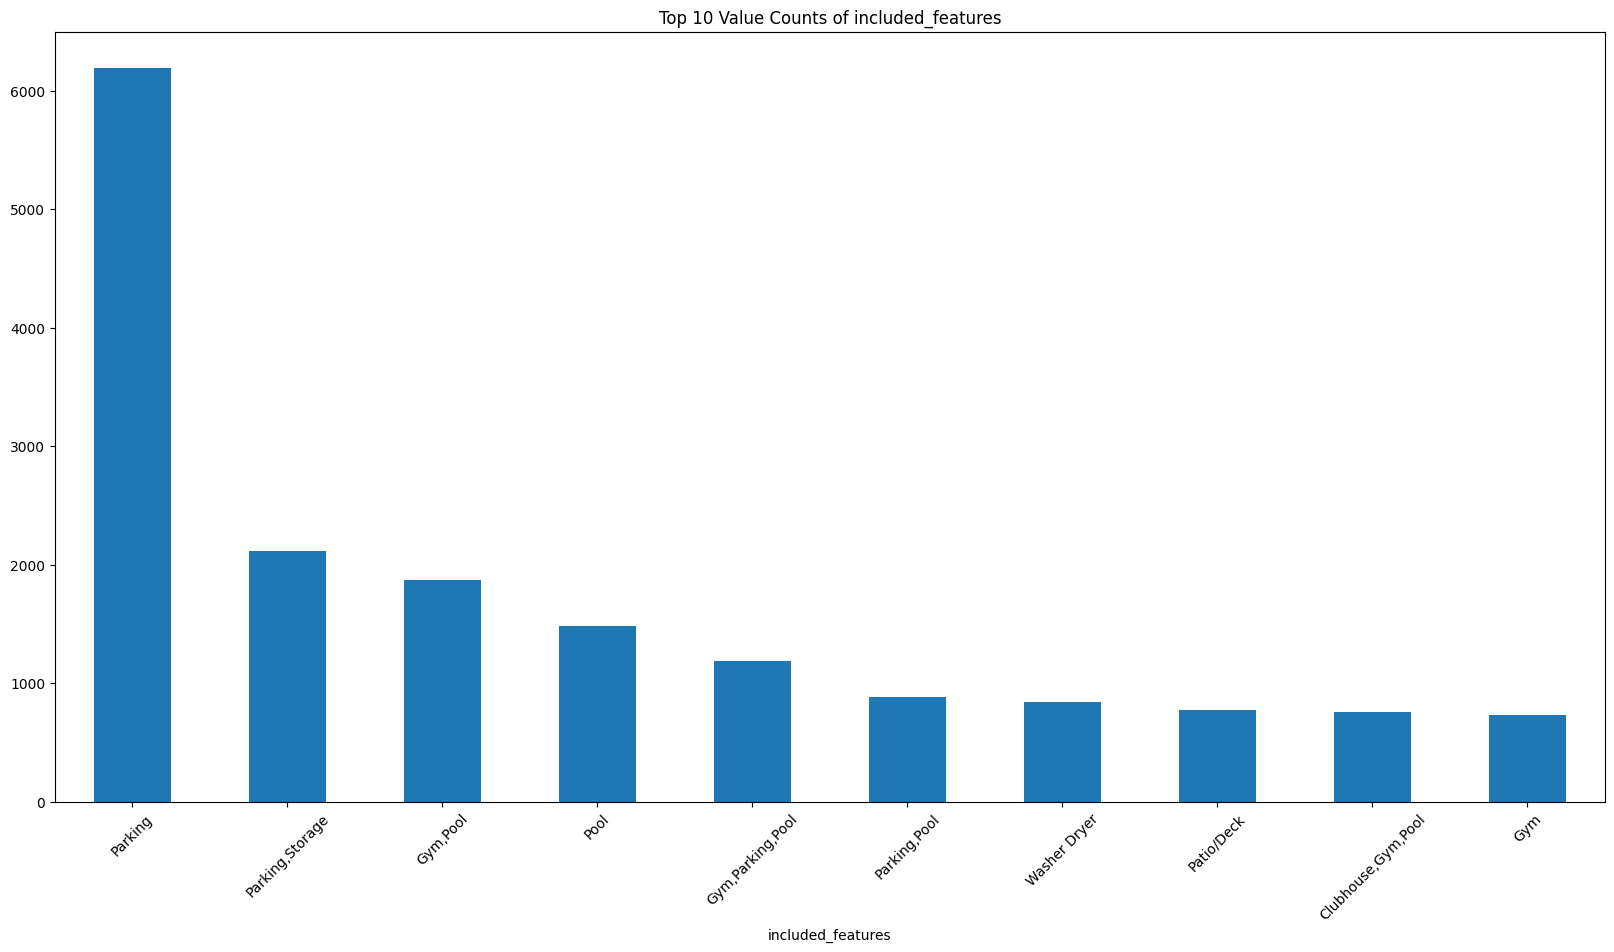

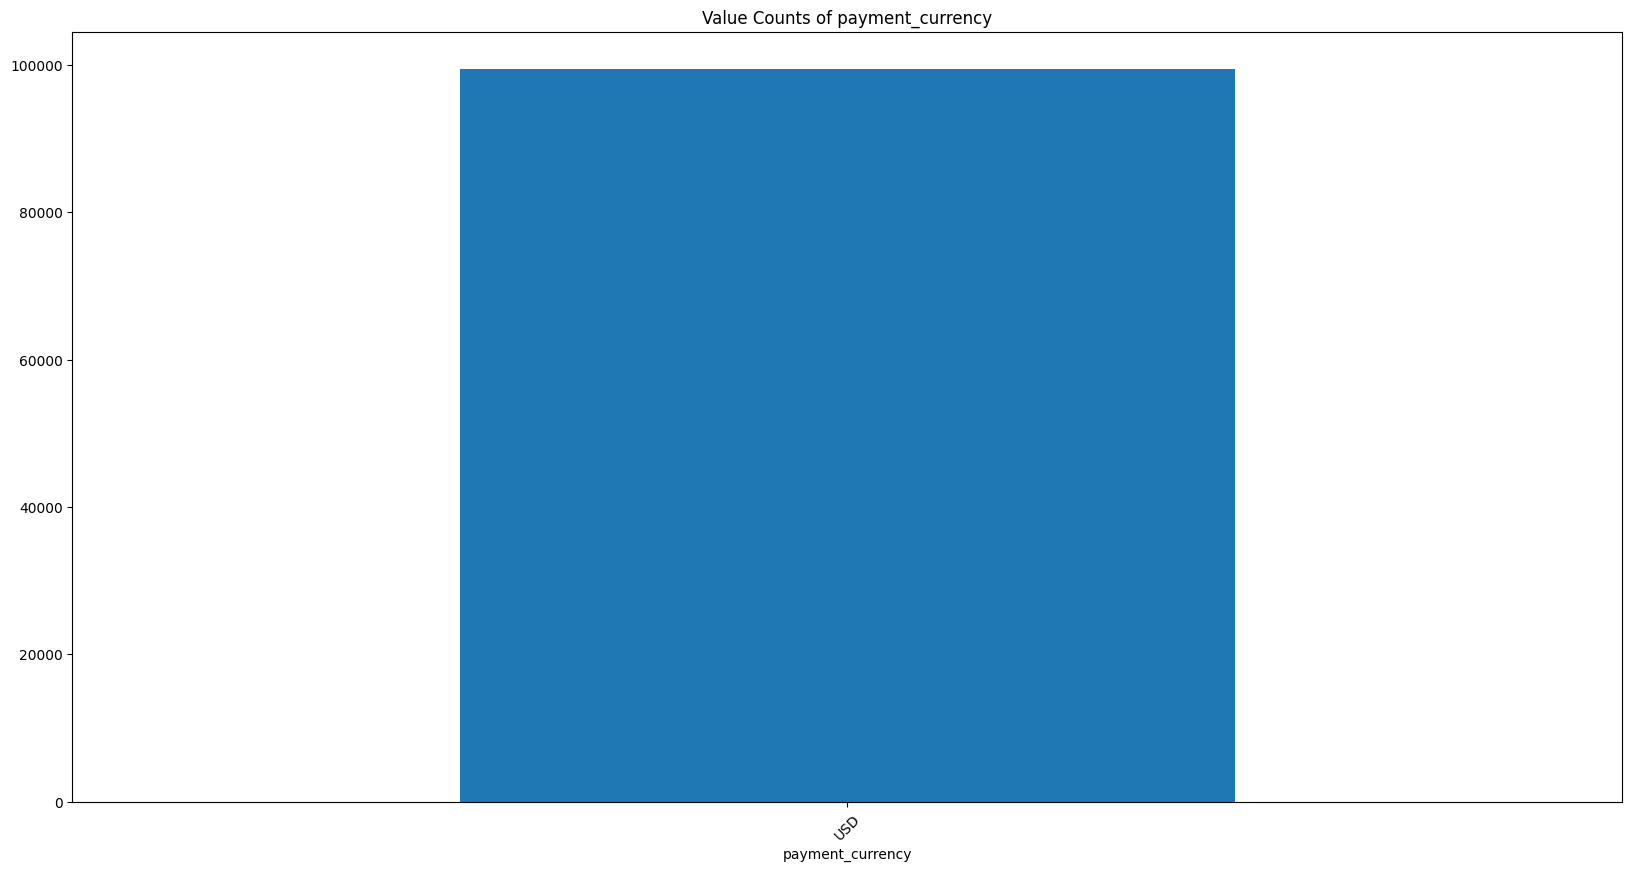

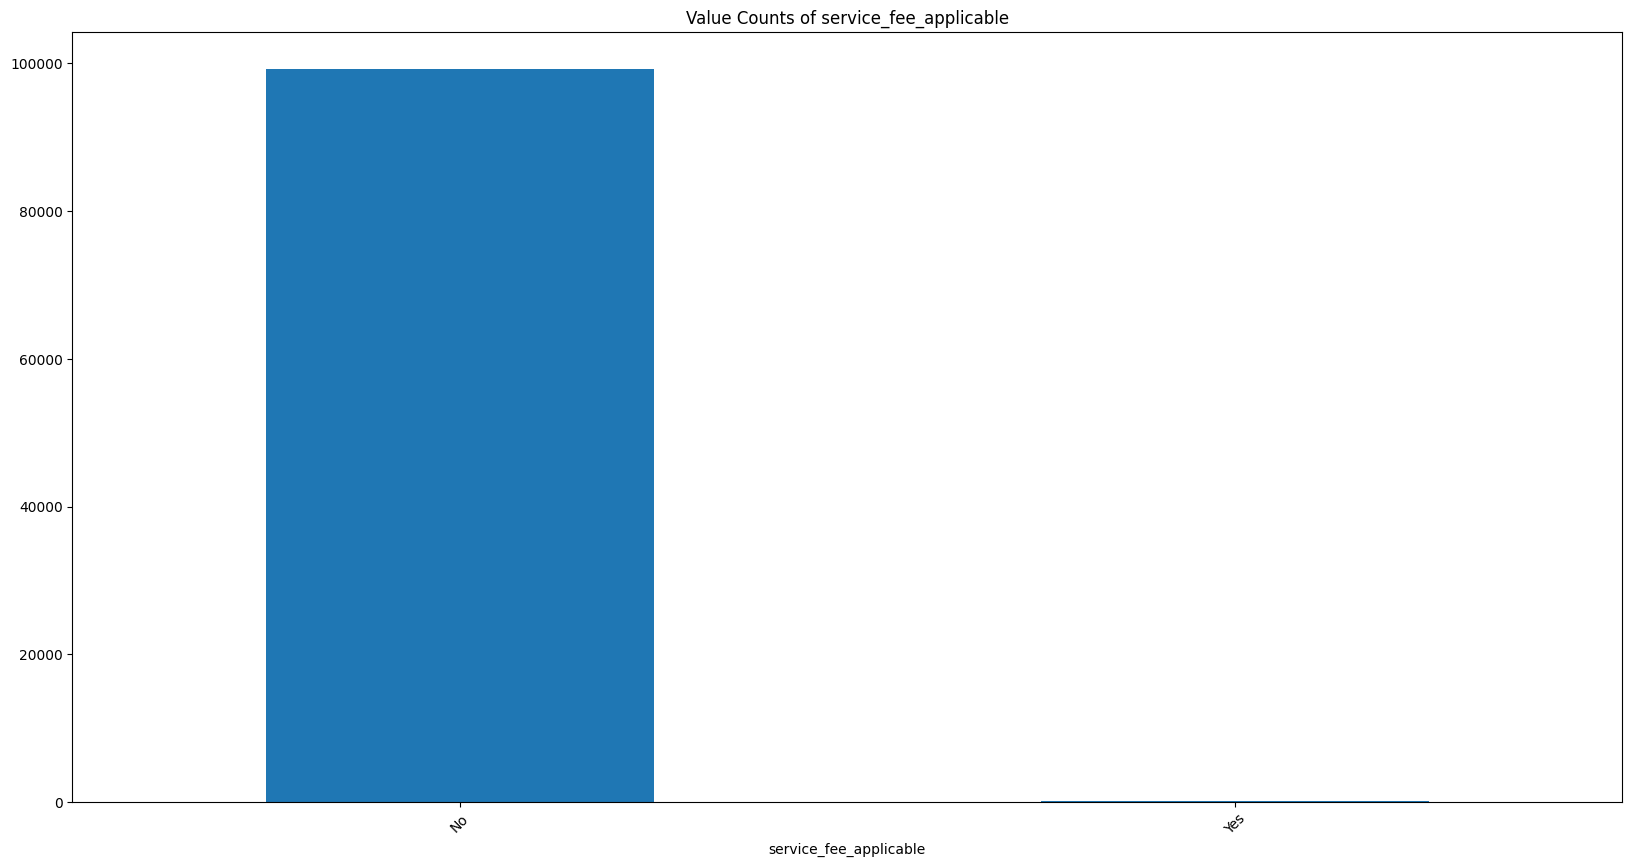

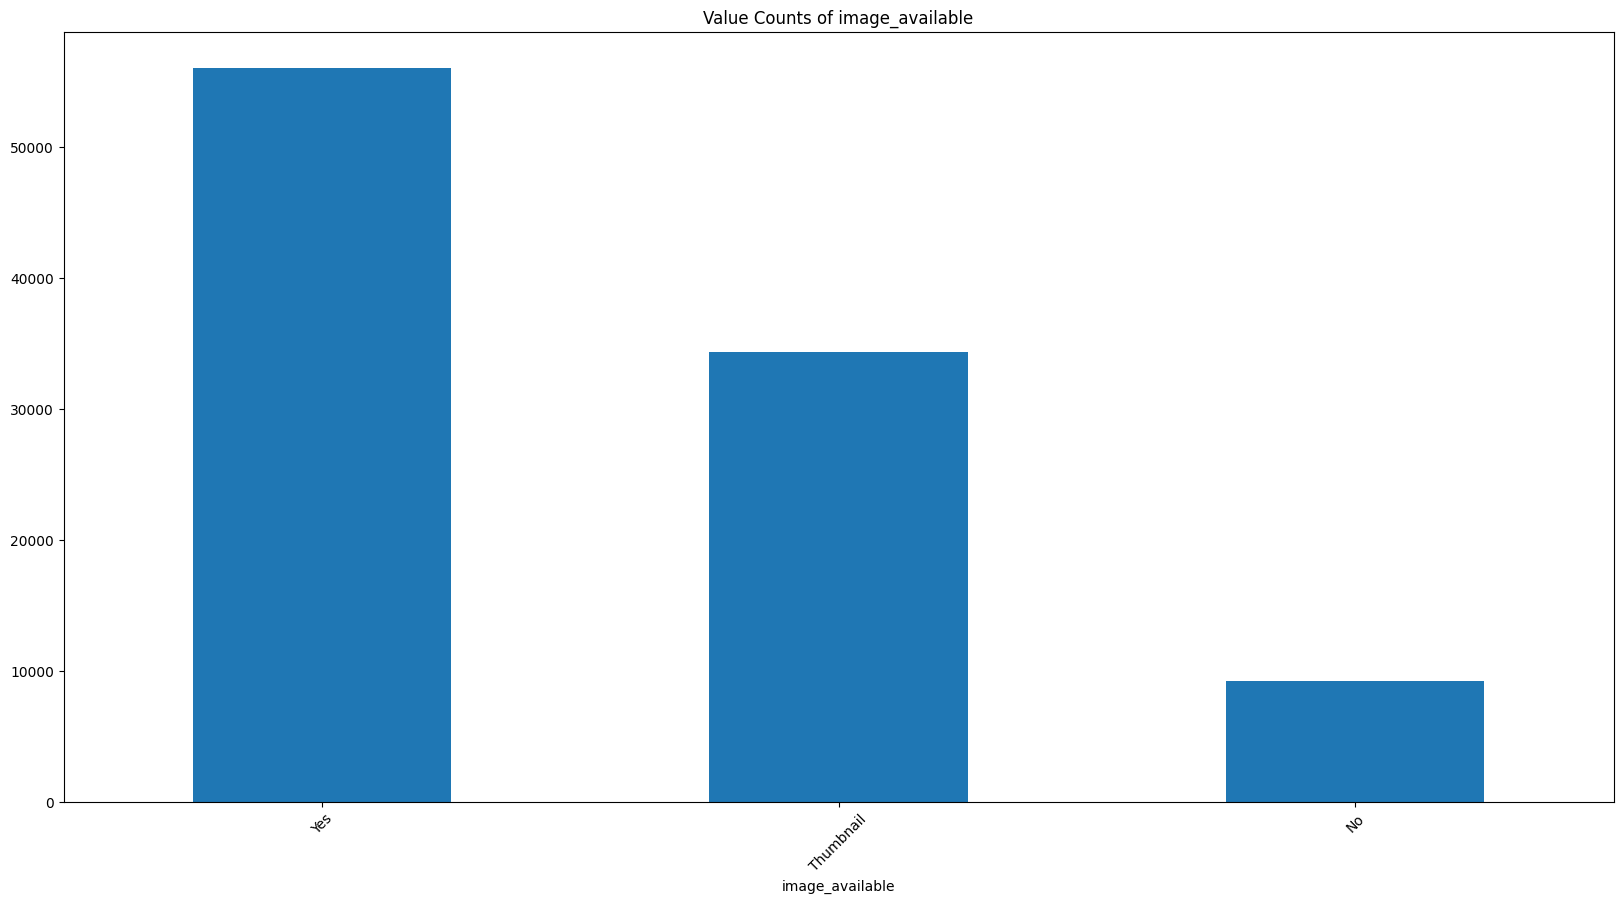

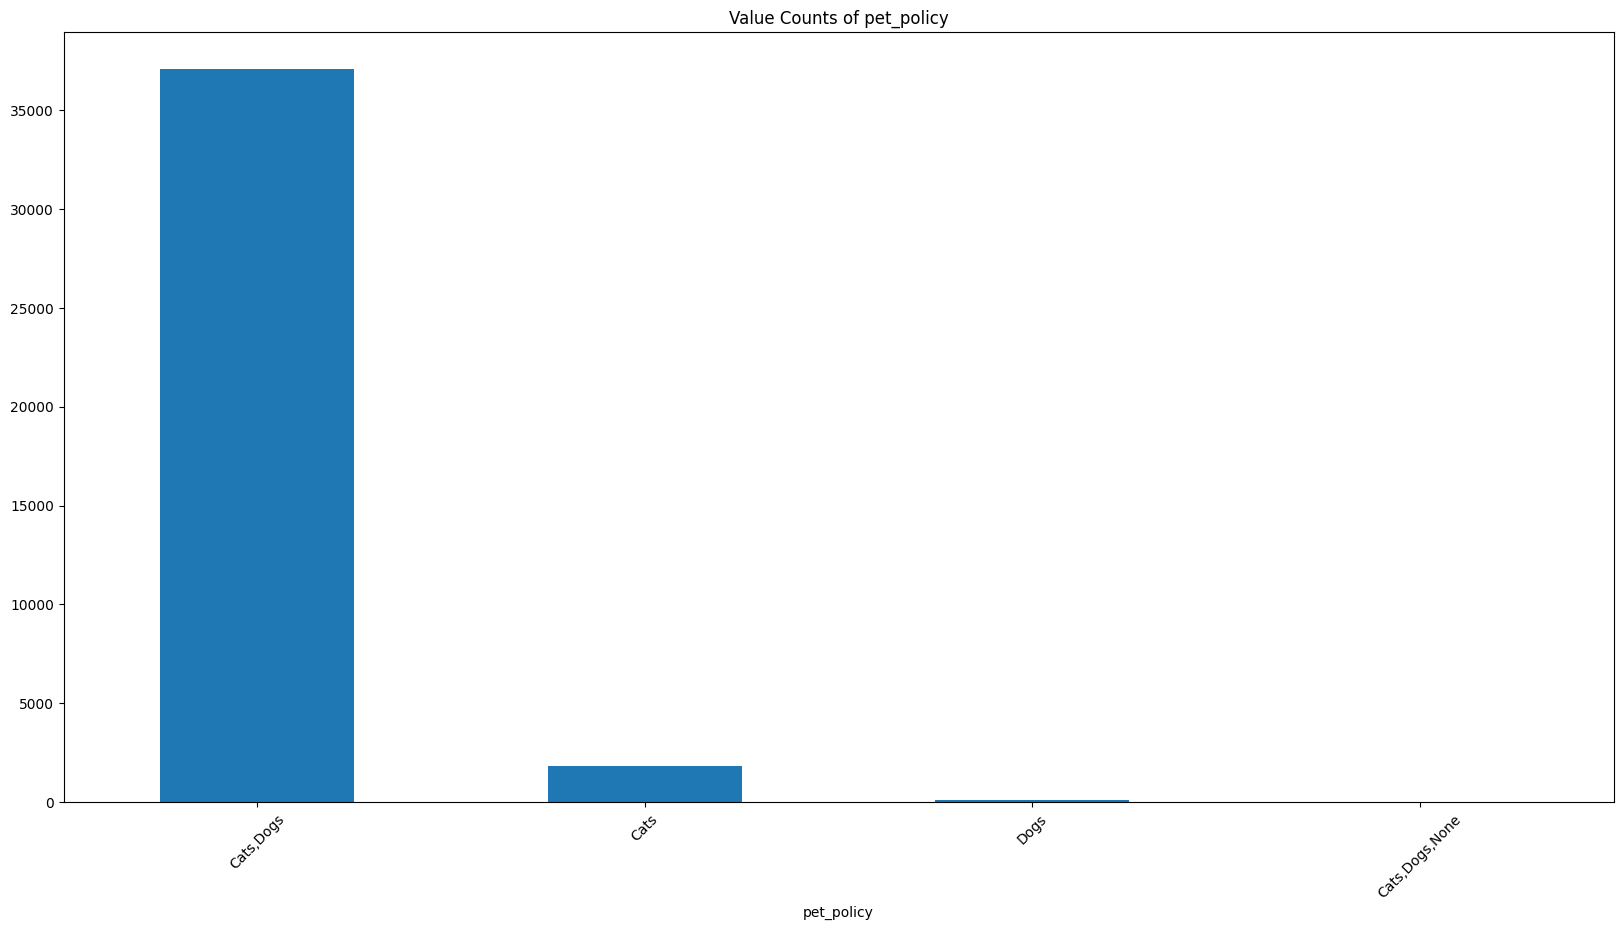

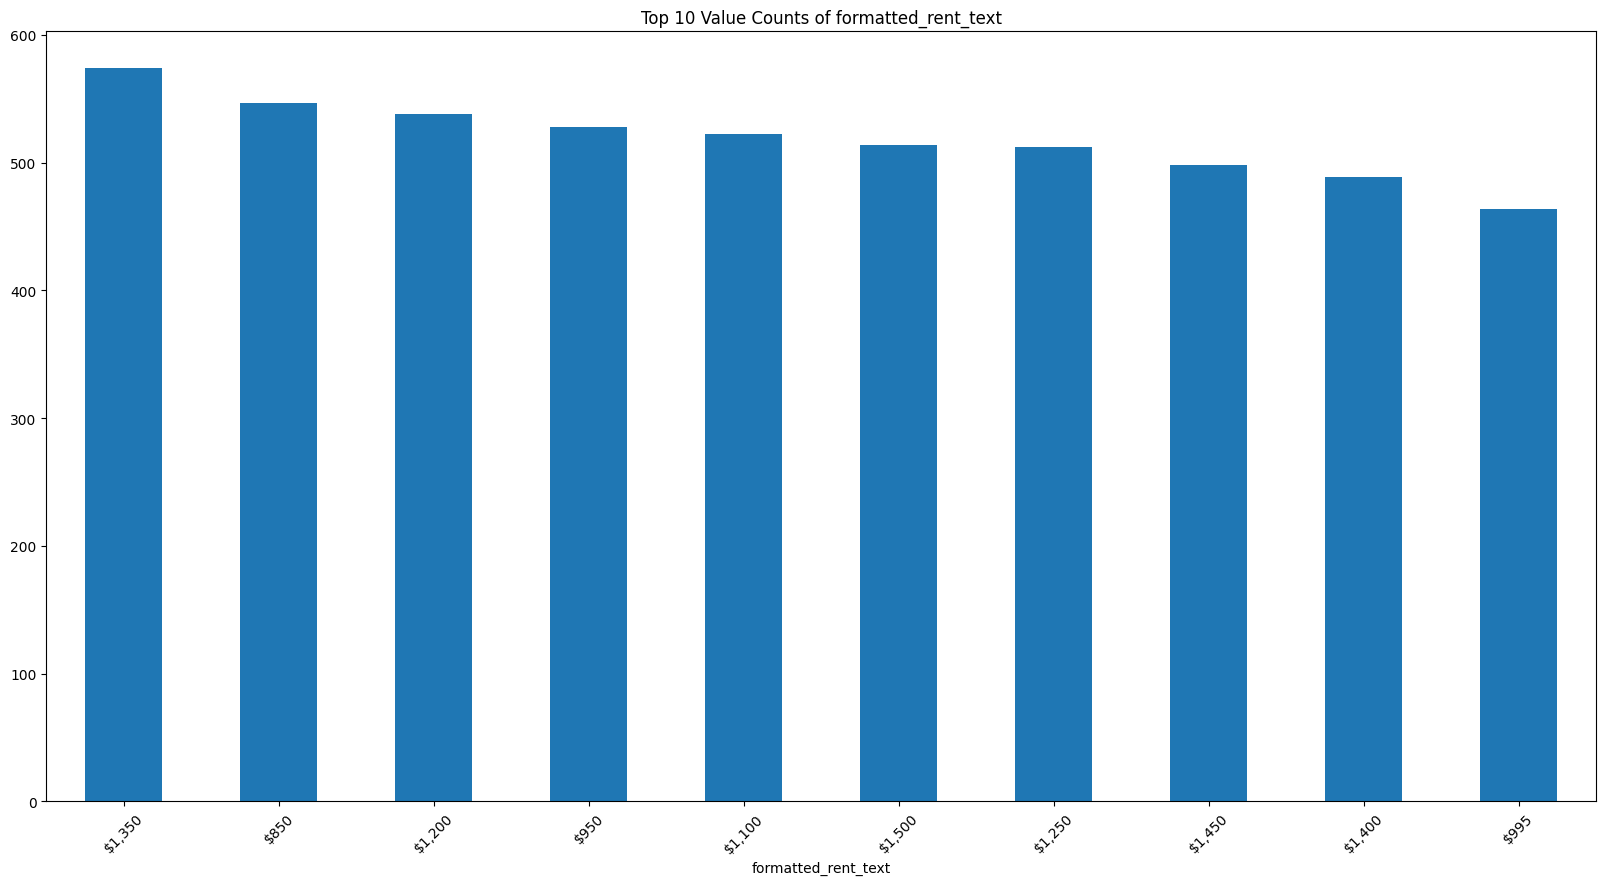

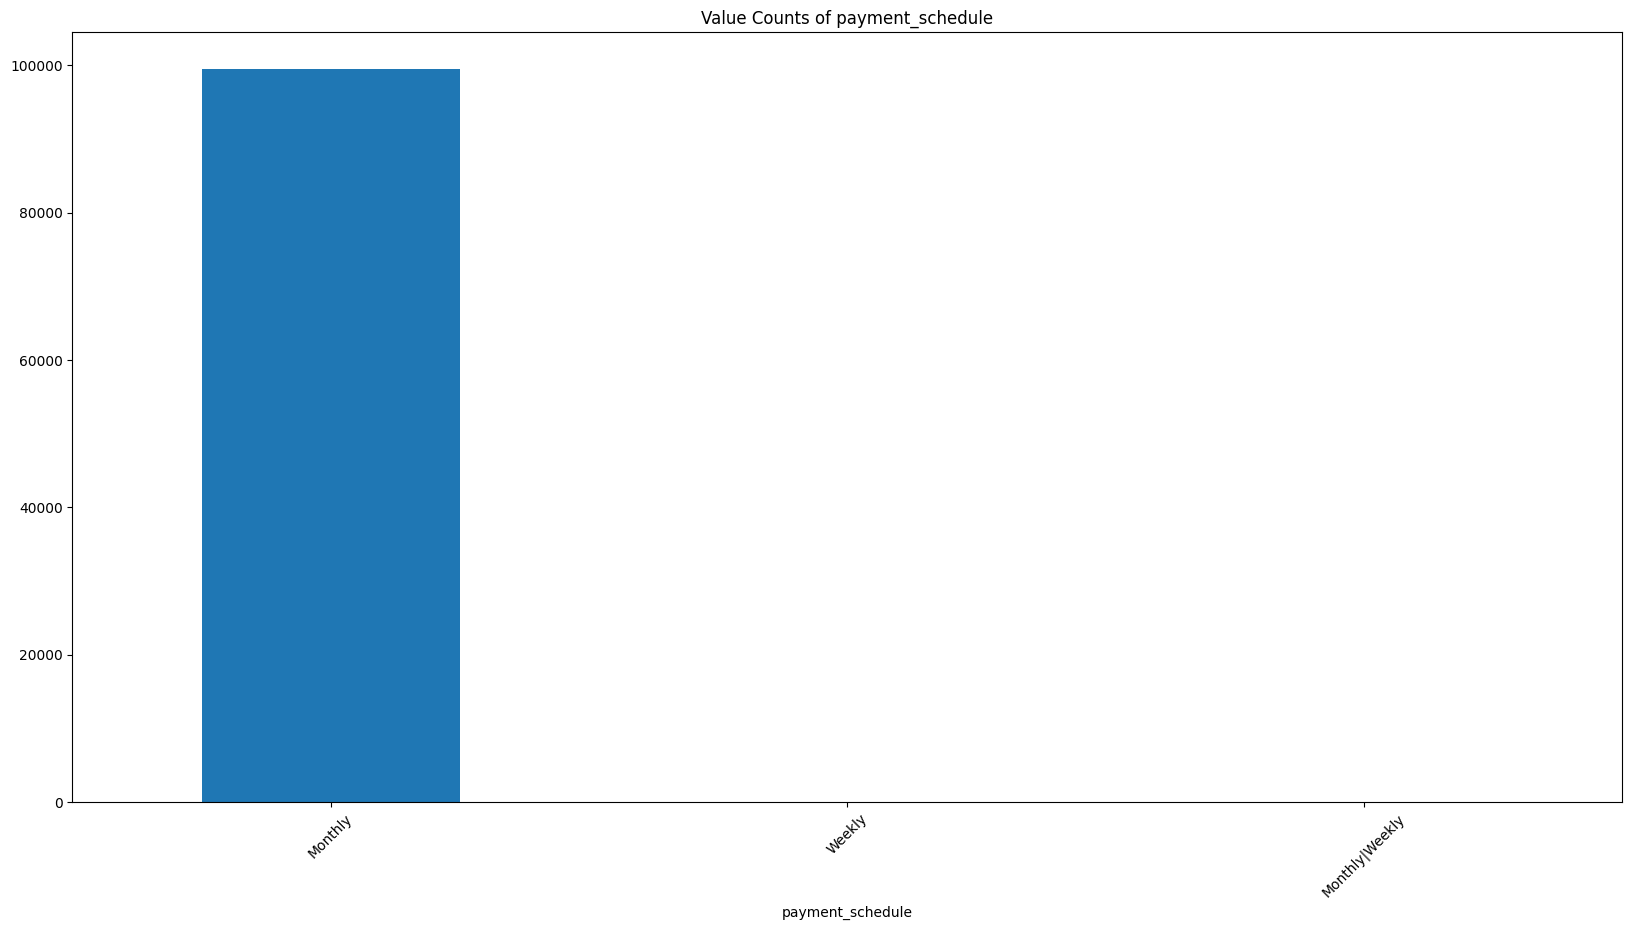

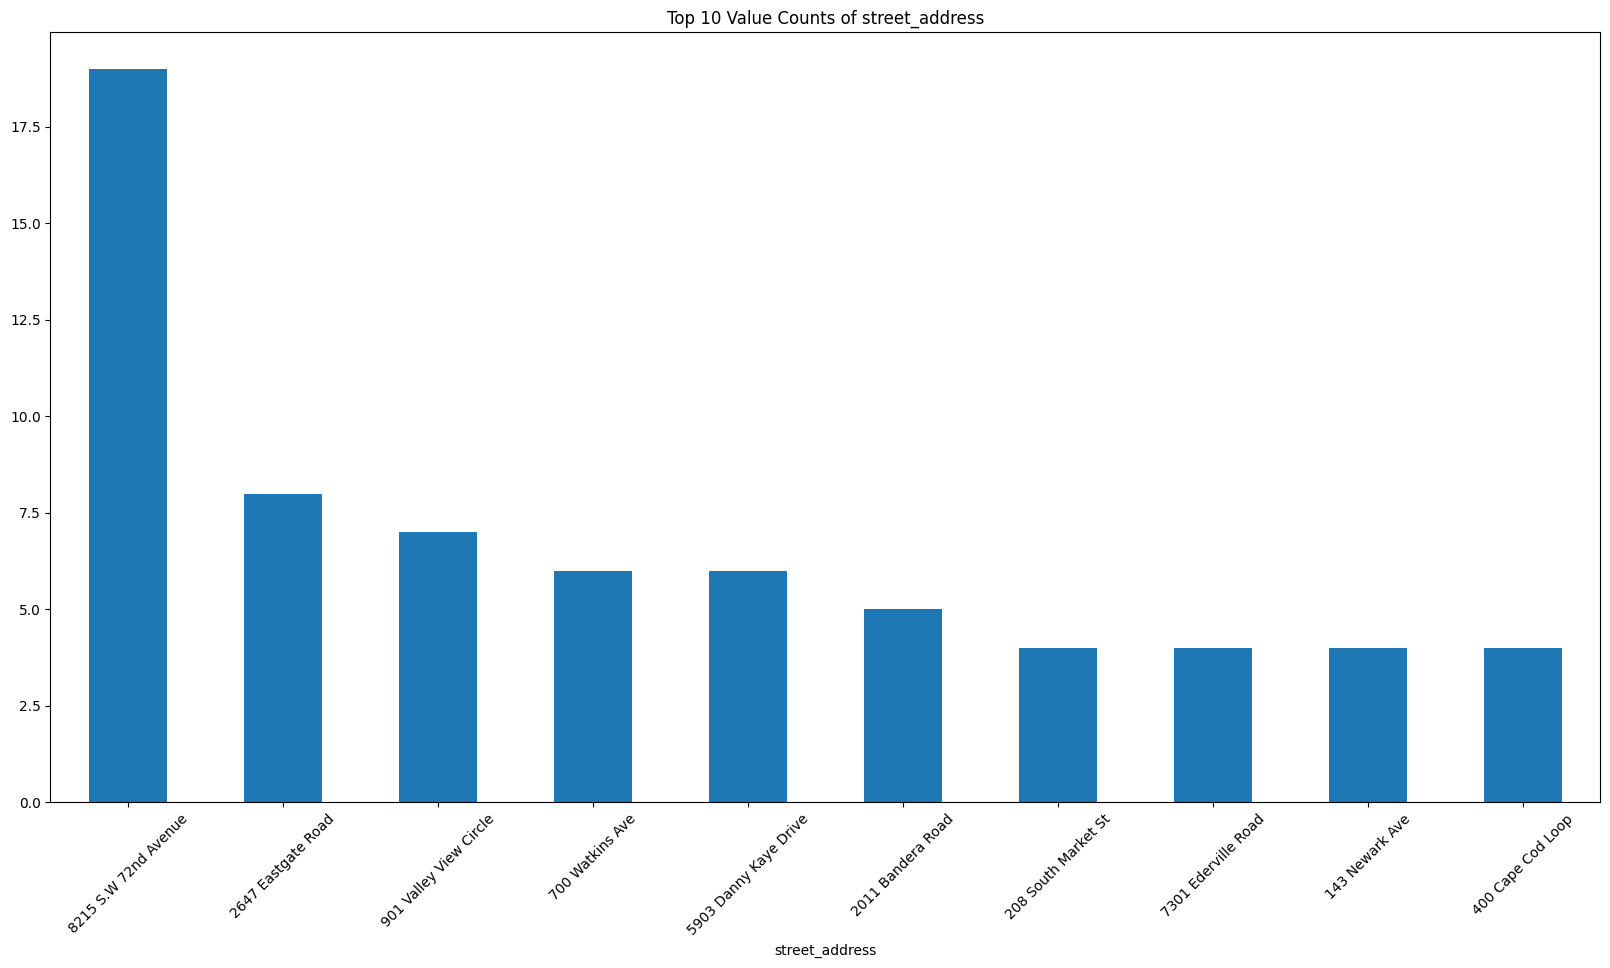

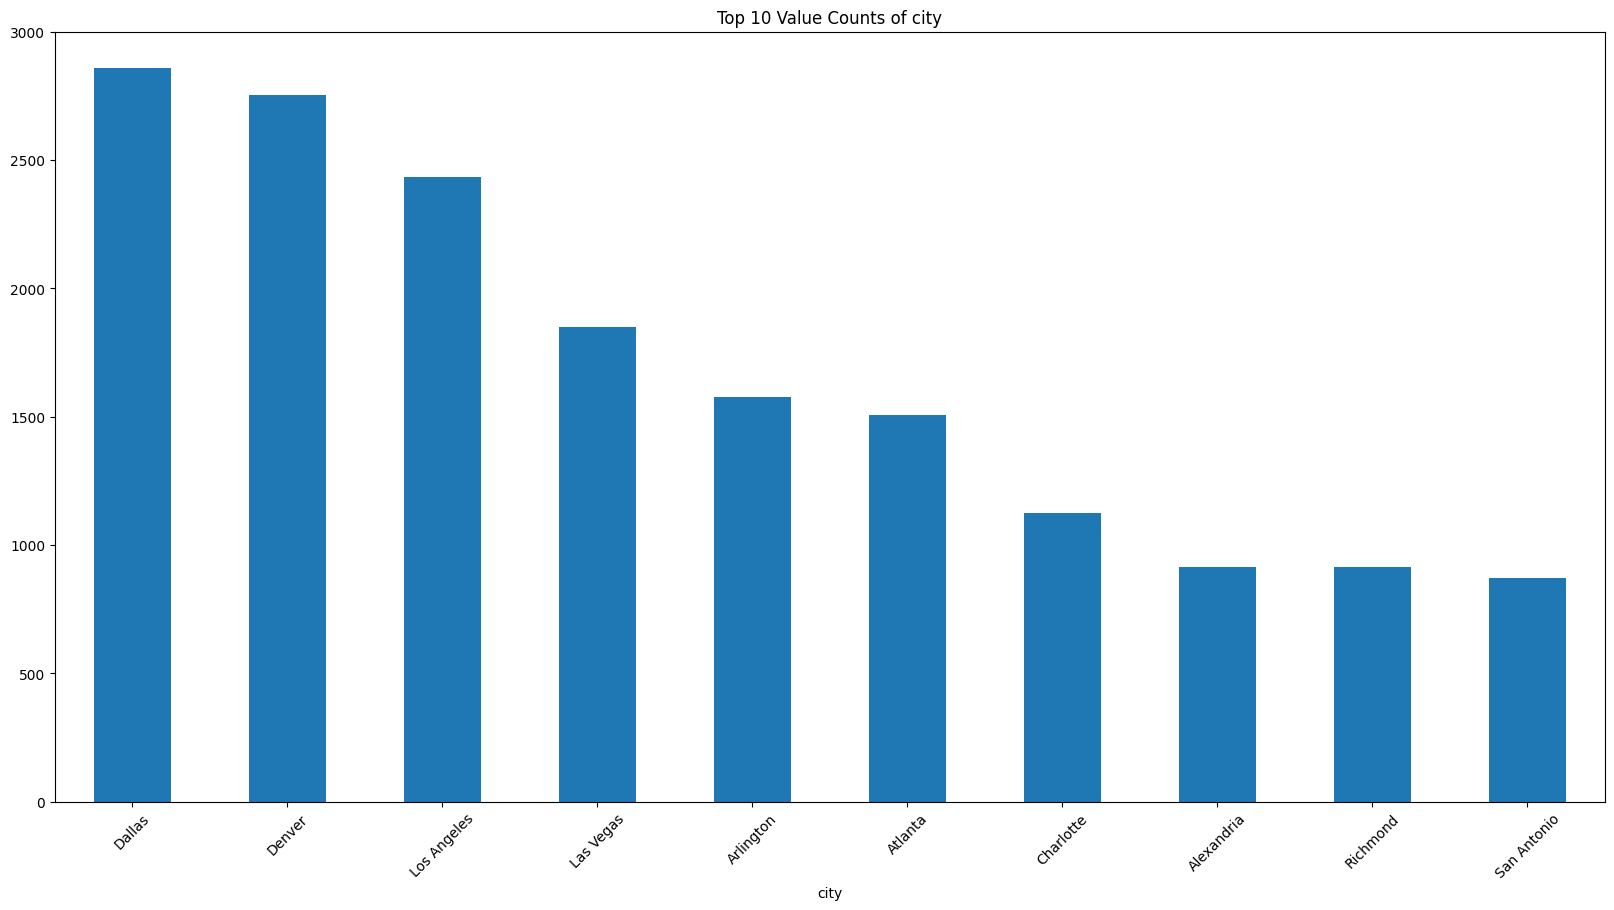

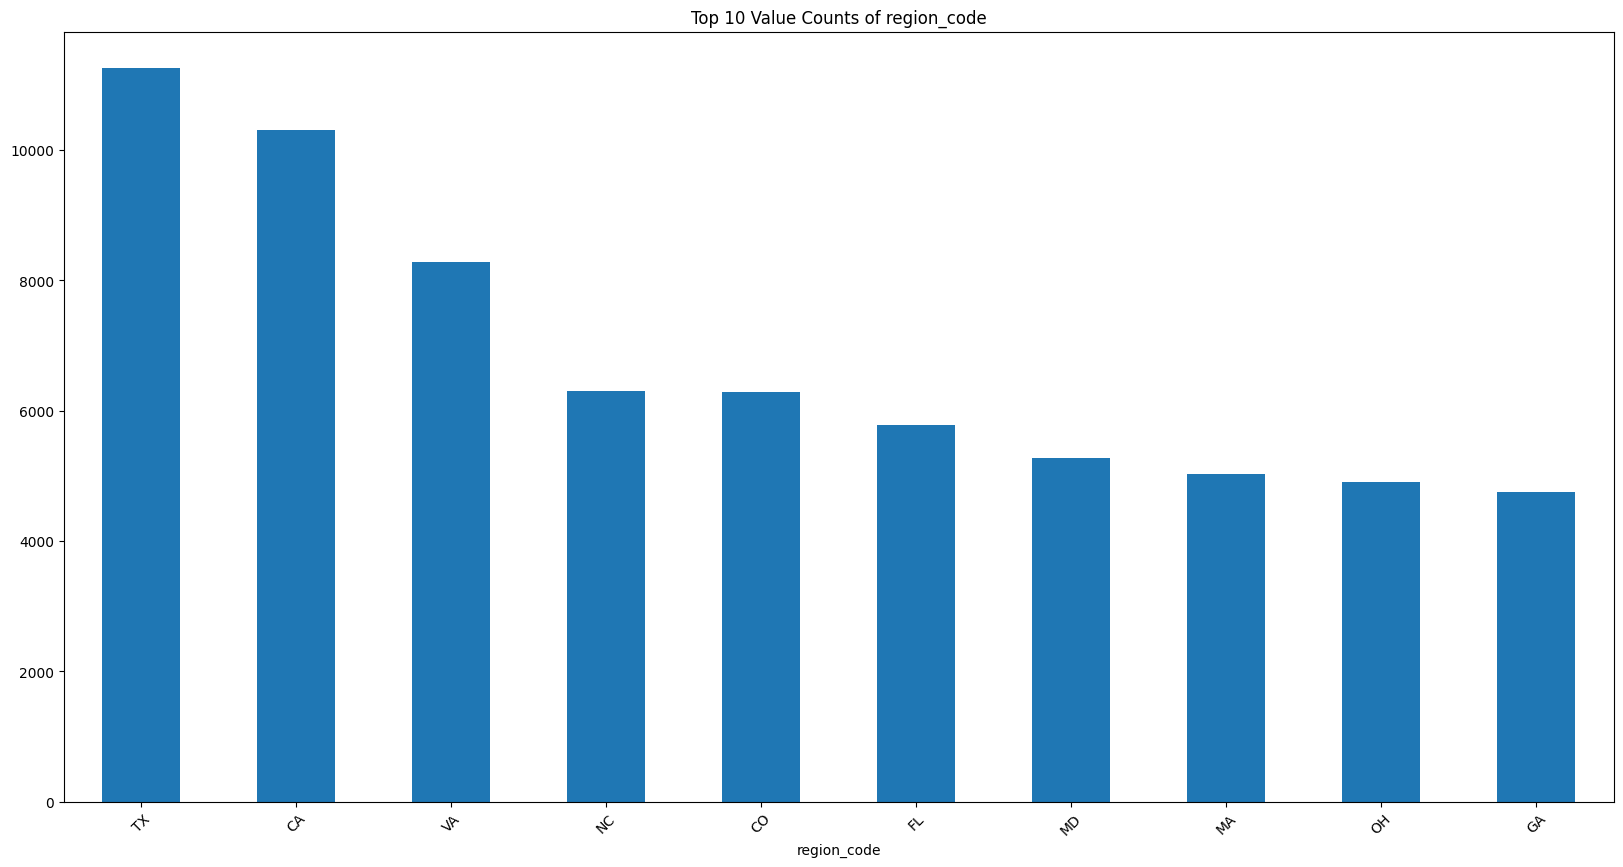

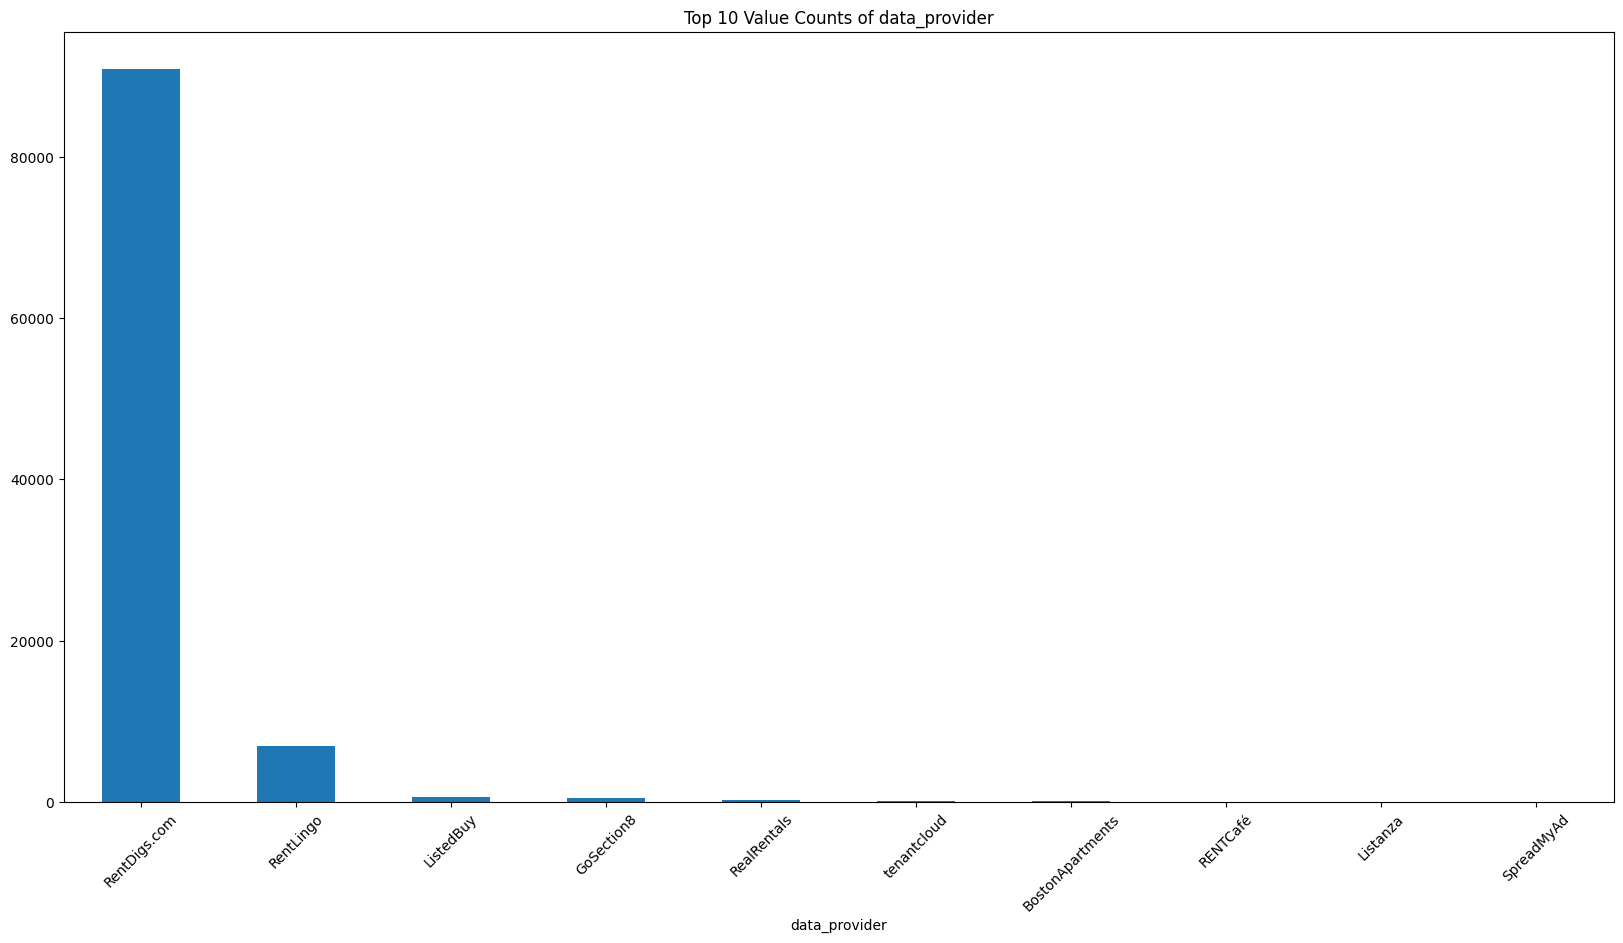

In [7]:

# For Categorical Colums
cat_col=df.select_dtypes(include=['object']).columns
for c in cat_col:
    if df[c].nunique() <= 20 : 
        plt.figure(figsize=(20,10))
        vc = df[c].value_counts()
        vc.index=vc.index.str.replace('$','\\$',regex=False)
        vc.plot(kind='bar')
        plt.title(f'Value Counts of {c}')
        plt.xticks(rotation=45)
        plt.show()
    else :
        #we will need to plot the top 10 categories those have highest cardinality columns
        plt.figure(figsize=(20,10))
        vc = df[c].value_counts().head(10)
        vc.index=vc.index.str.replace('$','\\$',regex=False)
        vc.plot(kind='bar')
        plt.title(f'Top 10 Value Counts of {c}')
        plt.xticks(rotation=45)
        plt.show()

`4. Bivariate Analysis `

4.1 Numerical Features Correlation

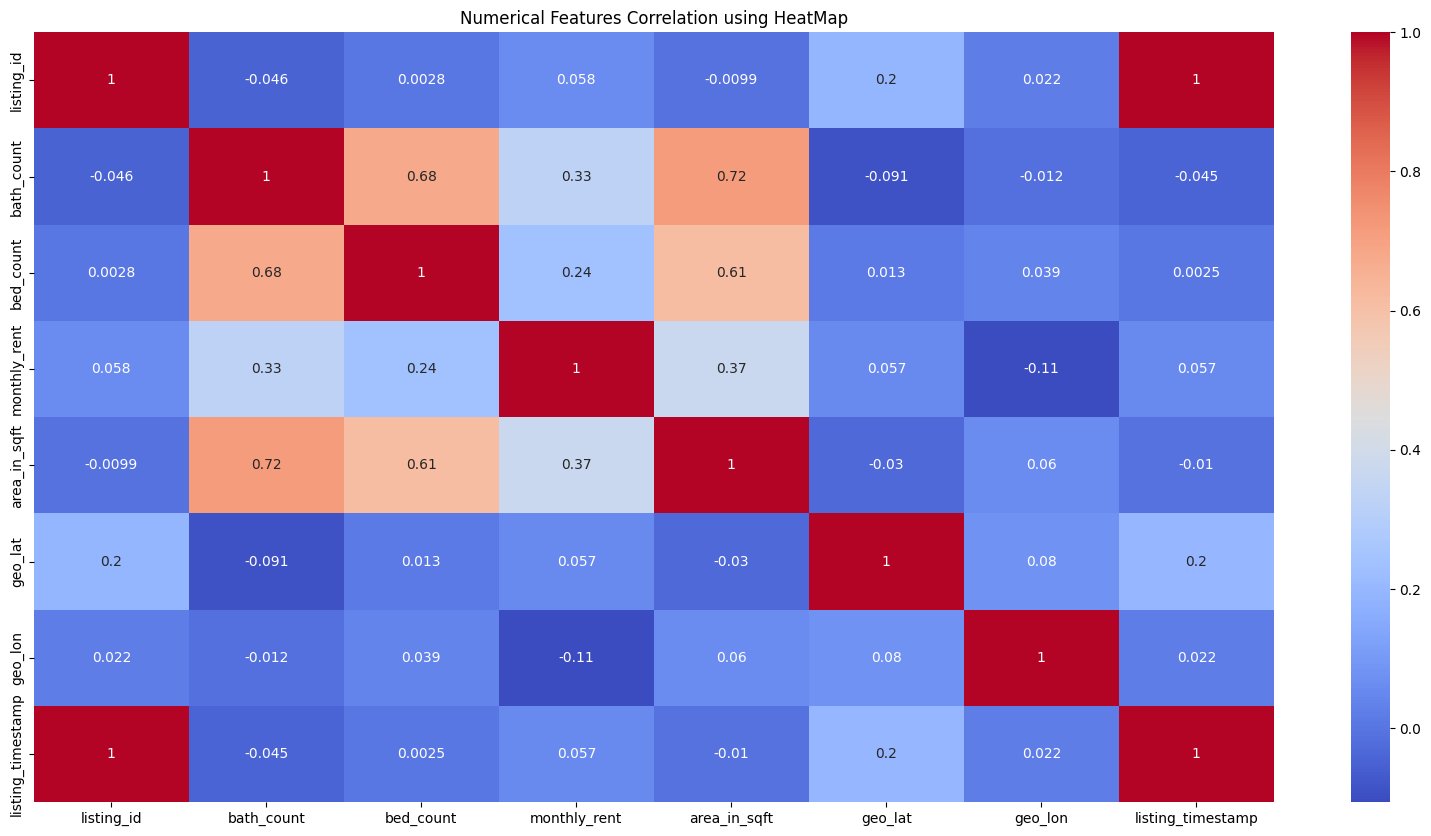

In [8]:

plt.figure(figsize=(20,10))
sns.heatmap(df[num_col].corr(),annot=True,cmap='coolwarm')
plt.title('Numerical Features Correlation using HeatMap')
plt.show()

4.2 Numeric Features vs Targeted Feature ( monthly_rent)

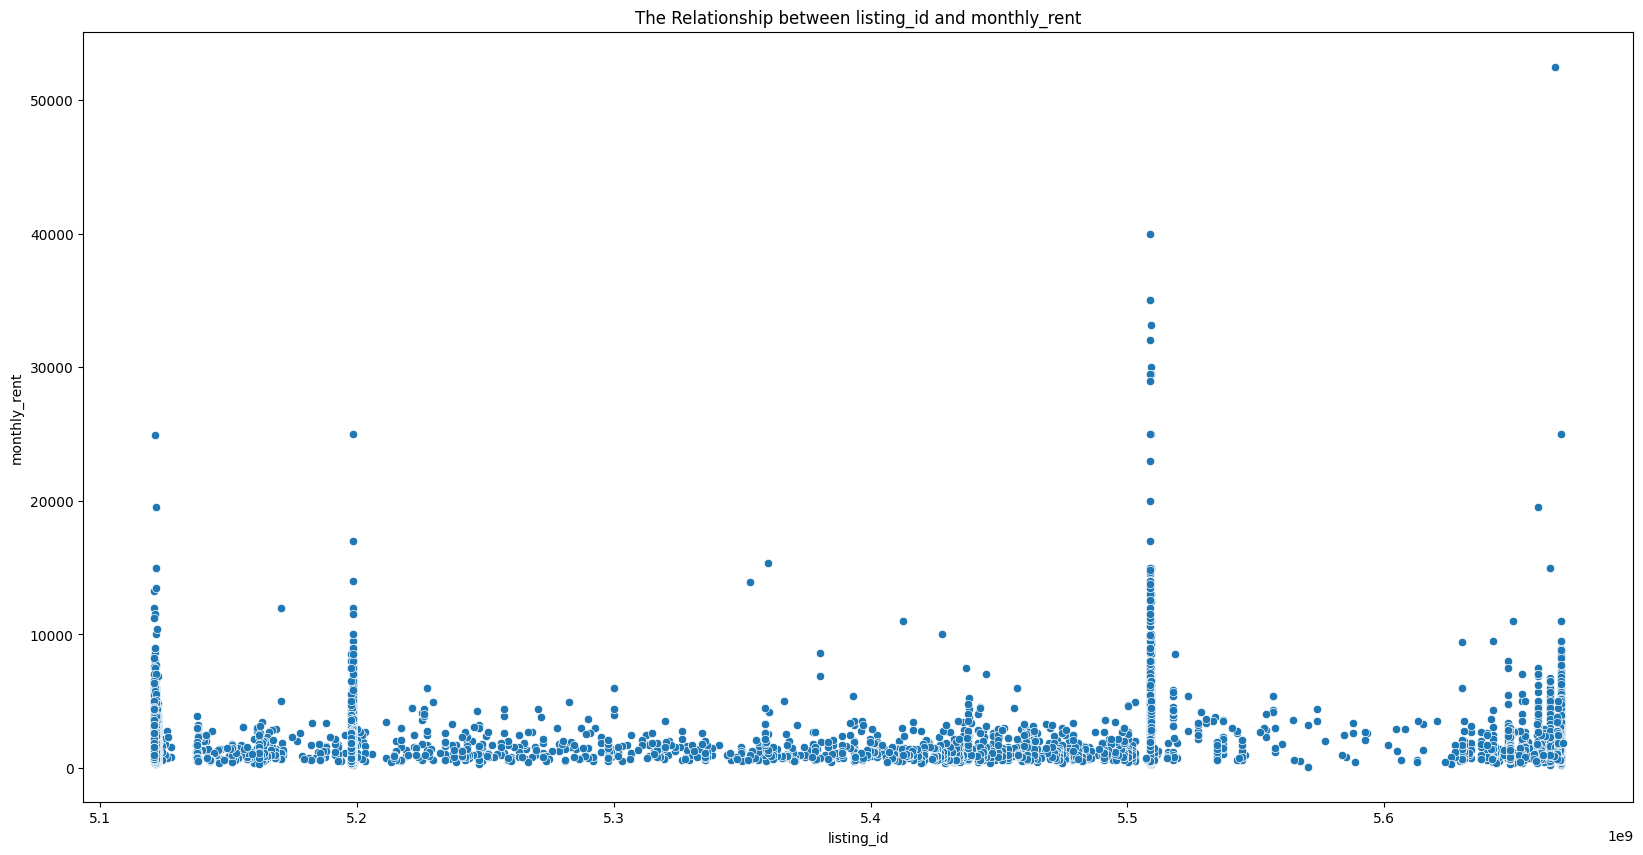

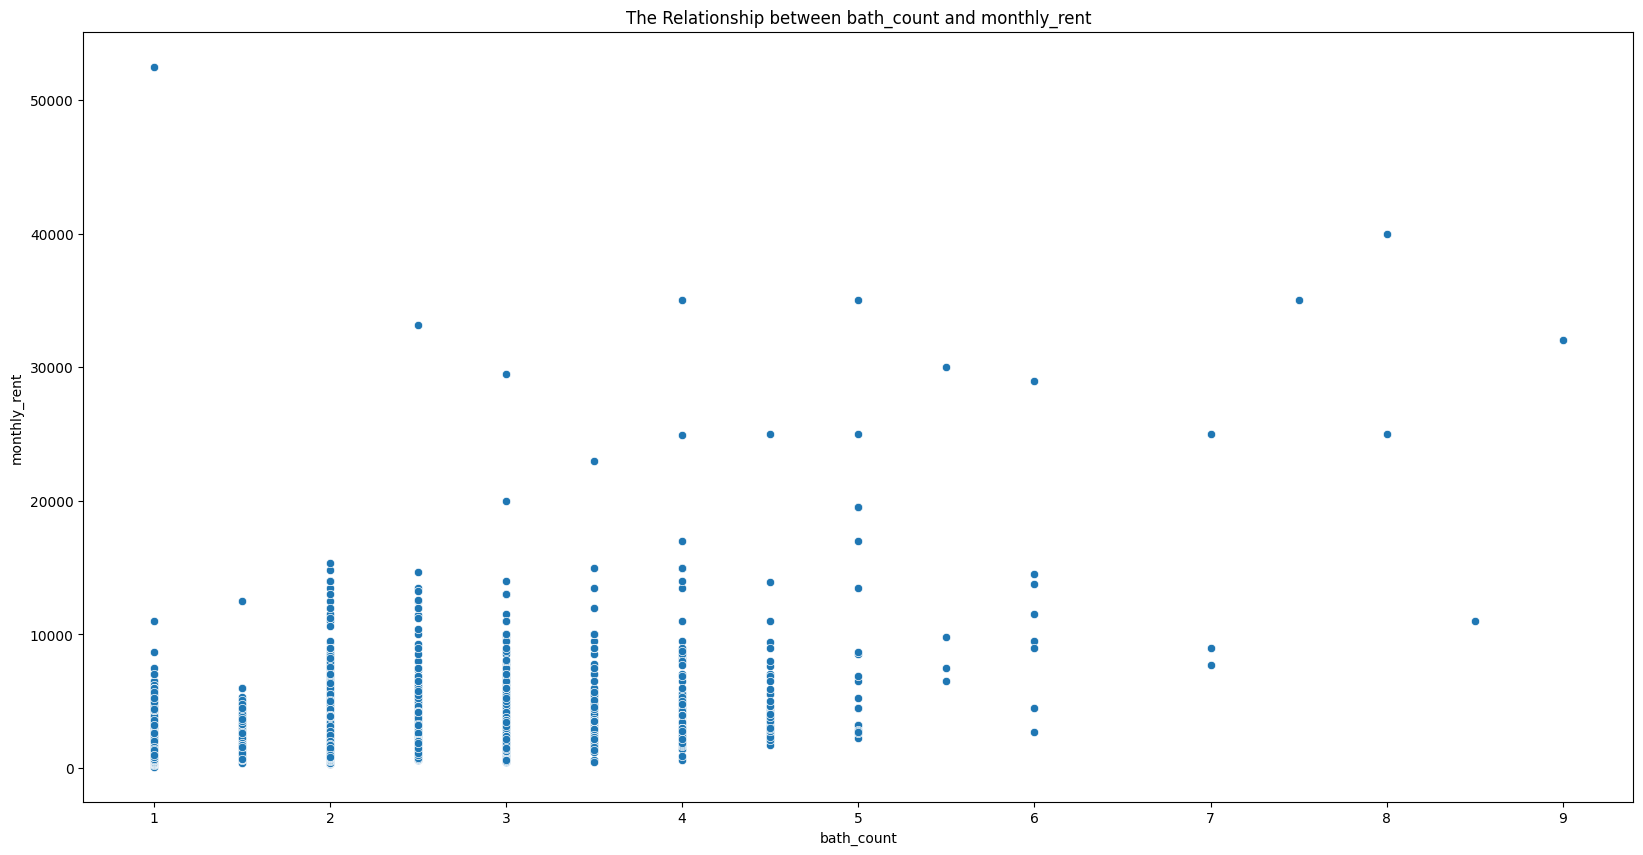

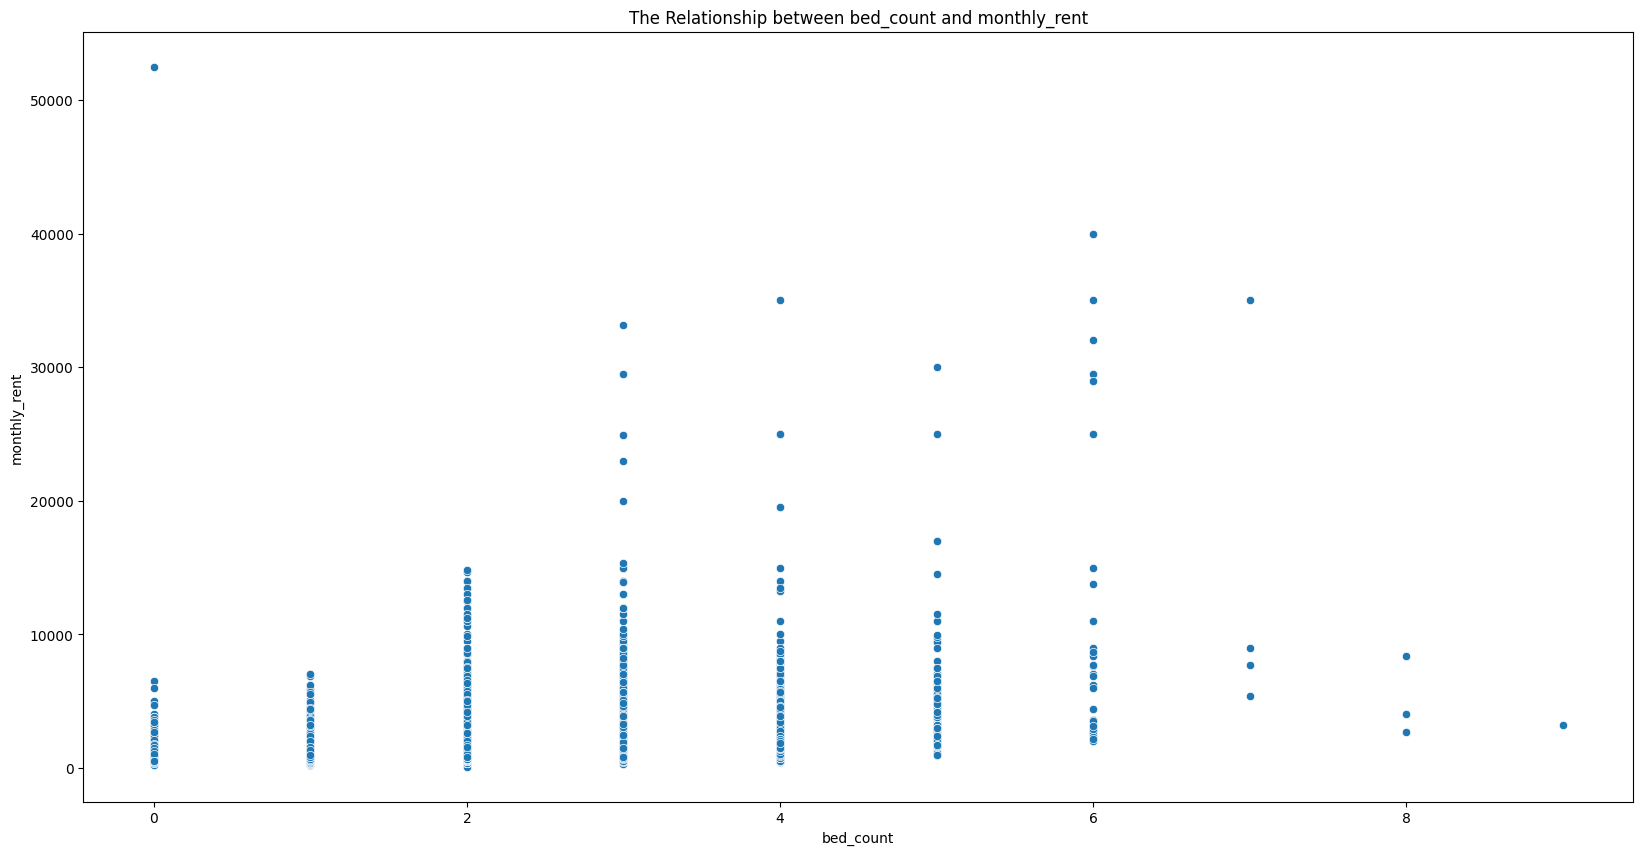

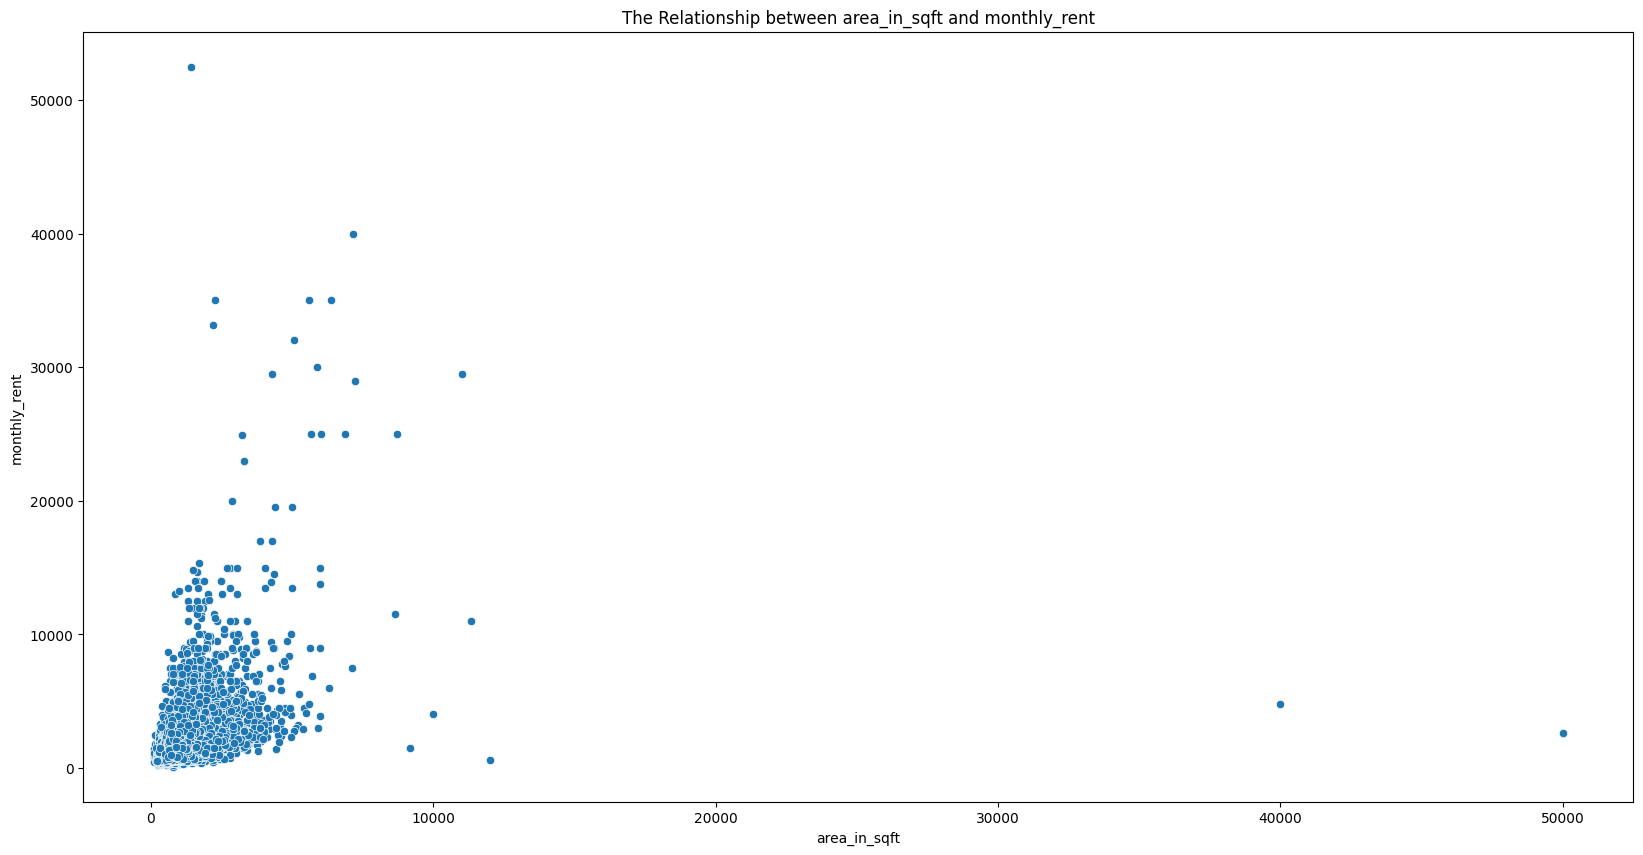

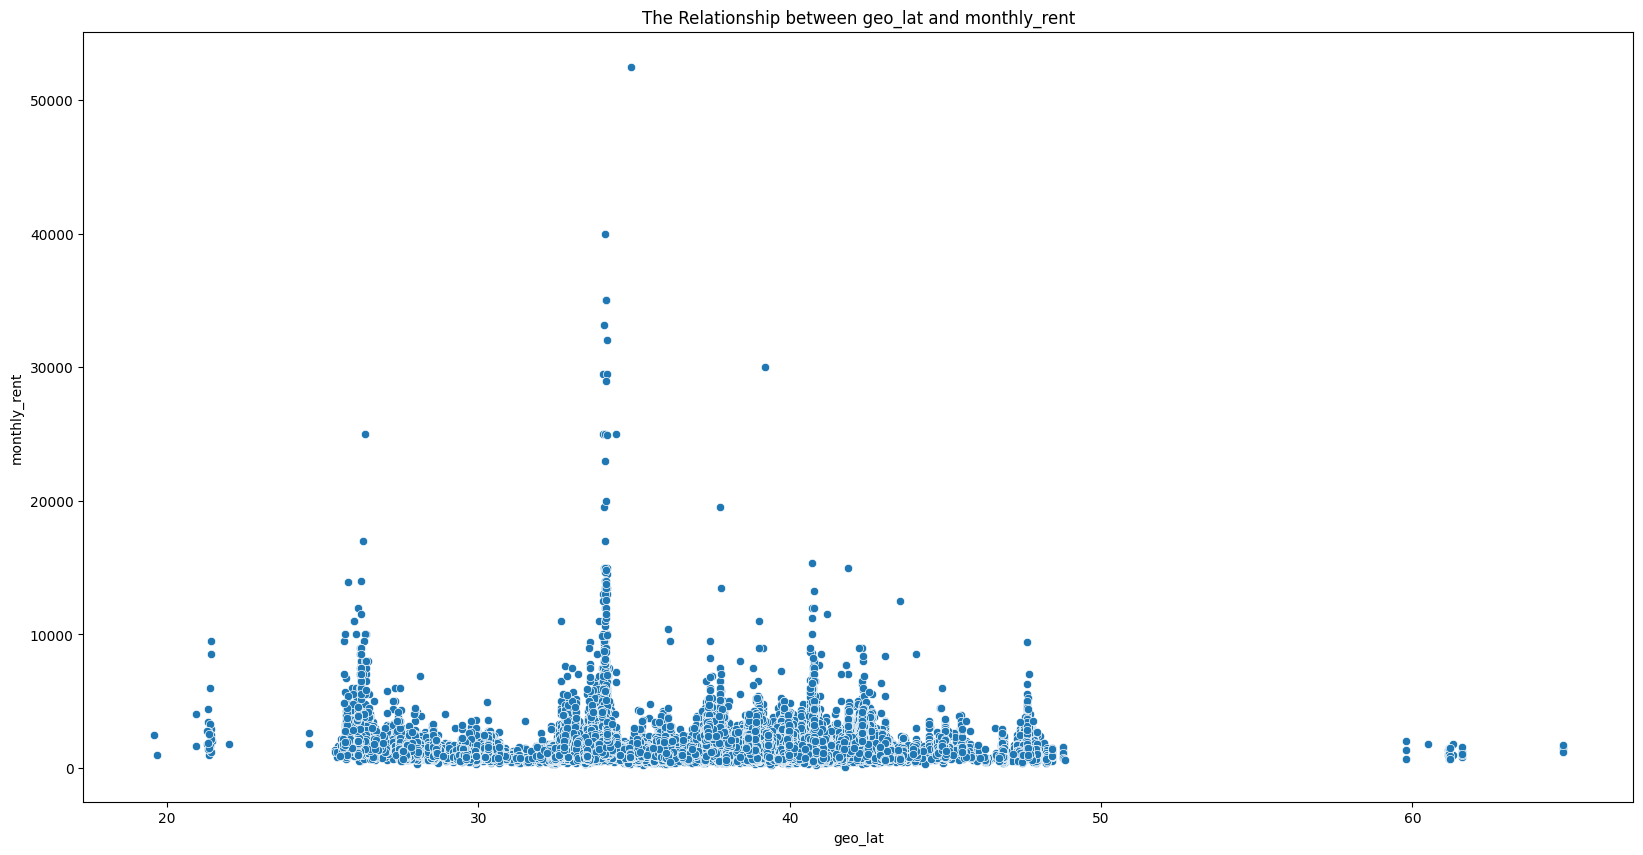

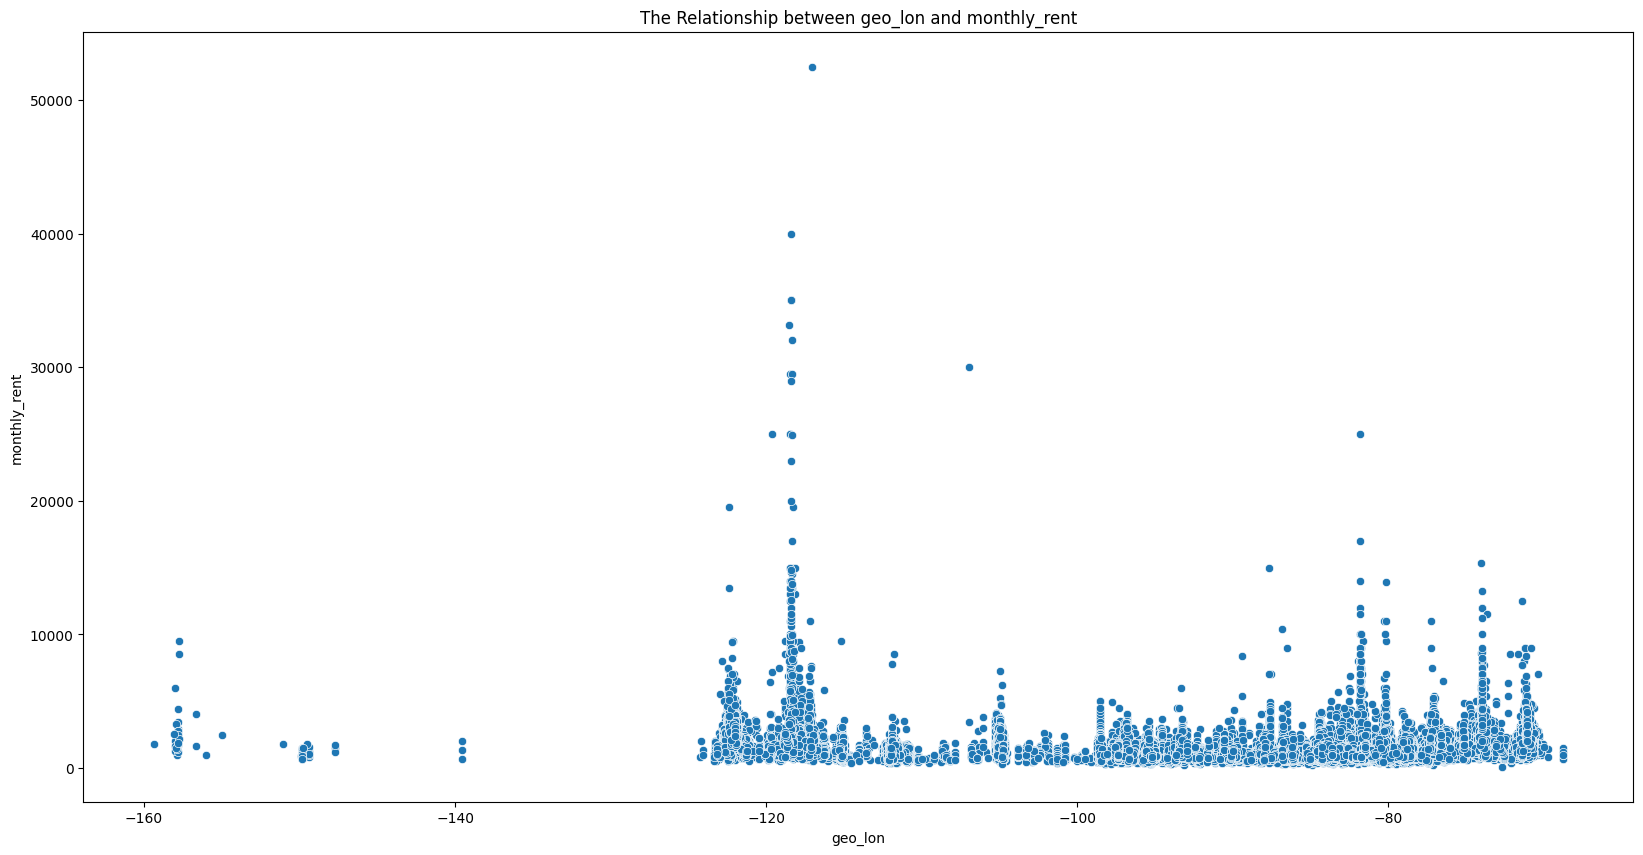

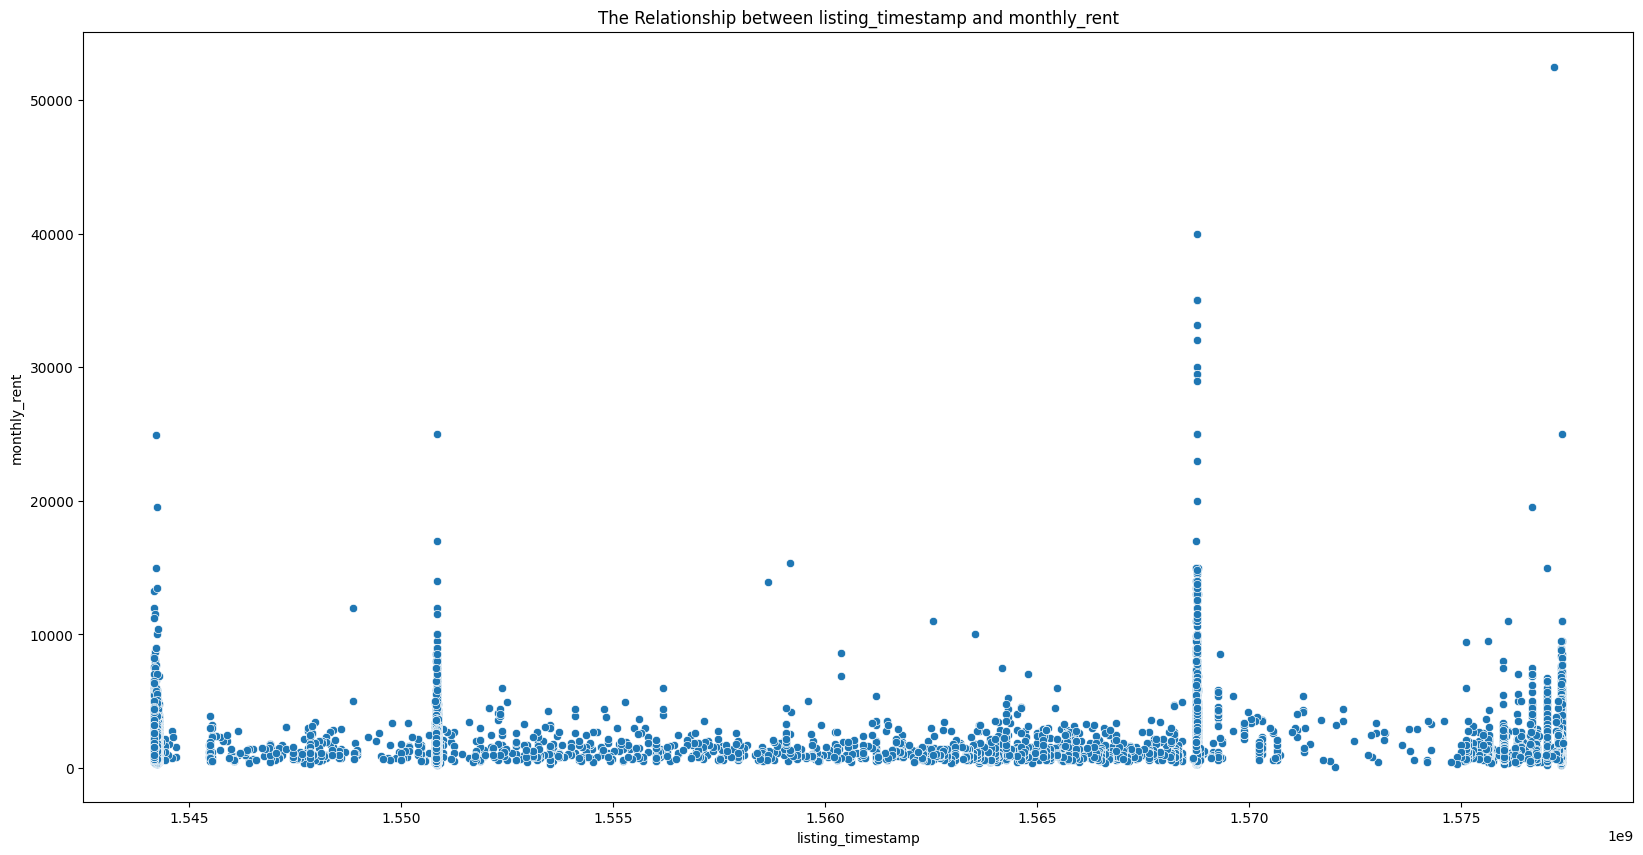

In [9]:
for c in num_col:
    if c != 'monthly_rent':
        plt.figure(figsize=(20,10))
        sns.scatterplot(x = df[c], y = df['monthly_rent'])
        plt.title(f'The Relationship between {c} and monthly_rent')
        plt.xlabel(c)
        plt.ylabel('monthly_rent')
        plt.show()
        

4.3 Categorical vs Targeted Feature(monthly_rent)

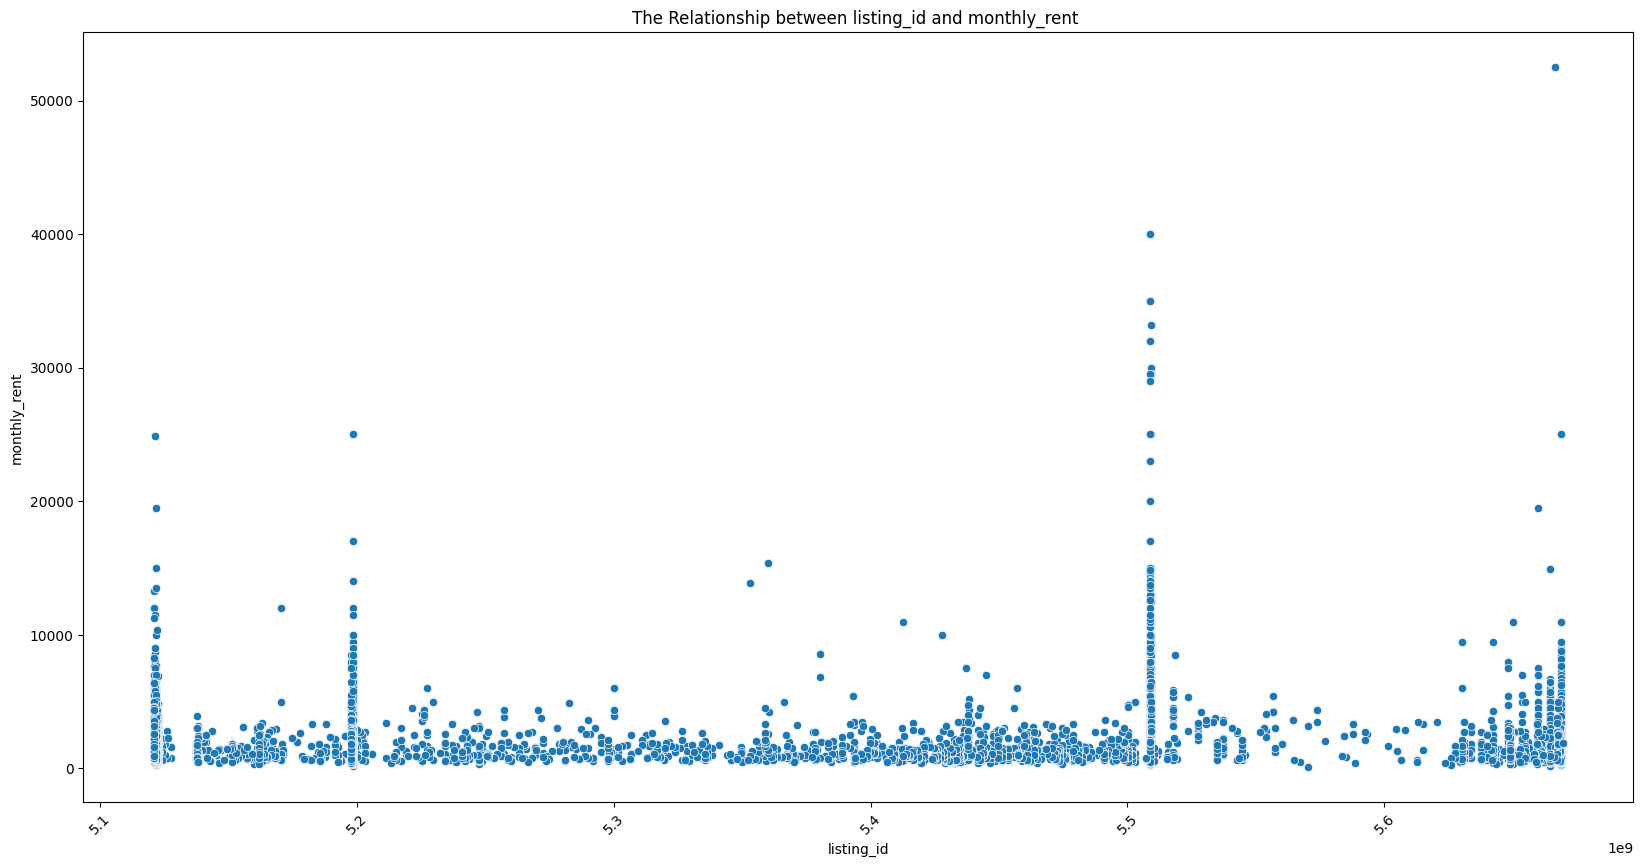

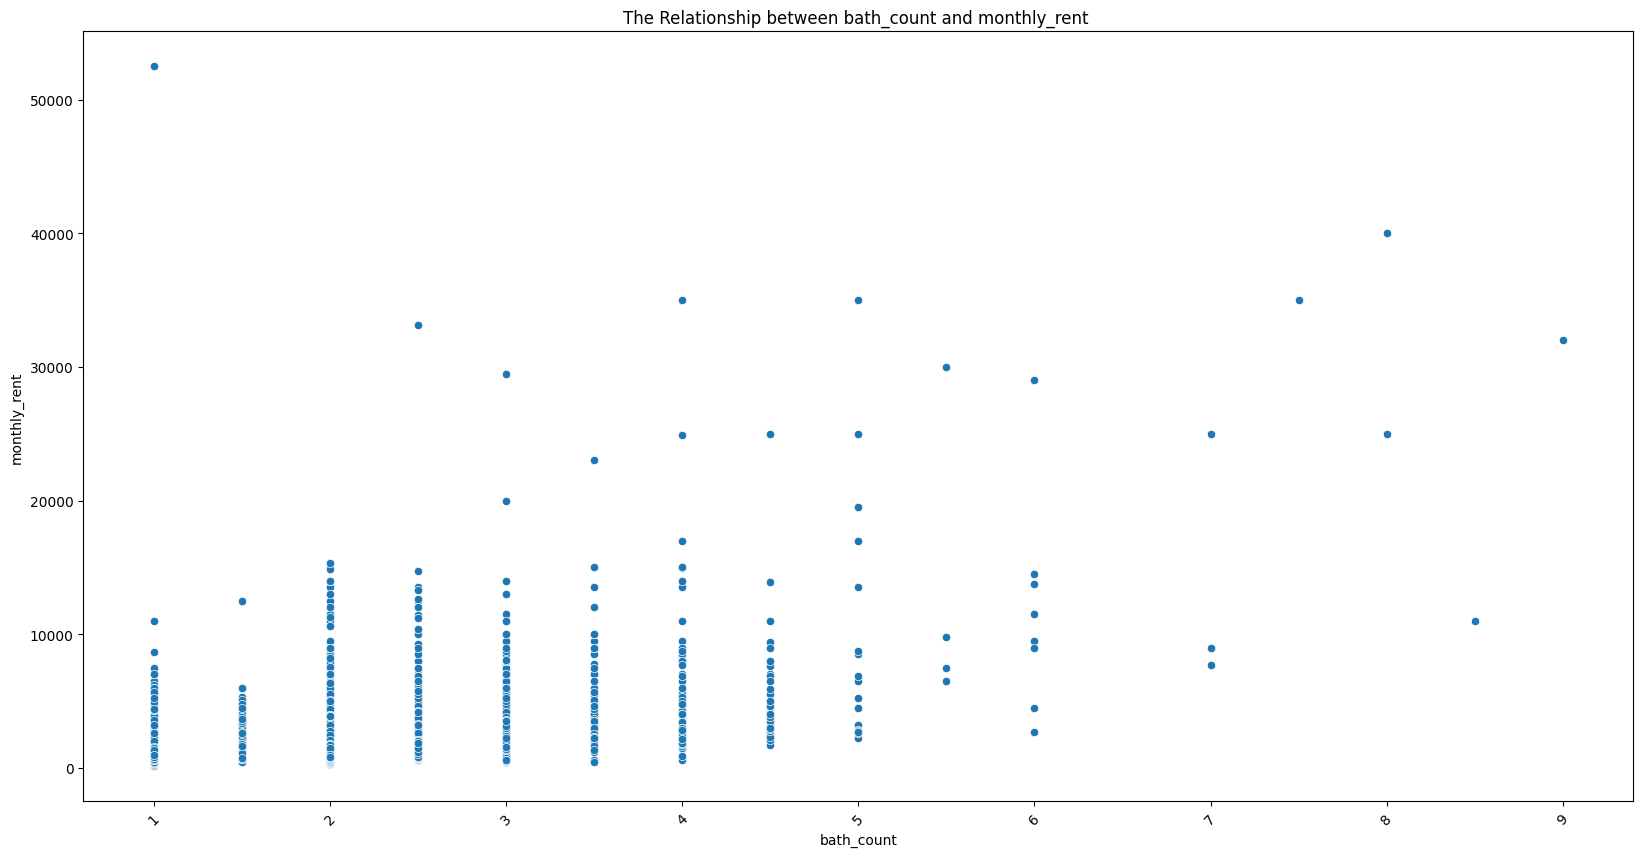

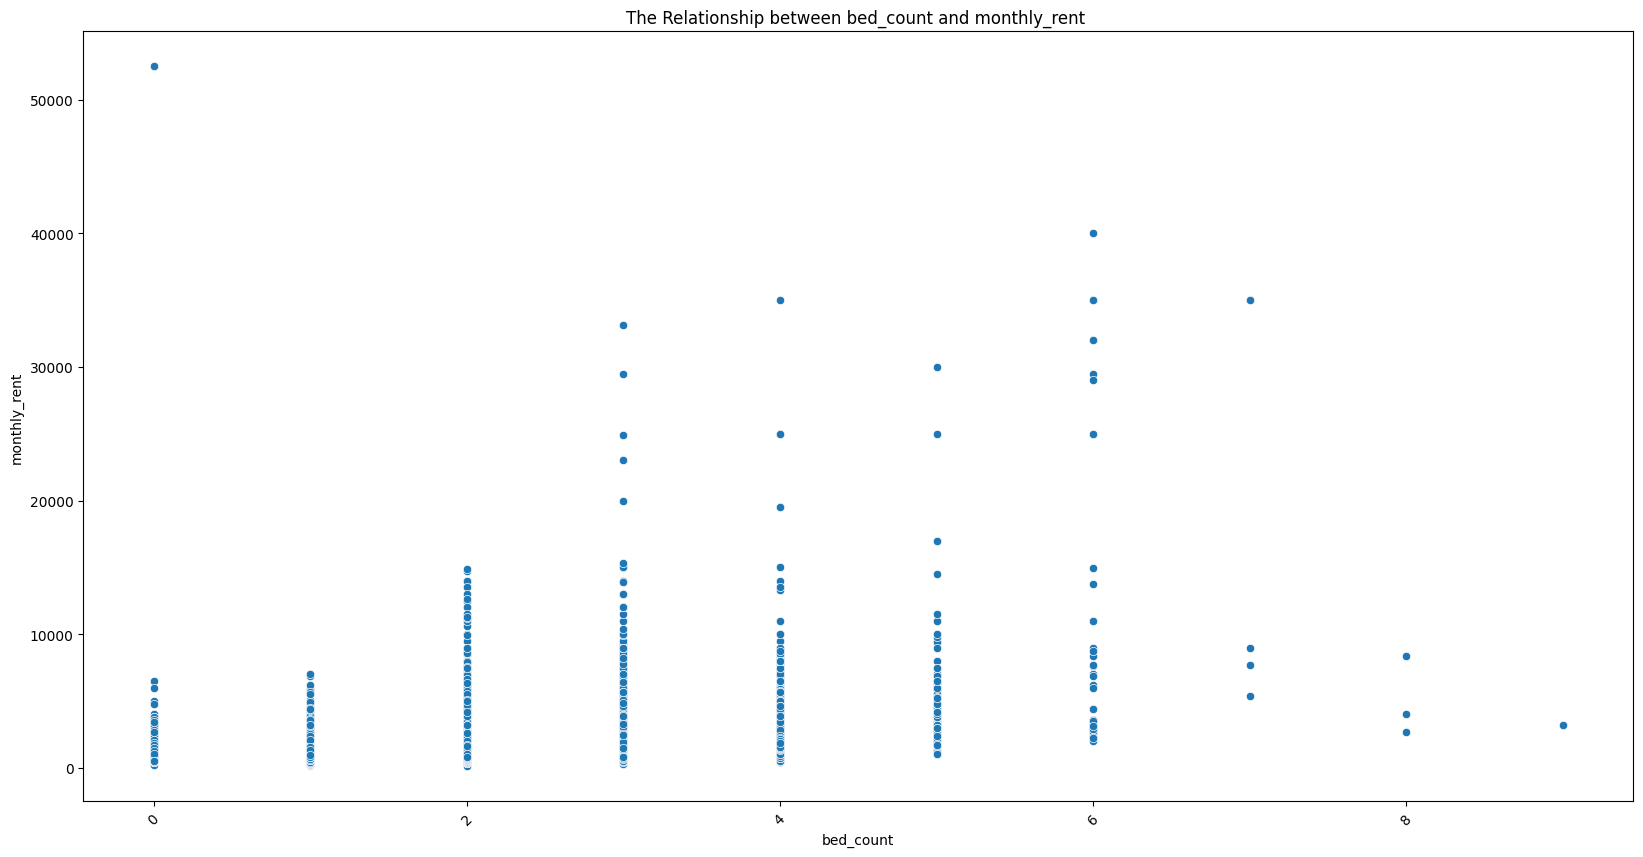

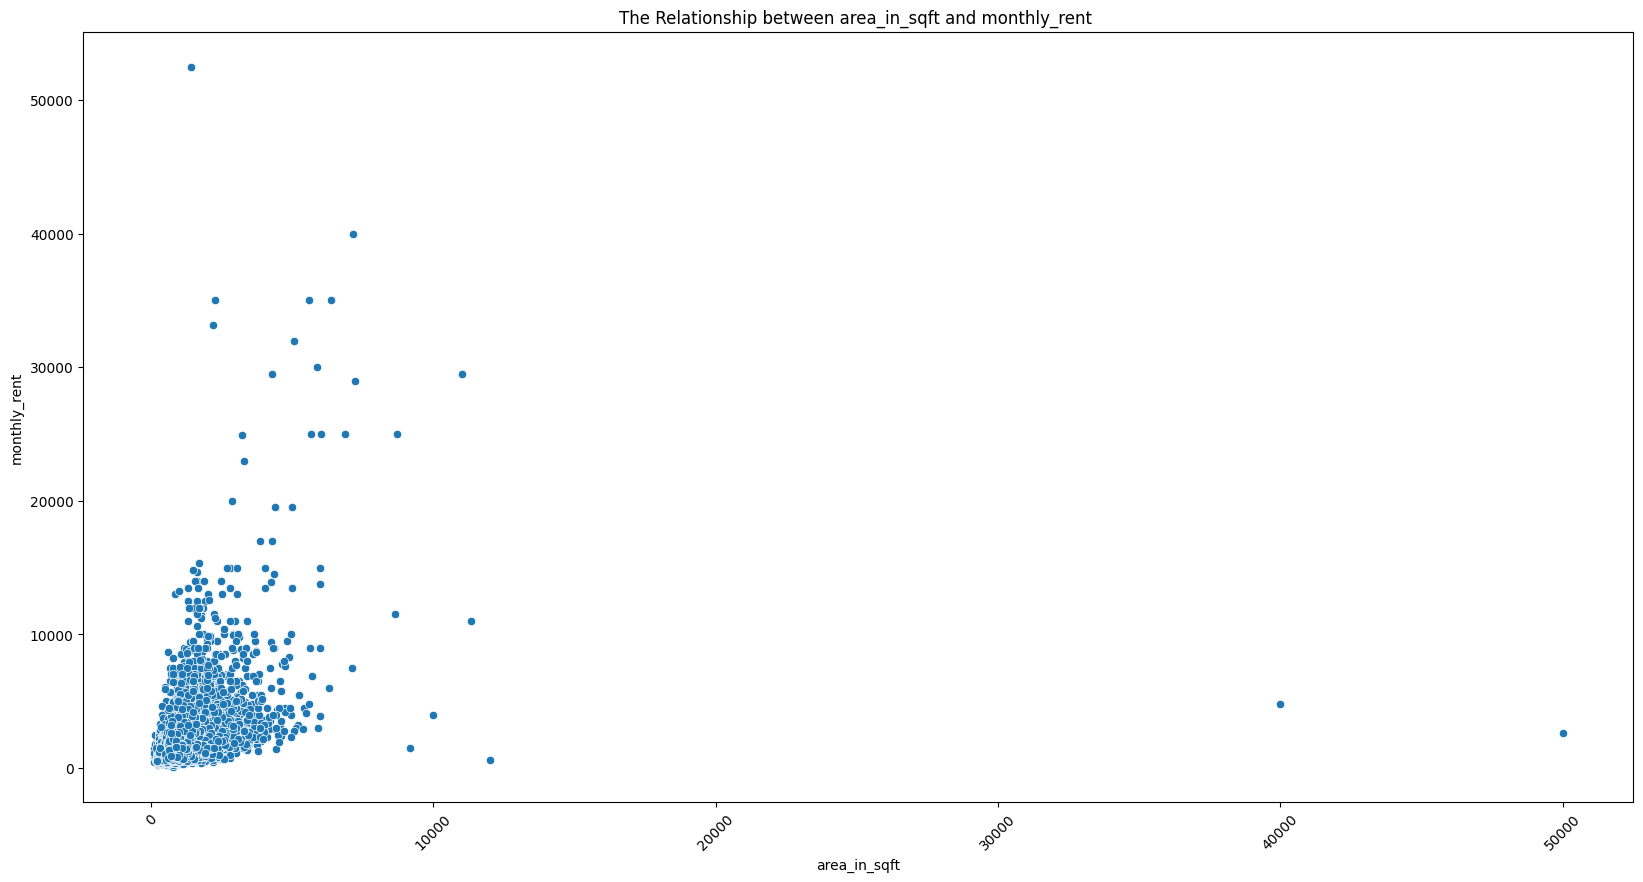

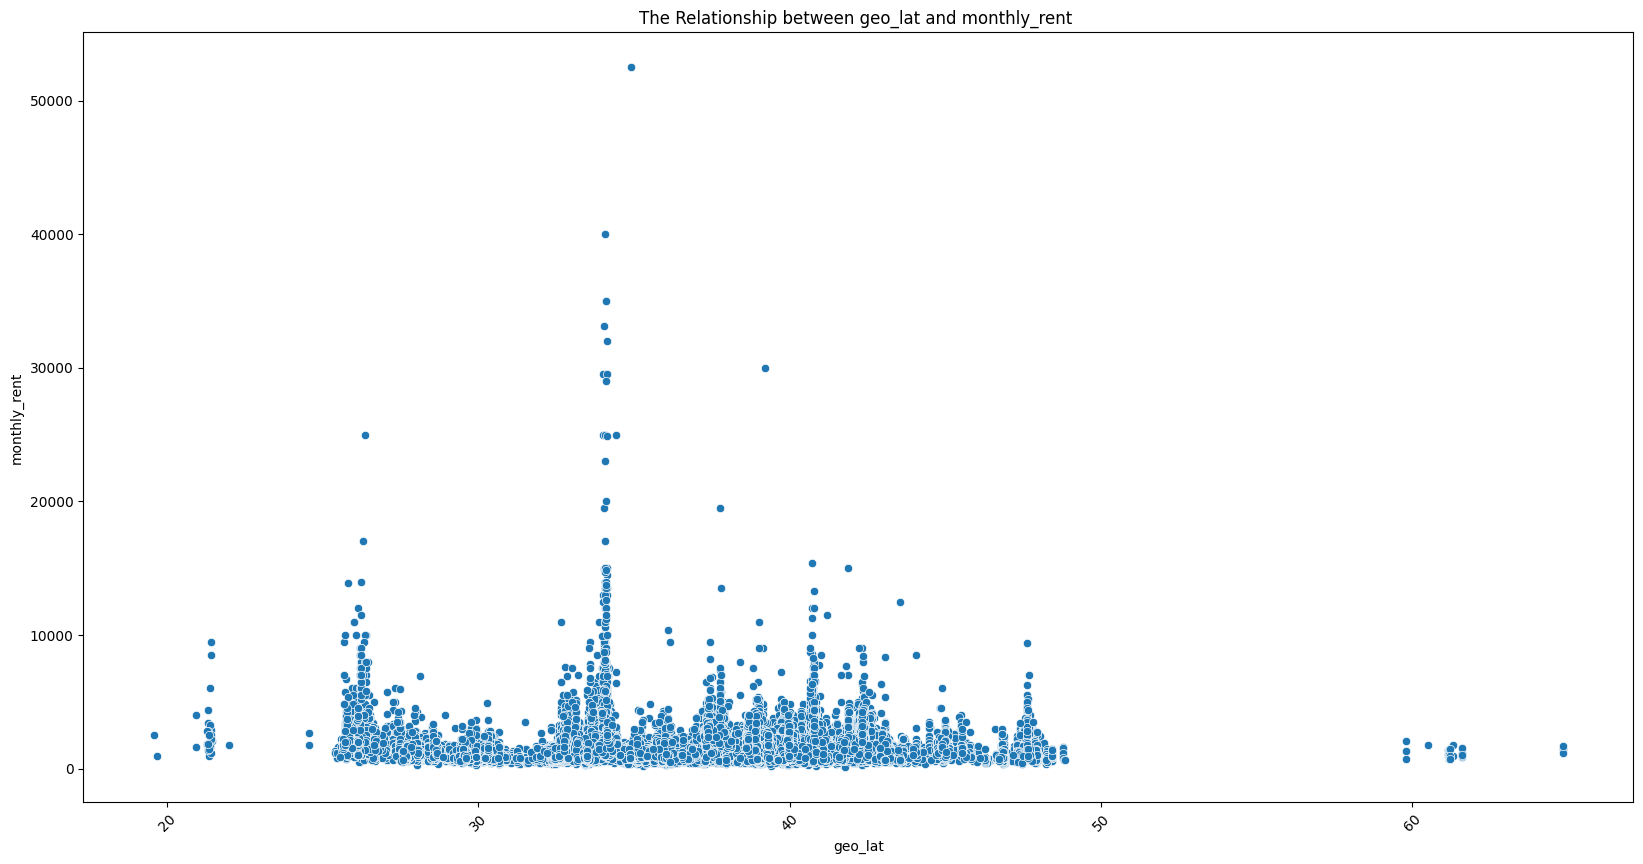

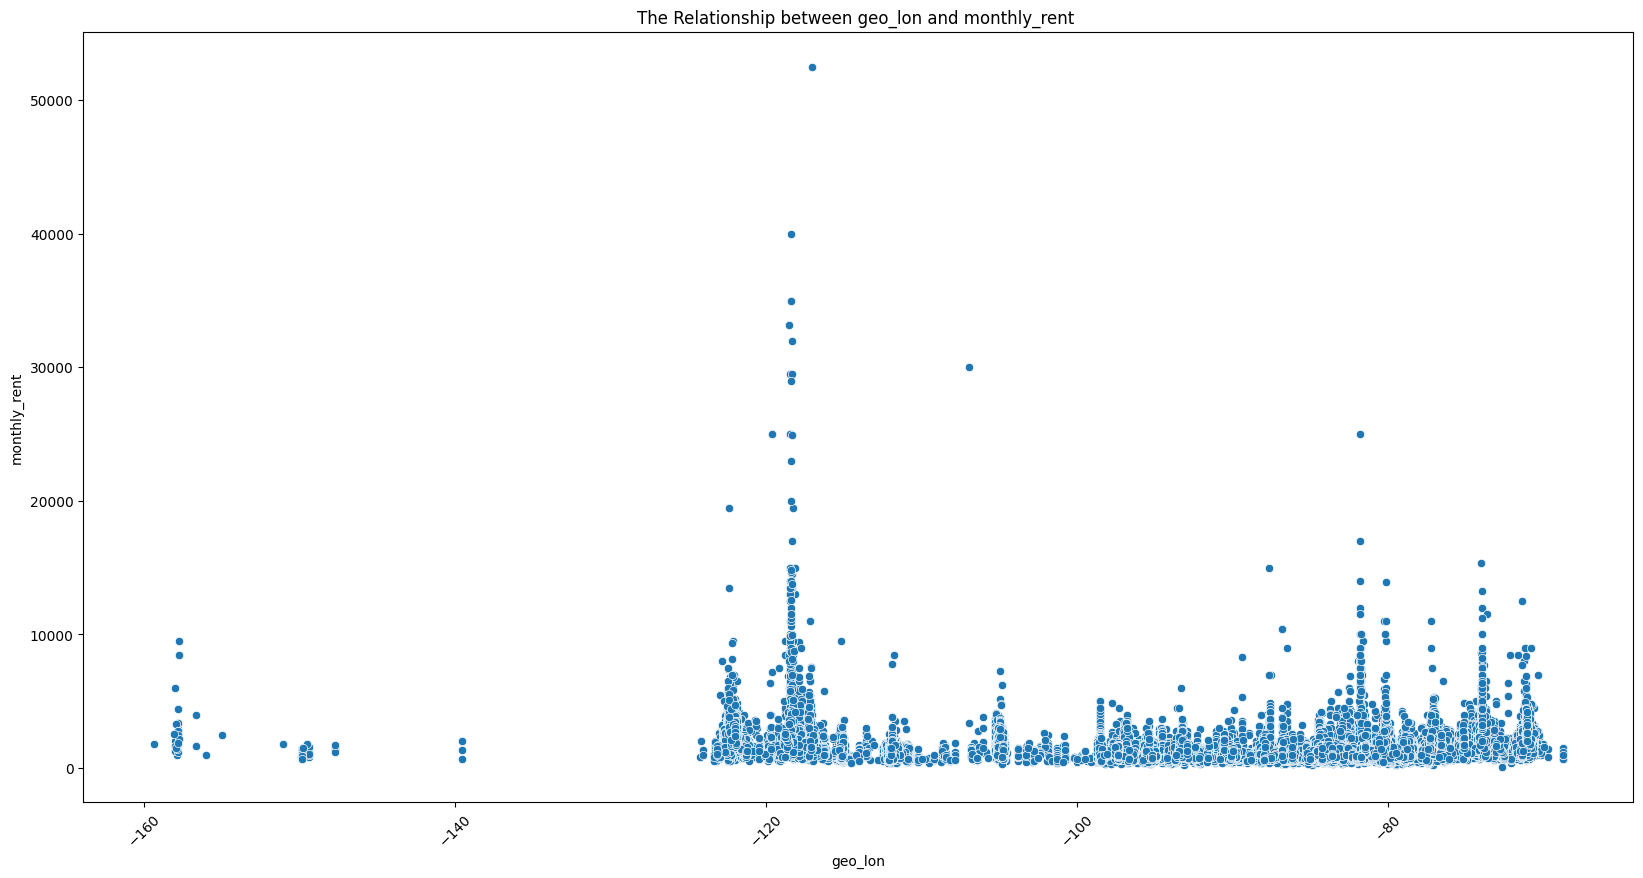

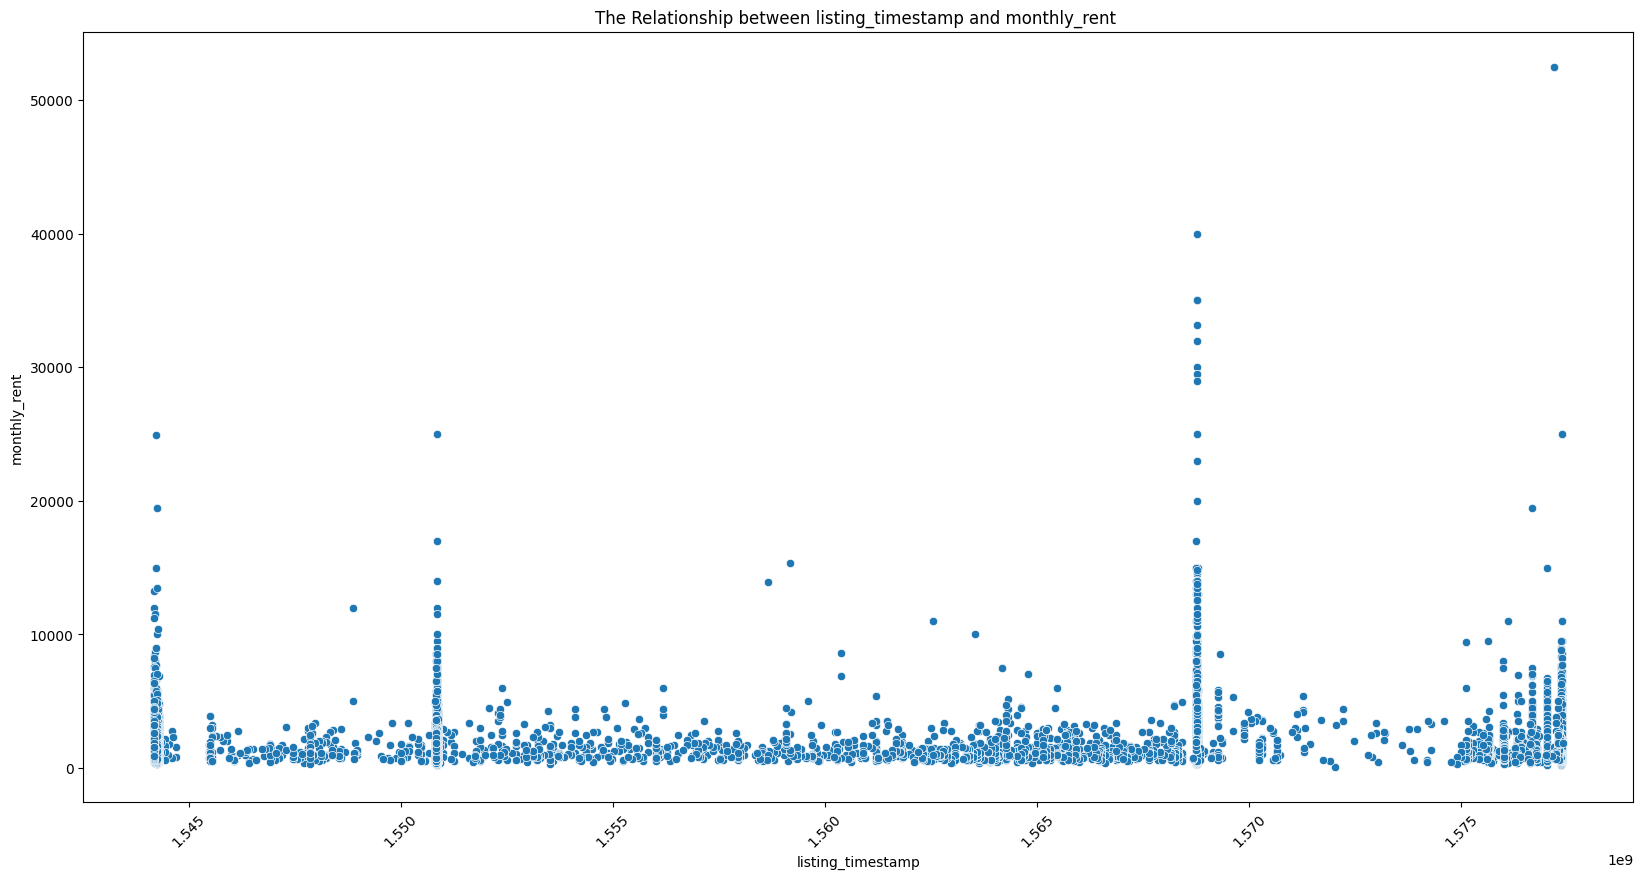

In [10]:
for c in num_col:
    if c != 'monthly_rent':
        plt.figure(figsize=(20,10))
        sns.scatterplot(x = df[c] , y = df['monthly_rent'])
        plt.title(f'The Relationship between {c} and monthly_rent ')
        plt.xticks(rotation = 45)
        plt.xlabel(c)
        plt.ylabel('monthly_rent')
        plt.show()
        

In [11]:
df.columns

Index(['listing_id', 'listing_category', 'headline', 'included_features',
       'bath_count', 'bed_count', 'payment_currency', 'service_fee_applicable',
       'image_available', 'pet_policy', 'monthly_rent', 'formatted_rent_text',
       'payment_schedule', 'area_in_sqft', 'street_address', 'city',
       'region_code', 'geo_lat', 'geo_lon', 'data_provider',
       'listing_timestamp'],
      dtype='object')

`5. Multivariate Analysis`

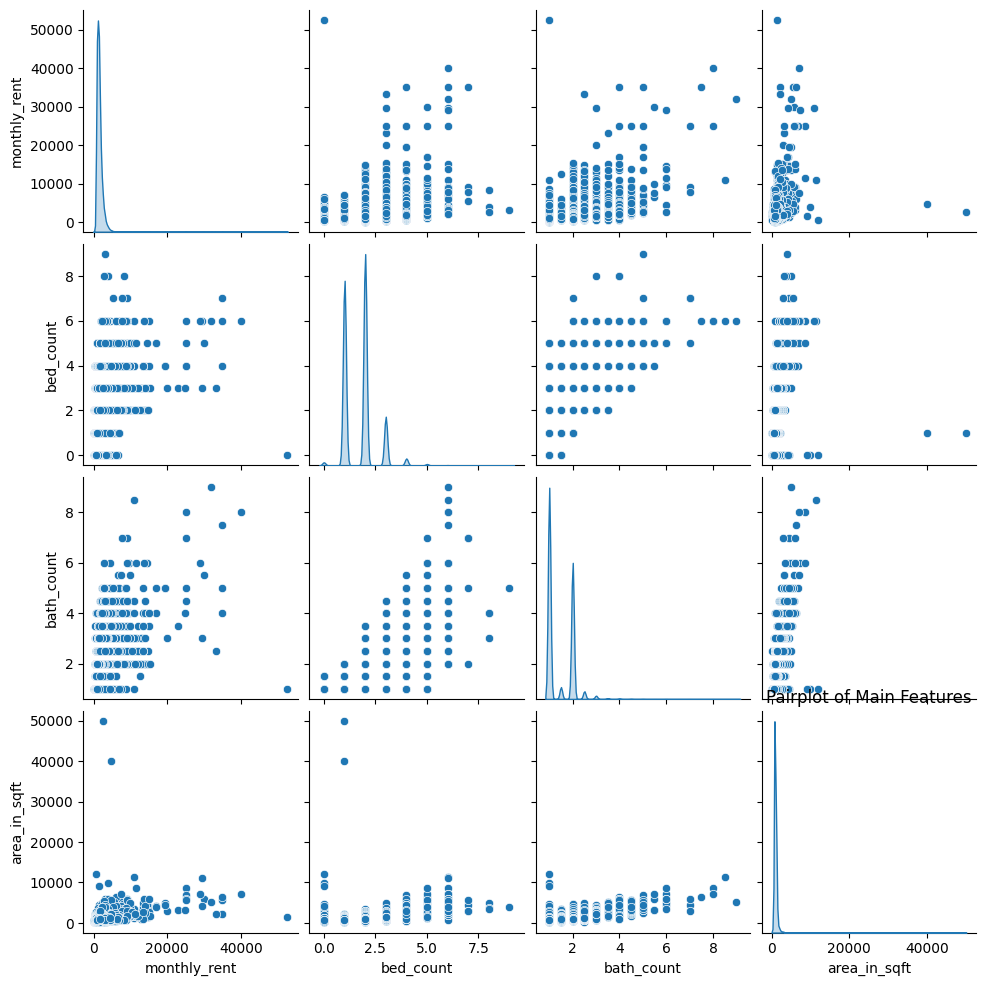

In [12]:
main_f=['monthly_rent','bed_count','bath_count','area_in_sqft']
main_f=[c for c in main_f if c in df.columns]
if len(main_f) > 1:
    sns.pairplot(df[main_f],diag_kind='kde')
    plt.title('Pairplot of Main Features')
    plt.show()

`6. Outlier Detection `

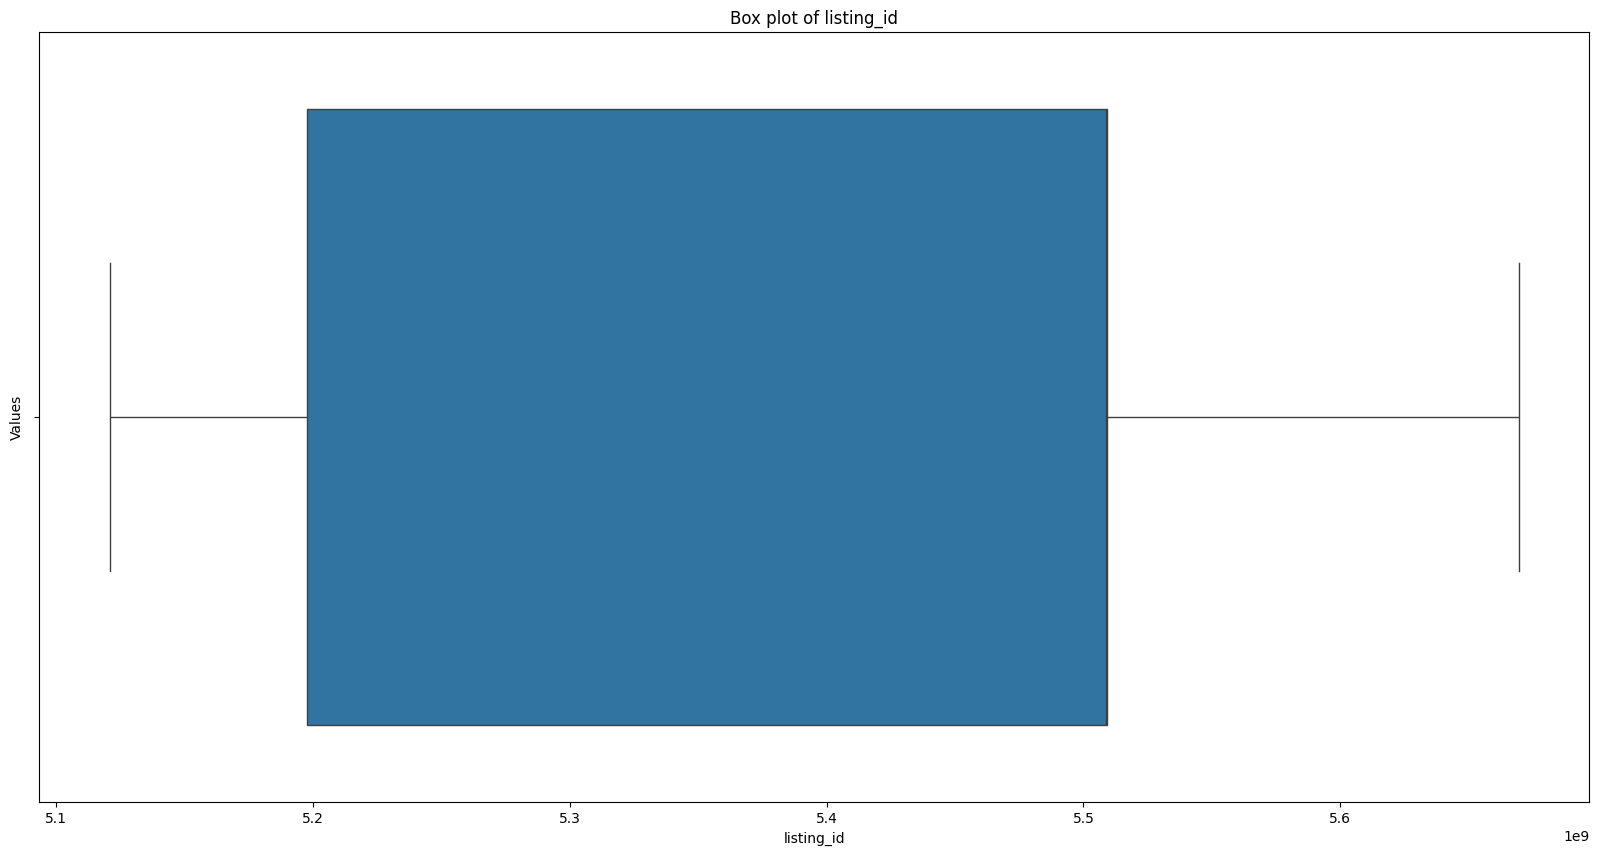

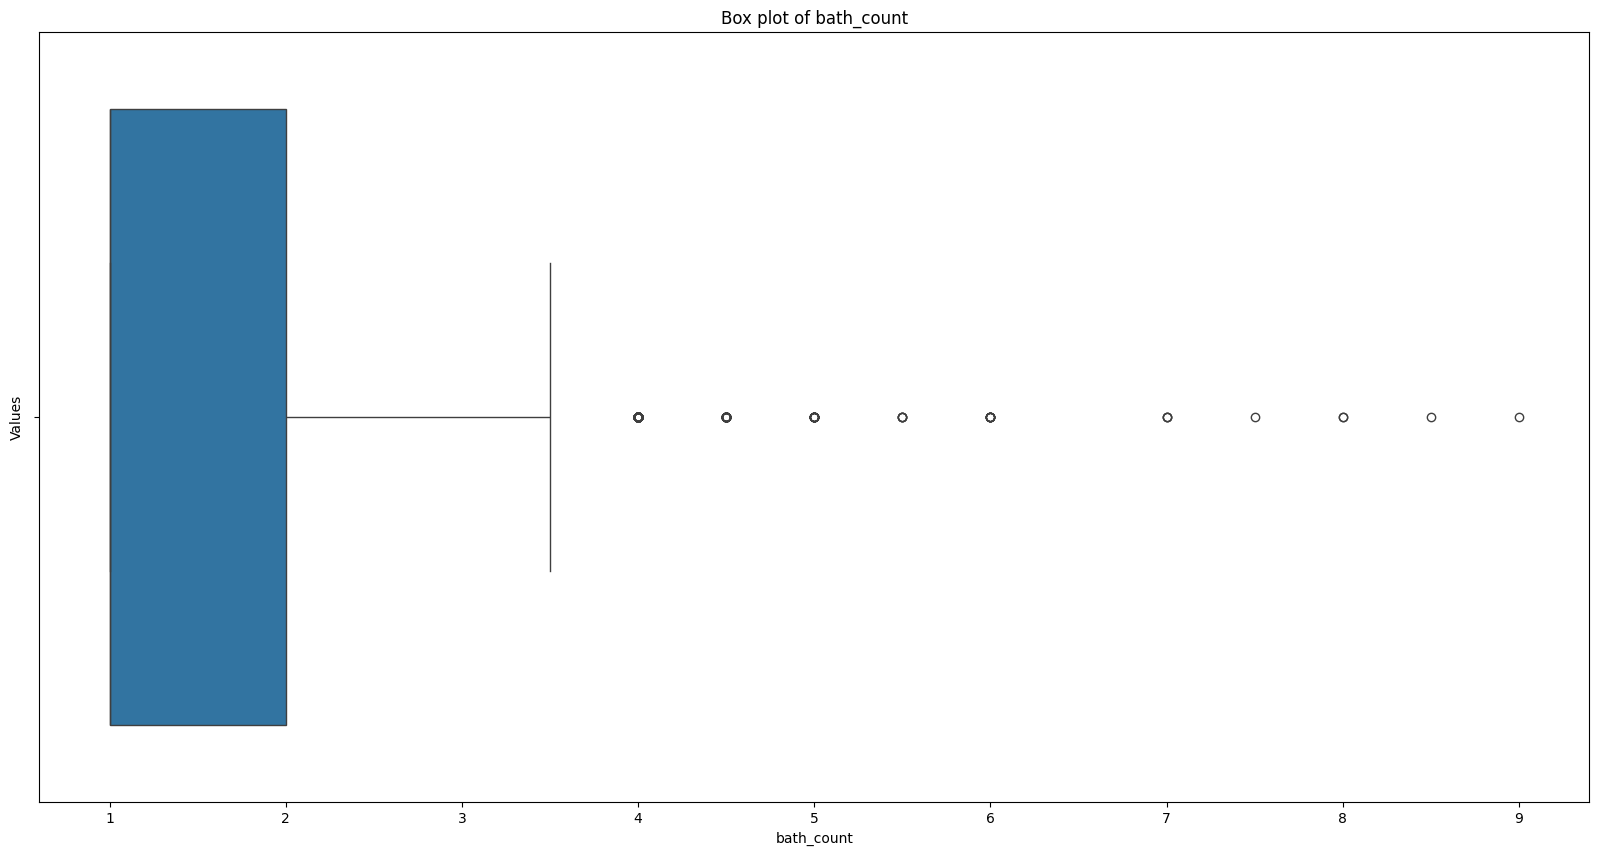

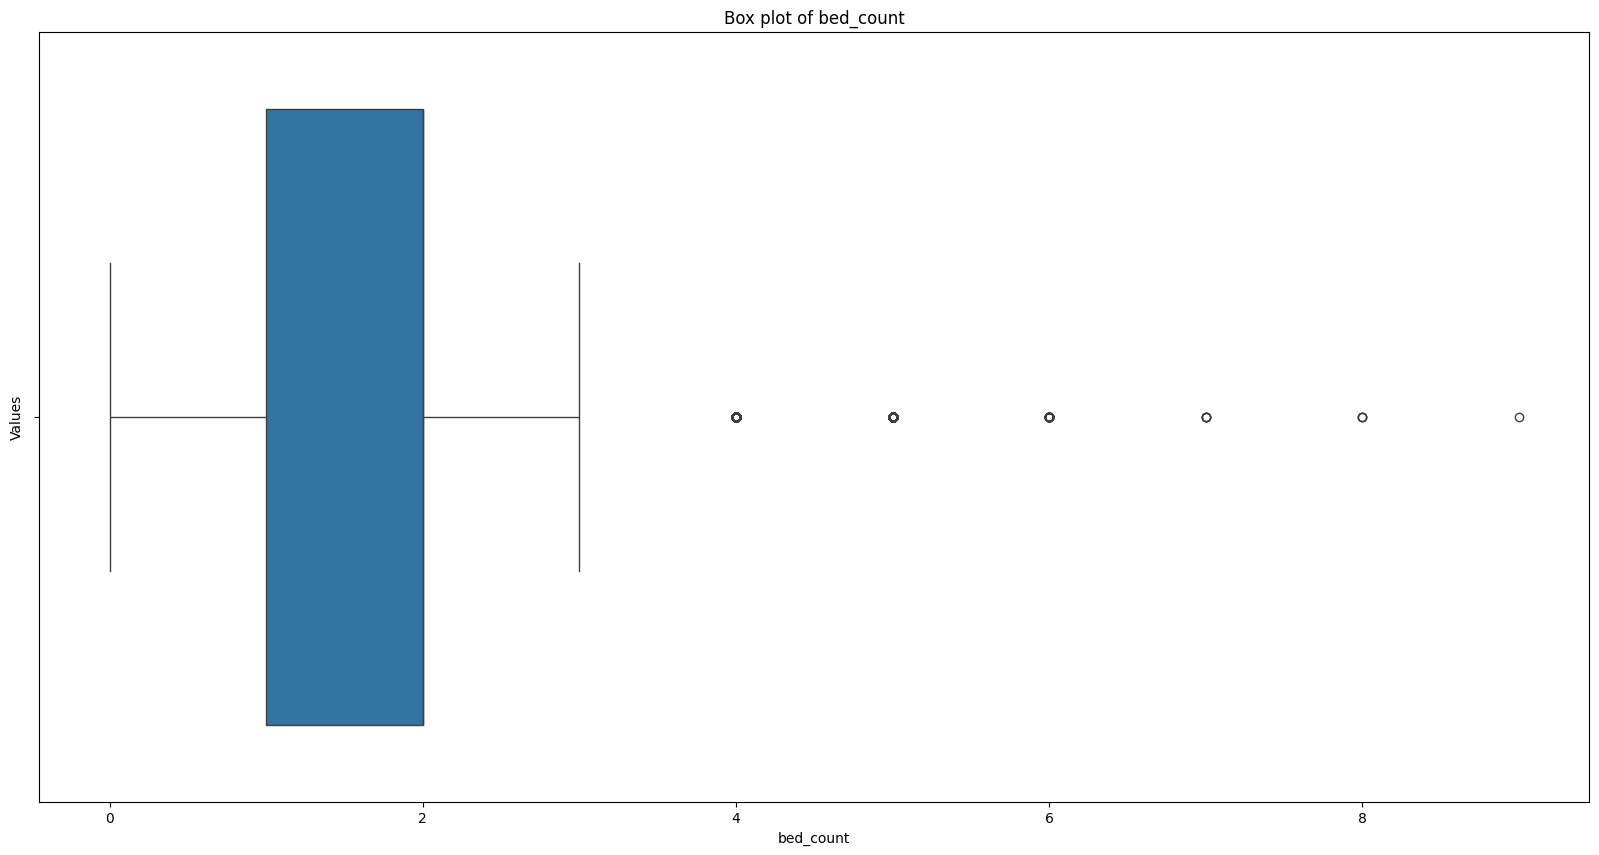

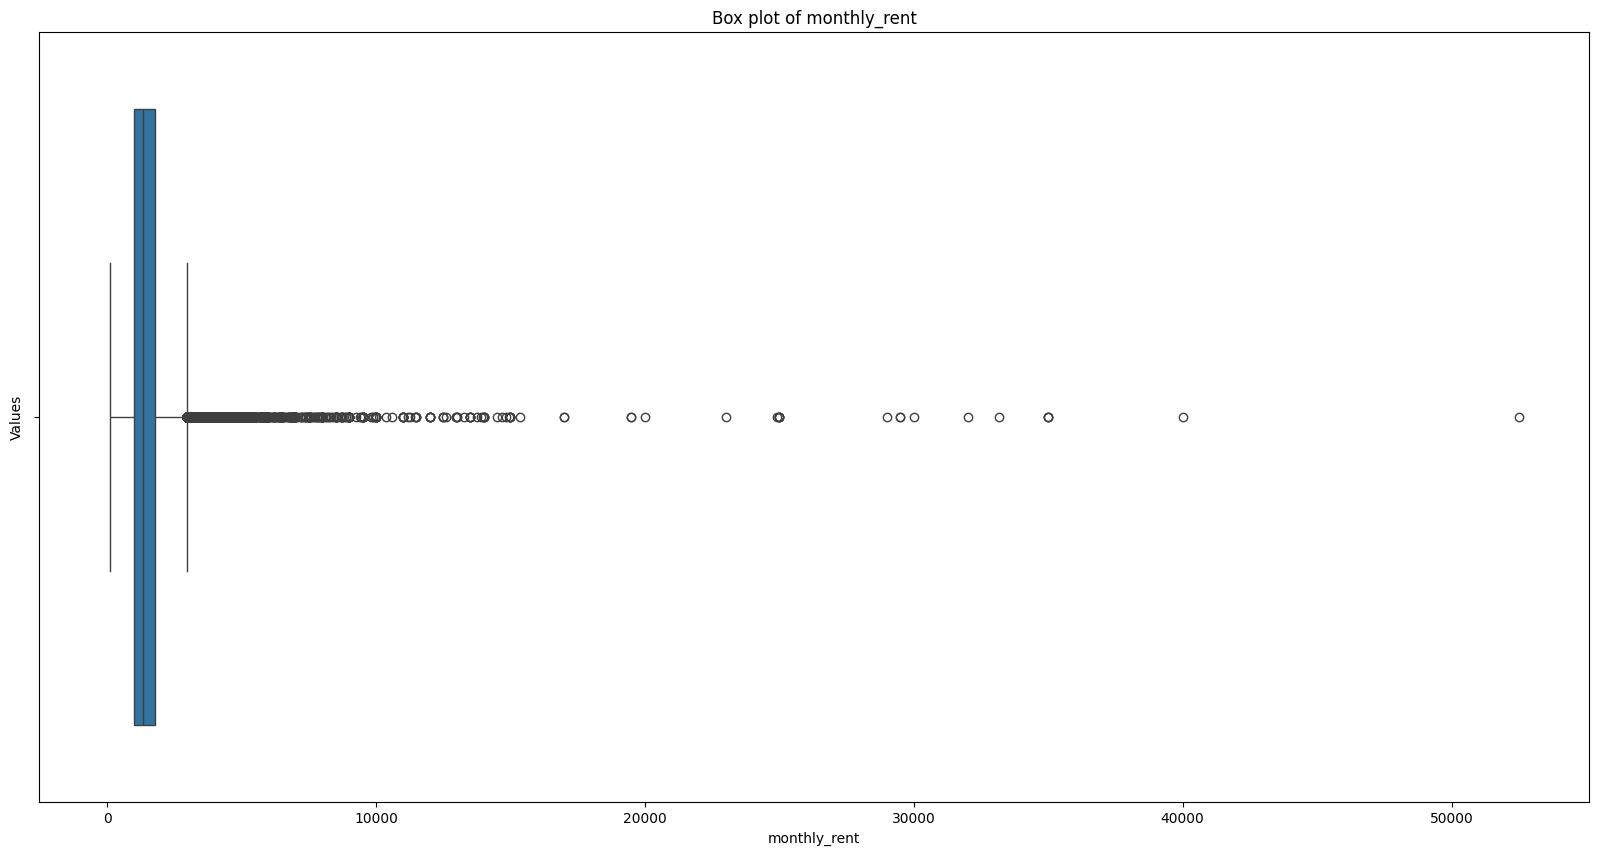

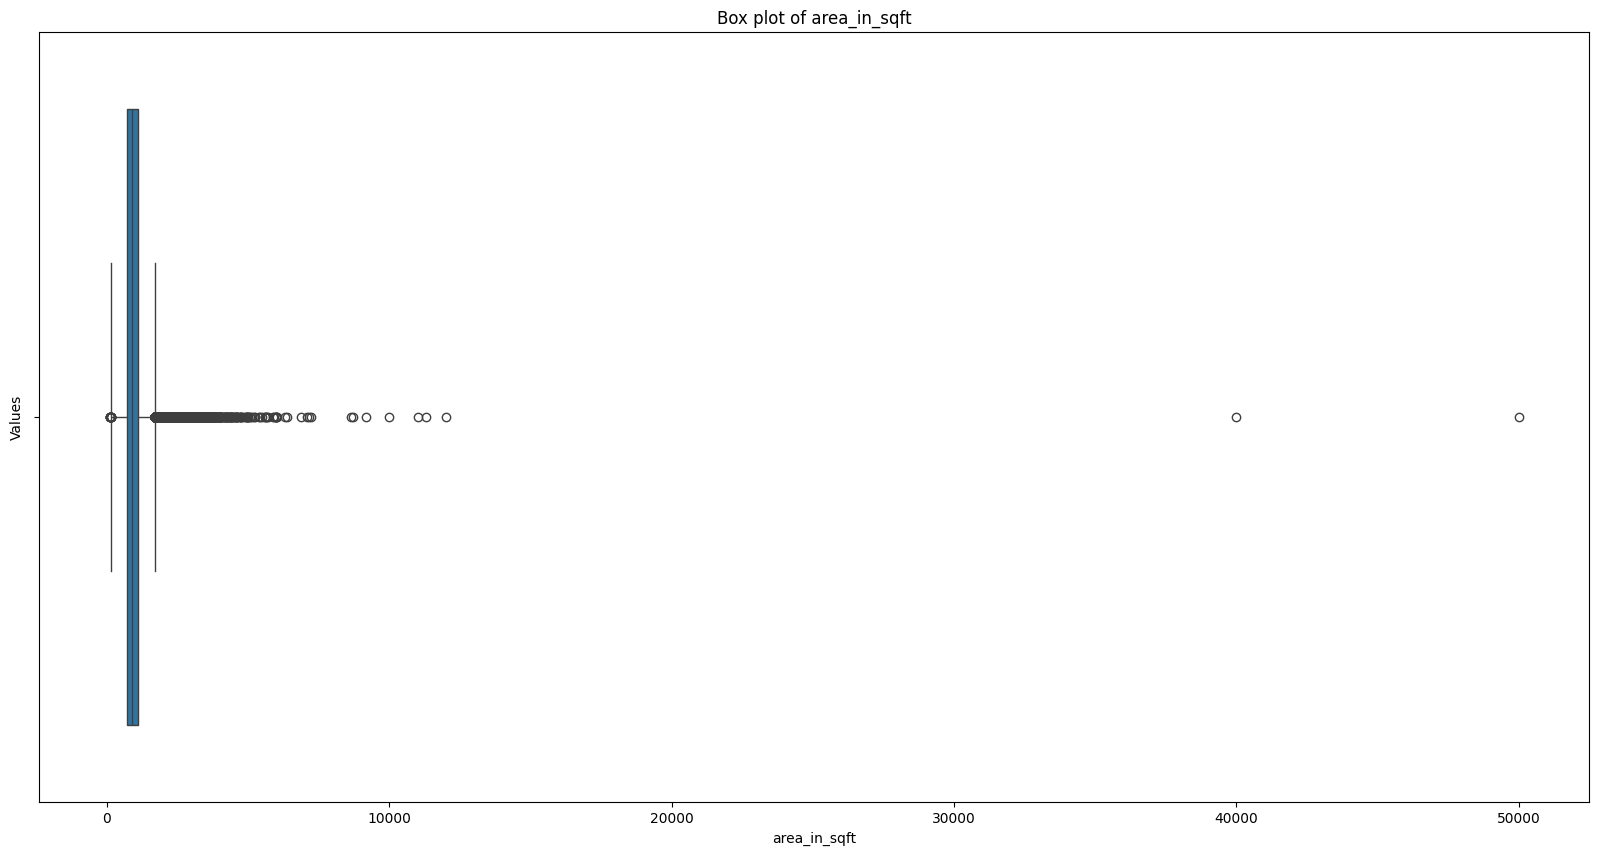

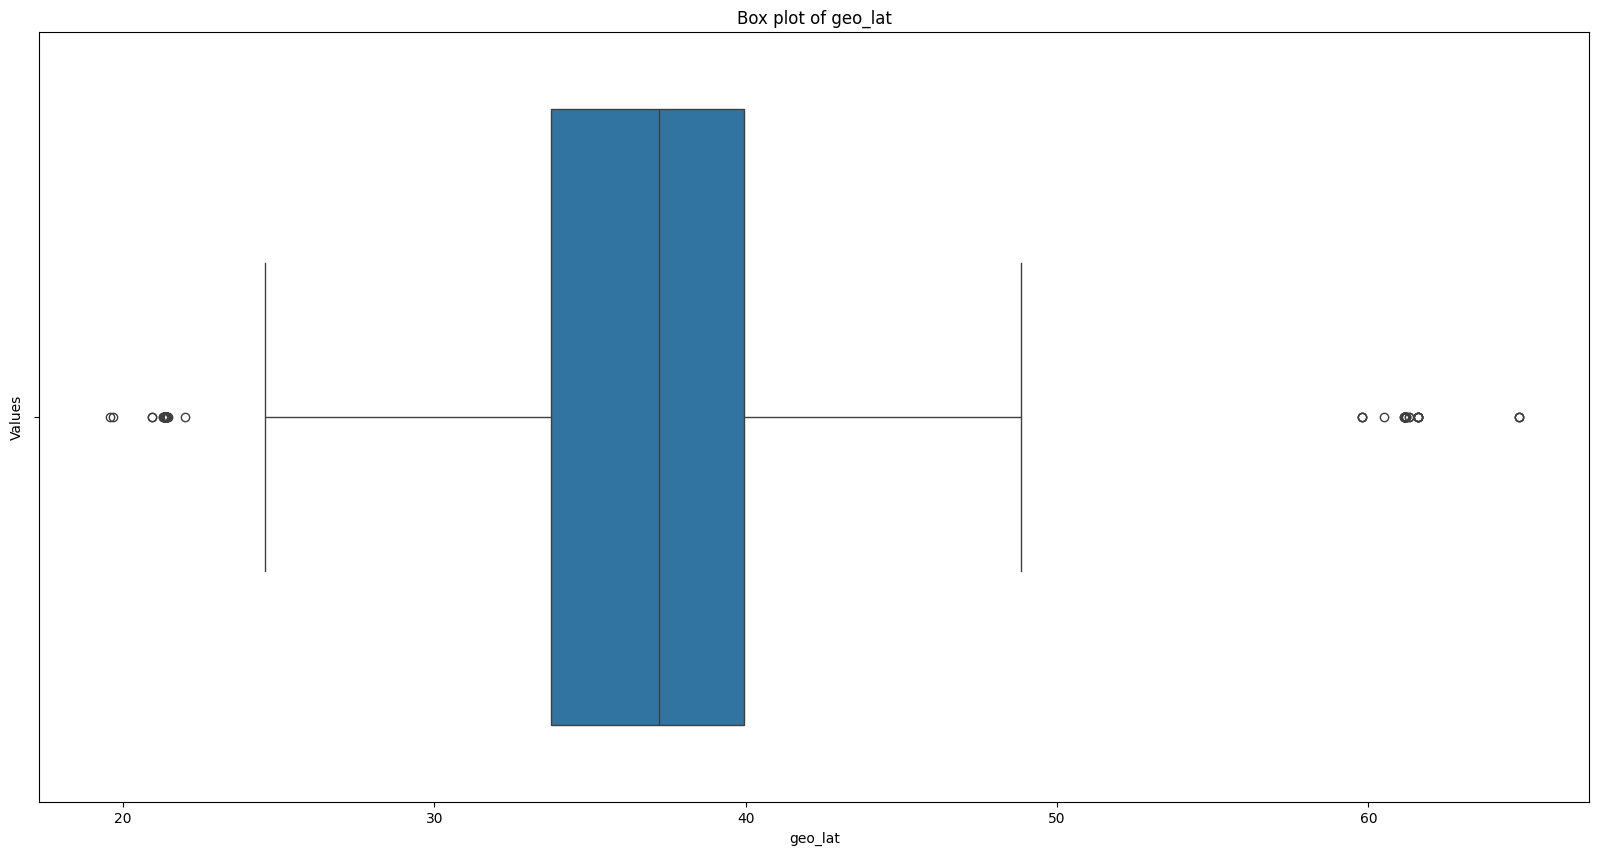

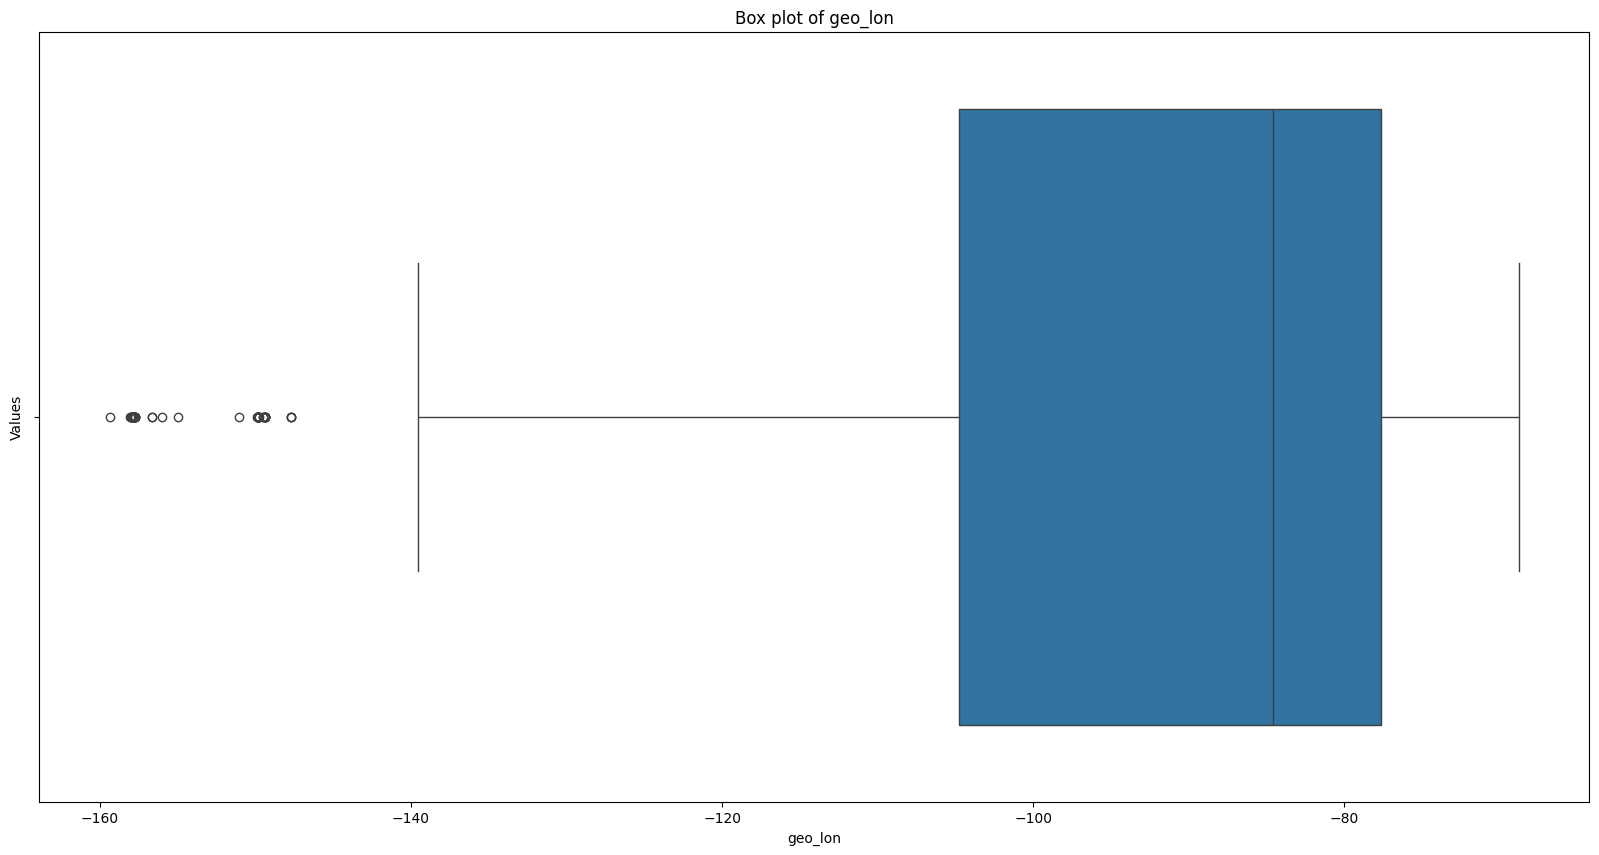

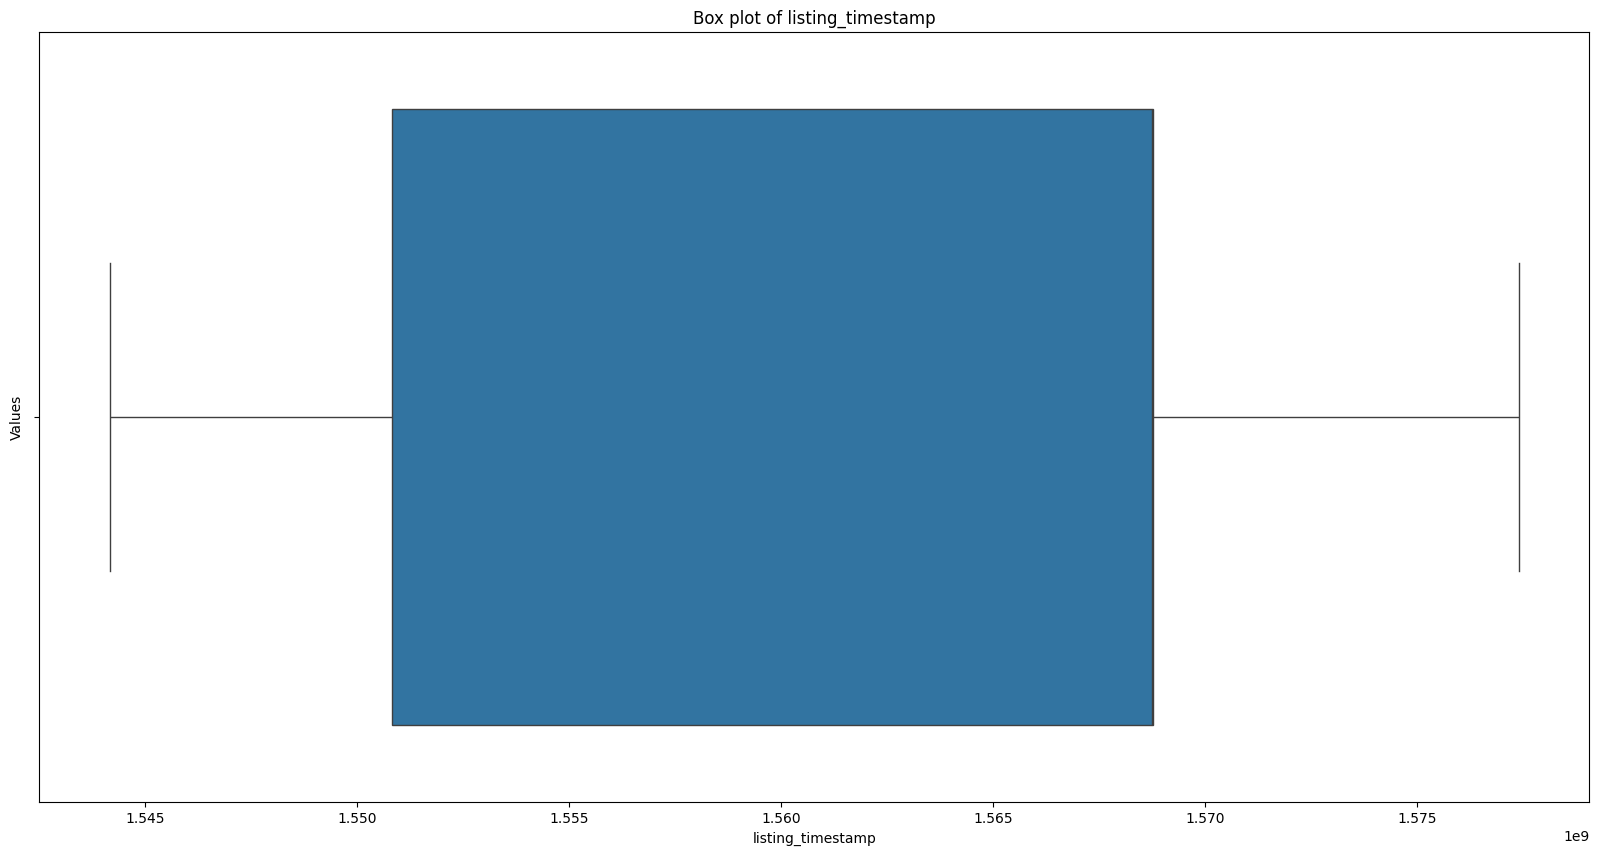

In [13]:
for c in num_col:
    plt.figure(figsize=(20,10))
    sns.boxplot(x = df[c])
    plt.title(f'Box plot of {c}')
    plt.xlabel(c)
    plt.ylabel('Values')
    plt.show()

The End of Exploring in Detailly about the Data present in Given Dataset

# Data Preprocessing Phase begins 

###  Handling the  Missing Values
    -Firstly we will be checking missing values in each column
    
    -Next we Will be Dropping  the Rows with missing essential values.
    
    -Now we will be Imputing Missing Numeric Values with median and categorical values with mode

    -Now we will re check th Missing values Counts after imputation



In [14]:
#check the missing values in each column
missing_count = df.isnull().sum()
print("\nMissing values inn  each column :\n",missing_count)



Missing values inn  each column :
 listing_id                    0
listing_category              0
headline                      0
included_features         16044
bath_count                   63
bed_count                   124
payment_currency              0
service_fee_applicable        0
image_available               0
pet_policy                60424
monthly_rent                  1
formatted_rent_text           1
payment_schedule              0
area_in_sqft                  0
street_address            91549
city                        302
region_code                 302
geo_lat                      25
geo_lon                      25
data_provider                 0
listing_timestamp             0
dtype: int64


In [15]:
#drop the rows where essential features are missing then impute the remaining missing values
#before performing operation , once verify the column names: 
print("\nColumns in the dataset : ",df.columns.tolist())

df = df.dropna(subset=['monthly_rent','area_in_sqft','bed_count','bath_count'])


Columns in the dataset :  ['listing_id', 'listing_category', 'headline', 'included_features', 'bath_count', 'bed_count', 'payment_currency', 'service_fee_applicable', 'image_available', 'pet_policy', 'monthly_rent', 'formatted_rent_text', 'payment_schedule', 'area_in_sqft', 'street_address', 'city', 'region_code', 'geo_lat', 'geo_lon', 'data_provider', 'listing_timestamp']


In [16]:
#Impute The Remaining Missing Numerical Values with Medain
for c in num_col:
    if df[c].isnull().any():
        df[c].fillna(df[c].median(),inplace=True)

#Imputing the Missing Categorical values with mode
for c in cat_col:
    if df[c].isnull().any():
        df[c].fillna(df[c].mode()[0],inplace=True)

C:\Users\amare\AppData\Local\Temp\ipykernel_7536\1612445135.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(),inplace=True)
C:\Users\amare\AppData\Local\Temp\ipykernel_7536\1612445135.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [17]:
#Printing the values after imputation
print("\nMissing values after imputation : \n",df.isnull().sum())
cat_col =df.select_dtypes(include=['object']).columns
for c in cat_col:
    df[c].fillna(df[c].mode()[0],inplace=True)


Missing values after imputation : 
 listing_id                0
listing_category          0
headline                  0
included_features         0
bath_count                0
bed_count                 0
payment_currency          0
service_fee_applicable    0
image_available           0
pet_policy                0
monthly_rent              0
formatted_rent_text       0
payment_schedule          0
area_in_sqft              0
street_address            0
city                      0
region_code               0
geo_lat                   0
geo_lon                   0
data_provider             0
listing_timestamp         0
dtype: int64


C:\Users\amare\AppData\Local\Temp\ipykernel_7536\2440905330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0],inplace=True)


### Categorical  Feature Engineering 

    -> In this we will  be Identifying Categorical Columns.

    -> Drop the unused Text columns.

    ->Groups rare Categories as 'Other'.

    ->Performing One - Hot Encoding Categorical Columns

    ->Processing Multi - label Features (like included_features).

    ->Verifying  that no object - type columns remain

In [18]:
#1.Identifying the object - type columns
df_col=df.columns.tolist()
cat_col=df.select_dtypes(include=['object']).columns.tolist()
print("The Categroical Columns Present in the Dataset Before Processing :\n",cat_col)

The Categroical Columns Present in the Dataset Before Processing :
 ['listing_category', 'headline', 'included_features', 'payment_currency', 'service_fee_applicable', 'image_available', 'pet_policy', 'formatted_rent_text', 'payment_schedule', 'street_address', 'city', 'region_code', 'data_provider']


In [19]:
df.columns

Index(['listing_id', 'listing_category', 'headline', 'included_features',
       'bath_count', 'bed_count', 'payment_currency', 'service_fee_applicable',
       'image_available', 'pet_policy', 'monthly_rent', 'formatted_rent_text',
       'payment_schedule', 'area_in_sqft', 'street_address', 'city',
       'region_code', 'geo_lat', 'geo_lon', 'data_provider',
       'listing_timestamp'],
      dtype='object')

In [20]:
#2.Drop the Free_text Columns which are not useful for the model
text_col=['headline','street_address','formatted_rent_text']
df.drop(columns=[c for c in text_col if c in df_col],inplace = True)


In [21]:
#3. Handling the Simple Nominal Categorical Columns by grouping rare categories (<5 %) into 'Other'
to_gp=['listing_category','payment_currency', 'payment_schedule','data_provider','pet_policy','city','region_code']
for c in to_gp:
    if c in df.columns:
        freq = df[c].value_counts(normalize=True)
        common=freq[freq >= 0.05].index
        df.loc[:,c] = df[c].where(df[c].isin(common),'Other')
        


In [22]:
#4. Perfroming the One Hot Encoding for the nominal columns
ec = ['listing_category','payment_currency','service_fee_applicable','image_available','payment_schedule', 'data_provider','pet_policy','city','region_code']
df=pd.get_dummies(df,columns=[c for c in ec if c in df.columns],drop_first=True)



In [23]:
#5. Multi - label Features Encoding : limit to top 20 'included_features'
if 'included_features' in df.columns:
    df['included_features_list'] = df['included_features'].str.split(',').apply(lambda x : [s.strip() for s in x] if isinstance(x,list) else [])
    top_feat=df['included_features_list'].explode().value_counts().head(20).index
    for f in top_feat:
        df[f'feat_{f}'] =df['included_features_list'].apply(lambda x : int(f in x))
    df.drop(columns=['included_features','included_features_list'],inplace=True)
    

In [24]:
#6. Verifying that no object Columns remaining 
rem = df.select_dtypes(include=['object']).columns.tolist()

print("\nThe Remaining Object COlumns in the Dataset : ",rem)


The Remaining Object COlumns in the Dataset :  []


## Feature Scaling 

Now we will be identifying numeric columns and we will be excluding the target.

In This phase we will be Standardize features such as mean = 0 , std = 1 and also we will apply MinMax scaling their values ranging from 0 and 1 .

In [25]:
#First we will Identify the numerical columns without including the target column 'monthly_rent'

f=df.drop('monthly_rent',axis = 1)
num_col=f.select_dtypes(include='number').columns

In [26]:
#Now we will be Standardize the featuers such as mean , std using StandardScaler
sc=StandardScaler()
df[num_col] =sc.fit_transform(df[num_col])

#Now we could use MinMaxScaler to scale between 0 and 1:
mms=MinMaxScaler()
df[num_col]=mms.fit_transform(df[num_col])

## Outlier Removal

Now we will be Detecting the outliers in monthly_rent using IQR method.

Now we Need to Remove to rows with Outlier Rented values.


In [27]:
#We will be using IQR method for a Outliers Treatment such as for a numeric feauture , lets say 'Rent'
q1=df['monthly_rent'].quantile(0.25)
q3=df['monthly_rent'].quantile(0.75)
iqr=q3-q1
lb=q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr

#Now we need to Identify thee Outliers in the 'Rent'
out=df[(df['monthly_rent'] < lb) | (df['monthly_rent'] > ub)]
print(f"\nThe No of Outliers Detected in the 'monthly_rent' are : {len(out)}")

#Now we will have to treat the outliers 
#we can do it either by removing the outliers or by replacing the outliers with the median values. here for simplicity purpose we have removed them .
df=df[(df['monthly_rent'] >= lb) & (df['monthly_rent'] <= ub)]


The No of Outliers Detected in the 'monthly_rent' are : 4692


## Feature Selection and Extraction

In this section we will be Removing  the features which they are having very low Variance.

Now we Apply the PCA (Principal Component Analysis) to reduce diemensionality and prints the explained variance.

In [28]:
#Now in below line u can see that we are reomving the very low variance features
sel=VarianceThreshold(threshold = 0.01)
df_red=sel.fit_transform(df.drop('monthly_rent',axis=1))
sc=df.drop('monthly_rent',axis=1).columns[sel.get_support()]

print(f"\n The Selected Features After Removing the Low Variance Features are : {sc.tolist()}")

#Now we are doing  the Feature Extraction using PCA to reduce the diemensionality
pca=PCA(n_components=0.5)
pc=pca.fit_transform(df.drop('monthly_rent',axis = 1))
print(f"Explained Variance Ratio by 5 PCA are : {np.sum(pca.explained_variance_ratio_) : .2f}")



 The Selected Features After Removing the Low Variance Features are : ['listing_id', 'geo_lat', 'geo_lon', 'listing_timestamp', 'image_available_Thumbnail', 'image_available_Yes', 'data_provider_RentDigs.com', 'data_provider_RentLingo', 'pet_policy_Other', 'region_code_CO', 'region_code_FL', 'region_code_MA', 'region_code_MD', 'region_code_NC', 'region_code_Other', 'region_code_TX', 'region_code_VA', 'feat_Parking', 'feat_Pool', 'feat_Gym', 'feat_Patio/Deck', 'feat_Washer Dryer', 'feat_Storage', 'feat_Clubhouse', 'feat_Dishwasher', 'feat_AC', 'feat_Fireplace', 'feat_Refrigerator', 'feat_Cable or Satellite', 'feat_Playground', 'feat_Internet Access', 'feat_Wood Floors', 'feat_Gated', 'feat_Tennis', 'feat_TV', 'feat_Elevator', 'feat_Basketball']
Explained Variance Ratio by 5 PCA are :  0.51


## Creating Classification Target 

In [29]:
med_rent=df['monthly_rent'].median()
[df]=[df]
df.loc[:,'HighRent']=(df['monthly_rent']>med_rent).astype(int)
print(df['HighRent'].value_counts())

HighRent
0    47312
1    47301
Name: count, dtype: int64


## Log Transformation

Makes a fresh copy of the DataFrame.

Applies a log transformation to monthly_rent to reduce skewness.

Prints skewness before and after transformation.

In [30]:
# Ensure df is a fresh copy to avoid SettingWithCopyWarning on chained assignments
df = df.copy()

# Example: Log-transform the 'monthly_rent' target for regression if it is skewed
# Use .loc for safe assignment
df.loc[:, 'log_monthly_rent'] = np.log1p(df['monthly_rent'])  # log(1 + monthly_rent)

# Alternatively, apply Box-Cox (for positive data only)
# from scipy.stats import boxcox
# df['monthly_rent_boxcox'], fitted_lambda = boxcox(df['monthly_rent'] + 1)

# Check skew after transformation (for illustration)
print("Skewness before log:", df['monthly_rent'].skew().round(2))
print("Skewness after log:", df['log_monthly_rent'].skew().round(2))


Skewness before log: 0.71
Skewness after log: -0.15


In [31]:
df.columns

Index(['listing_id', 'bath_count', 'bed_count', 'monthly_rent', 'area_in_sqft',
       'geo_lat', 'geo_lon', 'listing_timestamp',
       'listing_category_housing/rent/apartment', 'service_fee_applicable_Yes',
       'image_available_Thumbnail', 'image_available_Yes',
       'payment_schedule_Other', 'data_provider_RentDigs.com',
       'data_provider_RentLingo', 'pet_policy_Other', 'region_code_CO',
       'region_code_FL', 'region_code_MA', 'region_code_MD', 'region_code_NC',
       'region_code_Other', 'region_code_TX', 'region_code_VA', 'feat_Parking',
       'feat_Pool', 'feat_Gym', 'feat_Patio/Deck', 'feat_Washer Dryer',
       'feat_Storage', 'feat_Clubhouse', 'feat_Dishwasher', 'feat_AC',
       'feat_Fireplace', 'feat_Refrigerator', 'feat_Cable or Satellite',
       'feat_Playground', 'feat_Internet Access', 'feat_Wood Floors',
       'feat_Gated', 'feat_Tennis', 'feat_TV', 'feat_Elevator',
       'feat_Basketball', 'HighRent', 'log_monthly_rent'],
      dtype='object')

## Train - Test Split

Now we will be going to split the data into training and testing sets for both classification (HighRent) and regression (monthly_rent).


In [38]:
#Now we are going to split the data into train and test sets
#now we will splitting the dataeset for classification the target is HighRent

X=df.drop(['monthly_rent', 'log_monthly_rent','HighRent'],axis=1)
y=df['HighRent']
X_train_clf,X_test_clf,y_train_clf,y_test_clf=train_test_split( X,y,test_size=0.3,random_state=42,stratify=y)
#now for regression we will be splitting the data into train and test sets
X=df.drop(['monthly_rent', 'log_monthly_rent','HighRent'],axis=1)
y=df['monthly_rent']
X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X,y,test_size=0.3,random_state=42)


## Logistic Regression Classifier
Now in this we will be Train a logistic regression model to classify HighRent.
Next we will be predicting the test set and printing the accuracy , precision , recall, and F1-Score.

In [39]:
#Now we are going to train the logistic regression model for classification
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_clf,y_train_clf)
#Now we have to make predictions on the test set
y_pred_clf=logreg.predict(X_test_clf)
#Now we will be evaluating the model using classification performance metrics such as accuracy etc
acc=accuracy_score(y_test_clf,y_pred_clf)
prec=precision_score(y_test_clf,y_pred_clf)
rec=recall_score(y_test_clf,y_pred_clf)
f1=f1_score(y_test_clf,y_pred_clf)
#print("The logistic regression classification performance metrics are : ")
print("\nLogistic Regression Metrics:\n")
print(f"Accuracy : {acc:.3f}, Precision : {prec:.3f}, Recall : {rec:.3f}, F1 - Score : {f1:.3f}")



Logistic Regression Metrics:

Accuracy : 0.756, Precision : 0.770, Recall : 0.729, F1 - Score : 0.749


`Confusion Matrix`
Now we will be prrinting the confusion matrix for the logistic regression classifier.

In [40]:
#The Confusion Matrix for the Logistic Regression Model
cm=confusion_matrix(y_test_clf,y_pred_clf)
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[11106  3088]
 [ 3851 10339]]


# Random Forest Classifier
Now we are training a random forest classifier for HighTent feature.

In the below cell we will Predict and print the classification metrics.

In [41]:
#Training the Random Forest Classifier Model
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train_clf,y_train_clf)
#Now we are going to make predictions on the test set
y_pred_rf=rf_clf.predict(X_test_clf)
acc_rf=accuracy_score(y_test_clf,y_pred_rf)
prec_rf=precision_score(y_test_clf,y_pred_rf)
rec_rf=recall_score(y_test_clf,y_pred_rf)
f1_rf=f1_score(y_test_clf,y_pred_rf)
print("\nRandom Forest (Classifier) Metrics:\n")
print(f"Accuracy : {acc_rf:.3f}, Precision : {prec_rf:.3f}, Recall : {rec_rf:.3f}, F1_Score : {f1_rf:.3f}")




Random Forest (Classifier) Metrics:

Accuracy : 0.909, Precision : 0.912, Recall : 0.905, F1_Score : 0.909


# XGBoost Classifier
Now we will be Train the XGBoost Classifier for HighRent.

In [42]:
xgb_clf=xgb.XGBClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
xgb_clf.fit(X_train_clf,y_train_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

# Linear Regression 

Now we are going to train the linear regression model to predict monthly_rent.

After we will be Predicting  and print the RMSE (Root Mean Squared Error).

In [43]:
#Training the linear regression model
linreg=LinearRegression()
linreg.fit(X_train_reg,y_train_reg)
#Now we will be going to make predictions on test set and evaluate them
y_pred_reg=linreg.predict(X_test_reg)
rmse_lin=mean_squared_error(y_test_reg,y_pred_reg,squared=False)
print("\nLinear Regression RMSE : ",rmse_lin)


Linear Regression RMSE :  393.77927892591737


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Random Forest Regressor 
Now we are going to train the Random Forest Regressor for monthly_rent.
Now we are Predicting  and prints the RMSE.

In [44]:
# Training the Random Forest Regressor Model
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train_reg,y_train_reg)
#Now we will be Predicting the Test Set and evaluate the model 
y_pred_rf_reg=rf_reg.predict(X_test_reg)
rmse_rf=mean_squared_error(y_test_reg,y_pred_rf_reg,squared=False)
print(f"Random Forest (Regressor) RMSE: {rmse_rf:.3f}")

Random Forest (Regressor) RMSE: 200.763


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# XGBoost Regressor
Trains an XGBoost regressor for monthly_rent.

Predicts and prints the RMSE...

In [45]:

# Train XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_reg, y_train_reg)

# Predict and evaluate
y_pred_xgb_reg = xgb_reg.predict(X_test_reg)
rmse_xgb = mean_squared_error(y_test_reg, y_pred_xgb_reg, squared=False)

print("XGBoost (Regressor) RMSE:", rmse_xgb)

XGBoost (Regressor) RMSE: 255.66937366845931


C:\Users\amare\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Regression Model Evaluation
Evaluates all regression models (linear, random forest, XGBoost) using RMSE and MAE (Mean Absolute Error).

In [46]:

# Regression evaluation
models_reg = {'LinearRegression': linreg, 'Random Forest': rf_reg, 'XGBoost': xgb_reg}
for name, model in models_reg.items():
    preds = model.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    mae = mean_absolute_error(y_test_reg, preds)
    r2=r2_score(y_test_reg,preds)
    print(f"{name} Regressor -> RMSE: {rmse:.2f}, MAE: {mae:.2f} R^2 : {r2:.2f}")

LinearRegression Regressor -> RMSE: 393.78, MAE: 301.32 R^2 : 0.44
Random Forest Regressor -> RMSE: 200.76, MAE: 130.11 R^2 : 0.85
XGBoost Regressor -> RMSE: 255.67, MAE: 188.03 R^2 : 0.76


# Classification Model Evaluation
Evaluates all classification models (logistic regression, random forest, XGBoost) using accuracy, precision, recall, F1-score, confusion matrix, and prints a classification report.

In [47]:

# Define class labels for the classification report
rent_labels = ['LowRent', 'HighRent']

# Classification evaluation
models_clf = {'Logistic Regression': logreg, 'Random Forest': rf_clf, 'XGBoost': xgb_clf}
for name, model in models_clf.items():
    preds = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, preds)
    prec = precision_score(y_test_clf, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test_clf, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test_clf, preds, average='weighted', zero_division=0)
    print(f"{name} Classifier -> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
    # Confusion matrix
    cm = confusion_matrix(y_test_clf, preds)
    print(f"Confusion Matrix for {name}:\n{cm}")
    # Optional: classification report
    print(classification_report(y_test_clf, preds, target_names=rent_labels))
# ...existing code...

Logistic Regression Classifier -> Accuracy: 0.756, Precision: 0.756, Recall: 0.756, F1: 0.755
Confusion Matrix for Logistic Regression:
[[11106  3088]
 [ 3851 10339]]
              precision    recall  f1-score   support

     LowRent       0.74      0.78      0.76     14194
    HighRent       0.77      0.73      0.75     14190

    accuracy                           0.76     28384
   macro avg       0.76      0.76      0.76     28384
weighted avg       0.76      0.76      0.76     28384

Random Forest Classifier -> Accuracy: 0.909, Precision: 0.909, Recall: 0.909, F1: 0.909
Confusion Matrix for Random Forest:
[[12960  1234]
 [ 1343 12847]]
              precision    recall  f1-score   support

     LowRent       0.91      0.91      0.91     14194
    HighRent       0.91      0.91      0.91     14190

    accuracy                           0.91     28384
   macro avg       0.91      0.91      0.91     28384
weighted avg       0.91      0.91      0.91     28384

XGBoost Classifier -> Ac

# Save Processed Data
Saves the cleaned and processed DataFrame (including predictions) to a CSV file.

In [48]:
# Save the cleaned and preprocessed dataset (including any prediction columns) to res.csv
df.to_csv('res2.csv', index=False)
print("Saved the final dataset to res.csv")

Saved the final dataset to res.csv


# Check Working Directory
Prints the current working directory and lists all files in it.


In [49]:
import os
print(os.getcwd())
print(os.listdir())

D:\
['$RECYCLE.BIN', '..-. . . .-.. .. -. --', '.ipynb_checkpoints', '.pnpm-store', '22jan last date]APCOB-Application-form.pdf', '4caac92d18604f729eb95a0f867b12f8.mp4', '8thAcharya Nagarjuna University.pdf', 'aadhar.pdf', 'allineed.jpg', 'Amareswar', 'anaconda_projects', 'asss', 'cheque.pdf', 'Cisco Packet Tracer 8.2.2', 'cleaned_healthcare_data.csv', 'complete web development resource.pdf', 'Config.Msi', 'CSE-3-1-R20 OLD PAPERS UPTO MAY2024.pdf', 'EAadhaarGRANDMA RAMADEVI.pdf', 'EAadhaarRAMADEVI.pdf', 'EAadhaar_swapna.pdf', 'excelr', 'gate', 'girgit Setup 1.0.0.exe', 'gradious intern', 'House_Rental_Classified.csv', 'internal', 'interv', 'logs.log', 'Machine Learning', 'memories', 'mernai', 'movies', 'npm-global', 'nw c', 'p1', 'pdfs', 'project', 'Project_HouseRental.ipynb', 'res.csv', 'res2.csv', 'signofamar.jpg', 'supply', 'System Volume Information', 'udemy', 'undertaking.pdf', 'USB Drive (F) - Shortcut.lnk', 'video recordings']
